In [1]:
## Final Project Data Science and Machine Learning Purwadhika
## Author : Aldo Wista Fadhilah
## Date : 8/11/2020

# Big Mart Sales Prediction

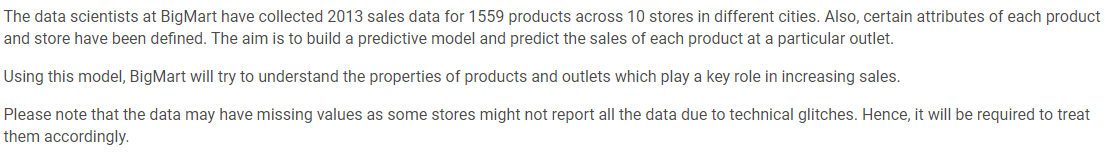

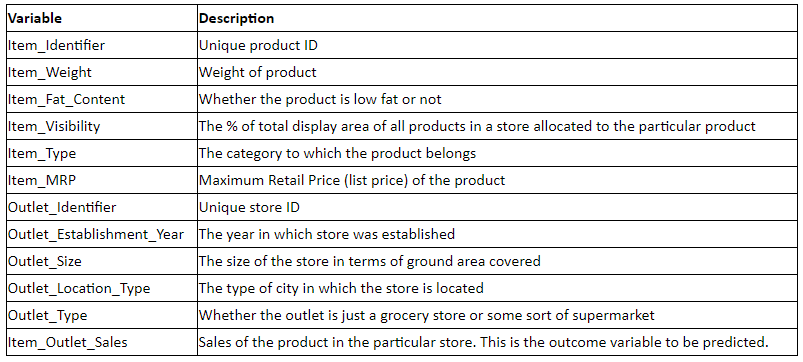

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('train_bigmart.csv')
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Apabila dilihat sekilas dari data describe(), saya berhipotesis data *Item_Weight, Item_Visibility, Item_MRP, dan Outlet_Establishment_Year* tampak terdistribusi dengan normal, hal tersebut terlihat dari nilai mean dan median yang memiliki nilai yang mendekati. Namun hipotesis harus dibuktikan pada uji anderson ataupun uji grafik (QQPlot). Untuk data   Item_Outlet_Sales saya berhipotesis bahwa data tidak terdistribusi dengan normal, namun hal ini pun harus diuji dengan uji anderson maupun uji grafik.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Dapat dilihat, terdapat 2 buah feature yang memiliki missing values, yaitu feature/columns *Item_Weight* dan *Outlet_Size*.

In [8]:
kolom = df.columns
dataFeatures = []
dataType = []
null = []
nullPct = []
unique = []
uniqueSample = []
for item in kolom:
    dataFeatures.append(item)
    dataType.append(df[item].dtype)
    null.append(df[item].isna().sum())
    if  round(df[item].isna().sum()/len(df),2) == 0:
        nullPct.append('0.00')
    else:
        nullPct.append(round(df[item].isna().sum()/len(df),2))
    unique.append(len(df[item].dropna().unique()))
    uniqueSample.append(list(df[item].sample(2)))
    
pd.DataFrame([dataFeatures,dataType,null,nullPct,unique,uniqueSample],index=['dataFeatures','dataType','null','nullPct','unique','uniqueSample']).T

dataFeatures dataType  null nullPct unique  \
0             Item_Identifier   object     0    0.00   1559   
1                 Item_Weight  float64  1463    0.17    415   
2            Item_Fat_Content   object     0    0.00      5   
3             Item_Visibility  float64     0    0.00   7880   
4                   Item_Type   object     0    0.00     16   
5                    Item_MRP  float64     0    0.00   5938   
6           Outlet_Identifier   object     0    0.00     10   
7   Outlet_Establishment_Year    int64     0    0.00      9   
8                 Outlet_Size   object  2410    0.28      3   
9        Outlet_Location_Type   object     0    0.00      3   
10                Outlet_Type   object     0    0.00      4   
11          Item_Outlet_Sales  float64     0    0.00   3493   

                              uniqueSample  
0                           [NCN05, FDW35]  
1                            [9.695, 15.6]  
2                       [Low Fat, Regular]  
3               [0.003597678, 0.022696131]  
4                      [Breads, Household]  
5                     [191.5162, 149.9366]  
6                         [OUT049, OUT010]  
7                             [1987, 2002]  
8                            [nan, Medium]  
9                         [Tier 3, Tier 2]  
10  [Supermarket Type3, Supermarket Type1]  
11                    [3466.1548, 352.874]

## Data Preparation

- Resolve Missing Values

#### Item_Weight

In [9]:
 df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [10]:
df[df['Item_Weight'].isna()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
18             DRI11          NaN          Low Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low Fat         0.043792   
8487           DRG13          NaN          Low Fat         0.037006   
8488           NCN14          NaN          Low Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

Terdapat 1463 rows data yang hilang. Saya akan mengisi missing value dari *Item_Weight* berdasarkan jenis dari produk tersebut (*Item_Type*).

In [11]:
df[df['Item_Weight'].isna()]['Item_Type'].unique()

array(['Snack Foods', 'Hard Drinks', 'Baking Goods', 'Canned',
       'Fruits and Vegetables', 'Dairy', 'Frozen Foods', 'Household',
       'Breakfast', 'Soft Drinks', 'Meat', 'Health and Hygiene',
       'Starchy Foods', 'Others', 'Seafood', 'Breads'], dtype=object)

Melihat distribusi data dari masing-masing jenis produk.

In [12]:
df_coba=df.copy()

In [13]:
df_coba.dropna(inplace=True)

Snack Foods


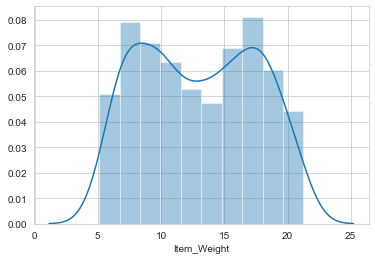

Hard Drinks


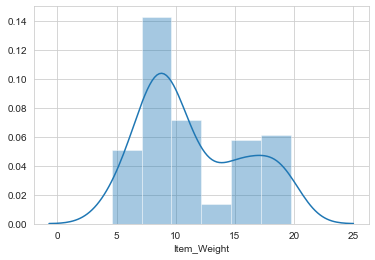

Baking Goods


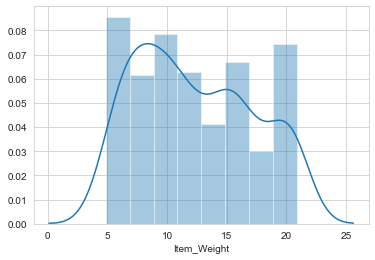

Canned


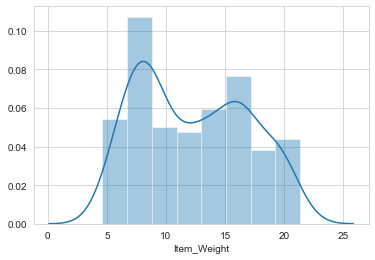

Fruits and Vegetables


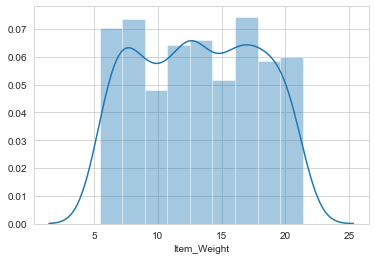

Dairy


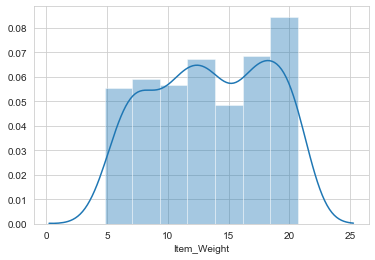

Frozen Foods


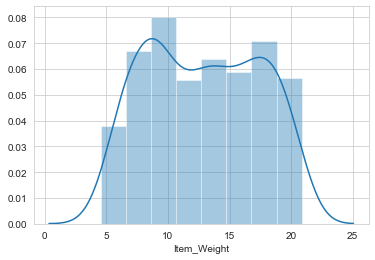

Household


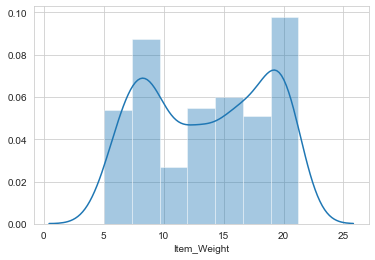

Breakfast


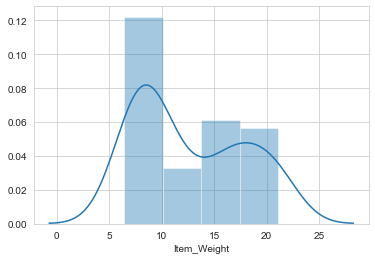

Soft Drinks


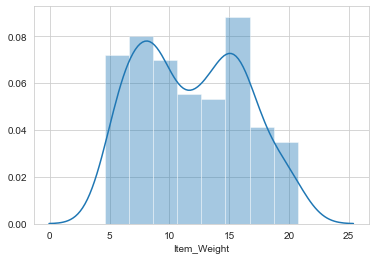

Meat


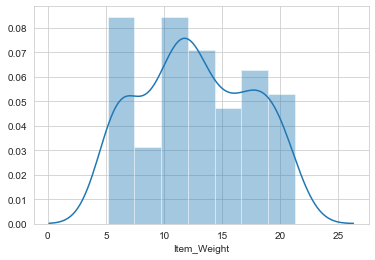

Health and Hygiene


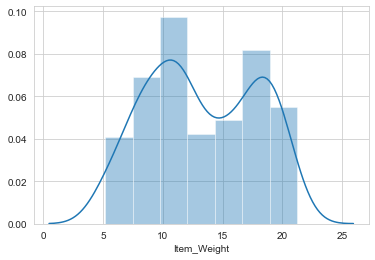

Starchy Foods


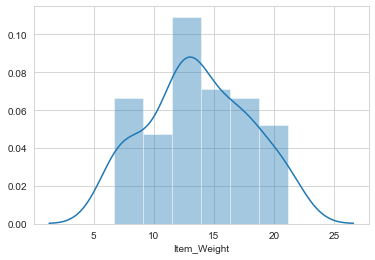

Others


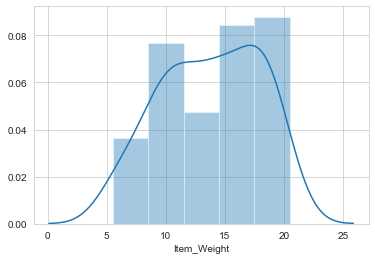

Seafood


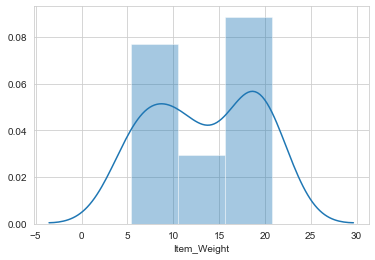

Breads


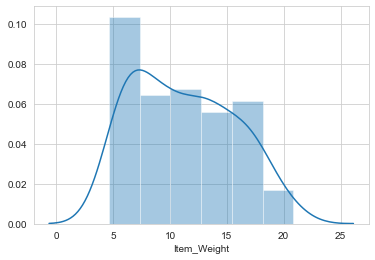

In [14]:
list_nan_weight = list(df[df['Item_Weight'].isna()]['Item_Type'].unique())
sns.set_style('whitegrid')
for item in list_nan_weight:
    print(item)
    sns.distplot(df_coba[df_coba['Item_Type']==item]['Item_Weight'])
    plt.show()

Grafik QQPlot

In [15]:
import statsmodels.api as sn

Snack Foods


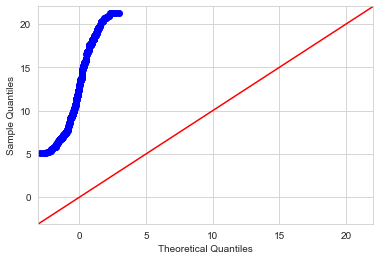

Hard Drinks


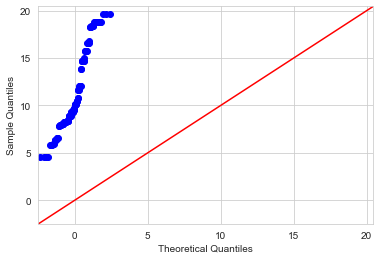

Baking Goods


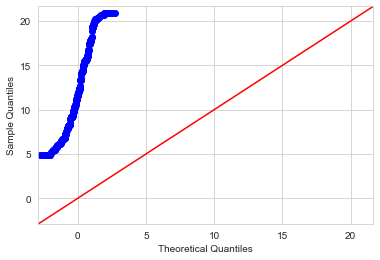

Canned


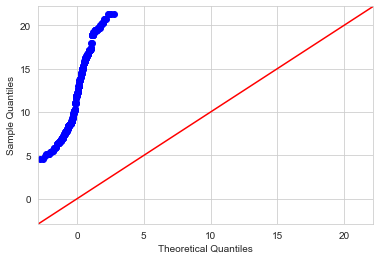

Fruits and Vegetables


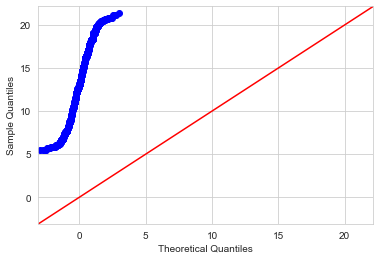

Dairy


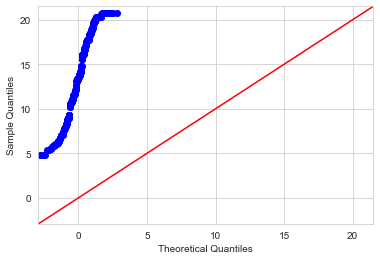

Frozen Foods


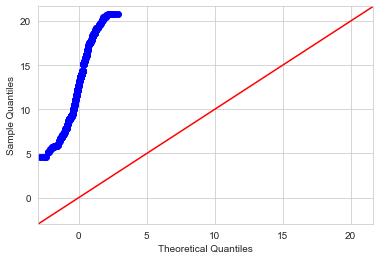

Household


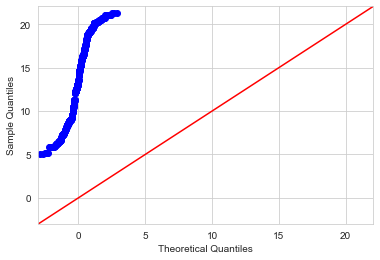

Breakfast


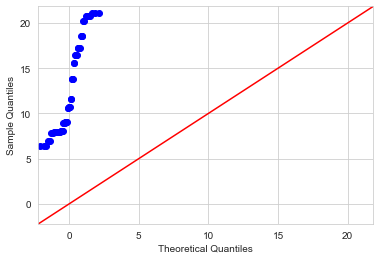

Soft Drinks


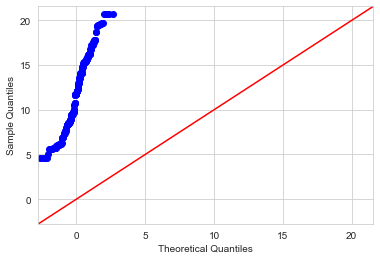

Meat


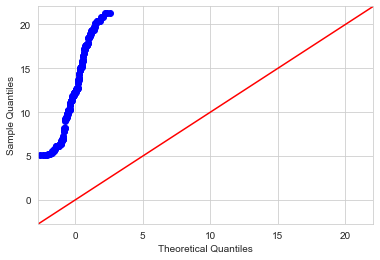

Health and Hygiene


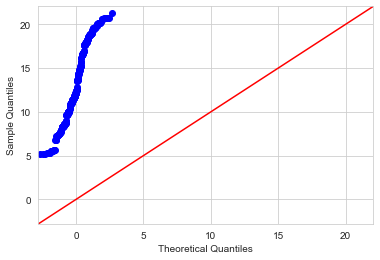

Starchy Foods


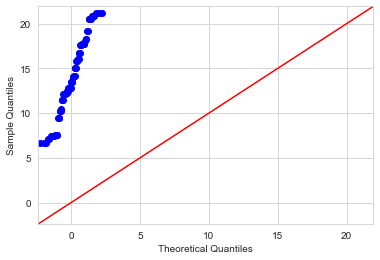

Others


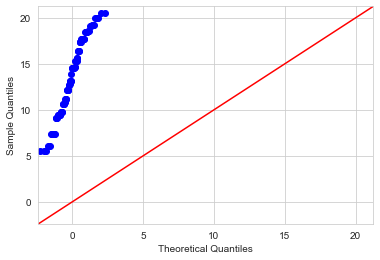

Seafood


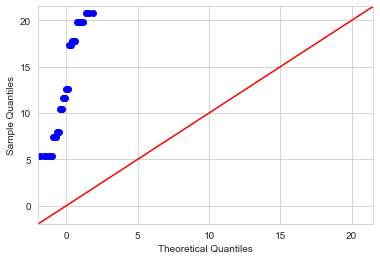

Breads


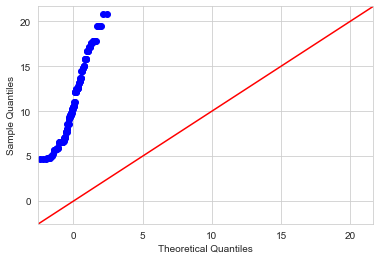

In [16]:
for item in list_nan_weight:
    print(item)
    sn.qqplot(df_coba[df_coba['Item_Type']==item]['Item_Weight'], line = '45')
    plt.show()

Uji Anderson

>H0 : Data terdistribusi dengan normal
H1 : Data tidak terdistribusi dengan normal

>- Nilai anderson stats < critical value(p-value)(dari significance value 5%), terima H0 (tolak H1) => data terdistribusi normal
>- Nilai anderson stats > critical value(p-value)(dari significance value 5%), tolak H0 (terima H1) => data tidak terdistribusi dengan normal

>* Dimana H0 bahwa data tersebut terdistribusi normal
>* H1, dbahwa data tersebut tidak terdistribusi dengan normal.

In [17]:
from scipy.stats import anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in list(zip(anderson(data)[2],anderson(data)[1]))}}
    result['Anderson']['Statistik'] = anderson(data)[0]
    return result

In [18]:
for item in list_nan_weight:
    print(item)
    print(try_normal(df_coba[df_coba['Item_Type']==item]['Item_Weight']))
    print('-----------------------------------------------------')

Snack Foods
{'Anderson': {15.0: 0.573, 10.0: 0.652, 5.0: 0.782, 2.5: 0.912, 1.0: 1.085, 'Statistik': 9.69954317005795}}
-----------------------------------------------------
Hard Drinks
{'Anderson': {15.0: 0.558, 10.0: 0.635, 5.0: 0.762, 2.5: 0.889, 1.0: 1.058, 'Statistik': 4.038395117723027}}
-----------------------------------------------------
Baking Goods
{'Anderson': {15.0: 0.57, 10.0: 0.649, 5.0: 0.778, 2.5: 0.908, 1.0: 1.08, 'Statistik': 5.772772783969856}}
-----------------------------------------------------
Canned
{'Anderson': {15.0: 0.57, 10.0: 0.649, 5.0: 0.779, 2.5: 0.908, 1.0: 1.08, 'Statistik': 6.849730757188922}}
-----------------------------------------------------
Fruits and Vegetables
{'Anderson': {15.0: 0.573, 10.0: 0.652, 5.0: 0.782, 2.5: 0.913, 1.0: 1.086, 'Statistik': 8.32304814905342}}
-----------------------------------------------------
Dairy
{'Anderson': {15.0: 0.57, 10.0: 0.649, 5.0: 0.779, 2.5: 0.909, 1.0: 1.081, 'Statistik': 5.190786950964423}}
-----------

Dengan mengambil Significance Value sebesar 5%, dapat dilihat dari hasil uji anderson, bahwa semua nilai statistik lebih besar dibandingkan critical value. Maka, dapat ditarik kesimpulan bahwa **data tersebut tidak terdistribusi dengan normal**

----------------------

In [19]:
## Untuk data dengan distribusi normal
list_normal_weight =['Hard Drinks', 'Baking Goods', 'Canned', 'Dairy','Frozen Foods', 'Breakfast', 'Soft Drinks', 'Meat', 'Health and Hygiene', 'Starchy Foods', 'Others', 'Seafood', 'Breads'] 
list_mean_normal_weight = []
for item in list_normal_weight:
    list_mean_normal_weight.append(round(df[df['Item_Type']==item]['Item_Weight'].median(),2))
pd.DataFrame(list_mean_normal_weight, index=list_normal_weight, columns=['Median'])

Median
Hard Drinks          10.10
Baking Goods         11.65
Canned               12.15
Dairy                13.35
Frozen Foods         12.85
Breakfast            10.70
Soft Drinks          11.80
Meat                 12.35
Health and Hygiene   12.15
Starchy Foods        13.18
Others               14.50
Seafood              11.65
Breads               10.60

Hard Drinks

In [20]:
index_1 = df[(df['Item_Type']=='Hard Drinks')& (df['Item_Weight'].isna())].index

In [21]:
dfHardDrinks = df.iloc[index_1].fillna(10.10)
dfHardDrinks

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
18             DRI11         10.1          Low Fat         0.034238   
235            DRM47         10.1          Low Fat         0.043574   
320            DRQ35         10.1          Low Fat         0.042087   
409            DRP35         10.1          Low Fat         0.090427   
574            DRK35         10.1          Low Fat         0.125794   
858            DRM59         10.1          Low Fat         0.006289   
1043           DRF23         10.1          Low Fat         0.122058   
1366           DRI11         10.1          Low Fat         0.060237   
1701           DRP35         10.1          Low Fat         0.159097   
1774           DRL11         10.1          low fat         0.047786   
1996           DRJ47         10.1          Low Fat         0.044036   
2322           DRI23         10.1          Low Fat         0.136533   
2357           DRG23         10.1          Low Fat         0.086361   
2484           DRJ59         10.1          Low Fat         0.000000   
2492           DRK35         10.1          Low Fat         0.071499   
3062           DRK23         10.1          Low Fat         0.071628   
3540           DRH23         10.1          Low Fat         0.298205   
3550           DRN47         10.1          Low Fat         0.016745   
3706           DRK59         10.1          Low Fat         0.075084   
3956           DRJ23         10.1          Low Fat         0.000000   
4759           DRN59         10.1          Low Fat         0.063831   
5075           DRH11         10.1          Low Fat         0.075192   
5267           DRL47         10.1          Low Fat         0.038549   
5444           DRM23         10.1          Low Fat         0.000000   
5606           DRK11         10.1          Low Fat         0.018847   
5954           DRI59         10.1          Low Fat         0.040637   
6605           DRL35         10.1          Low Fat         0.030555   
6688           DRM35         10.1          Low Fat         0.070103   
6811           DRO59         10.1          Low Fat         0.094817   
7551           DRM59         10.1               LF         0.003575   
8090           DRL59         10.1          Low Fat         0.037161   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
18    Hard Drinks  113.2834            OUT027                       1985   
235   Hard Drinks  192.8846            OUT027                       1985   
320   Hard Drinks  122.4388            OUT027                       1985   
409   Hard Drinks  126.2336            OUT027                       1985   
574   Hard Drinks   36.2506            OUT019                       1985   
858   Hard Drinks  153.2998            OUT019                       1985   
1043  Hard Drinks  172.8396            OUT027                       1985   
1366  Hard Drinks  115.9834            OUT019                       1985   
1701  Hard Drinks  129.3336            OUT019                       1985   
1774  Hard Drinks  156.5946            OUT027                       1985   
1996  Hard Drinks  173.3080            OUT027                       1985   
2322  Hard Drinks  159.6578            OUT027                       1985   
2357  Hard Drinks  151.2682            OUT027                       1985   
2484  Hard Drinks   39.0164            OUT027                       1985   
2492  Hard Drinks   37.7506            OUT027                       1985   
3062  Hard Drinks  251.9040            OUT027                       1985   
3540  Hard Drinks   55.7614            OUT019                       1985   
3550  Hard Drinks  180.7660            OUT027                       1985   
3706  Hard Drinks  233.9616            OUT027                       1985   
3956  Hard Drinks  188.1872            OUT027                       1985   
4759  Hard Drinks   46.2060            OUT027                       1985   
5075  Hard Drinks   56.0614            OUT027               

Baking Goods

In [22]:
index_2 = df[(df['Item_Type']=='Baking Goods')& (df['Item_Weight'].isna())].index

In [23]:
dfBakingGoods =  df.iloc[index_2].fillna(11.65)
dfBakingGoods

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
21             FDW12        11.65          Regular         0.035400   
23             FDC37        11.65          Low Fat         0.057557   
77             FDN48        11.65          Low Fat         0.113720   
84             FDR12        11.65          Regular         0.031382   
184            FDT12        11.65          Regular         0.049381   
...              ...          ...              ...              ...   
8157           FDX60        11.65               LF         0.080204   
8175           FDW60        11.65          Regular         0.016979   
8181           FDV48        11.65          Regular         0.051367   
8327           FDT24        11.65          Regular         0.000000   
8435           FDT48        11.65          Low Fat         0.000000   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
21    Baking Goods  144.5444            OUT027                       1985   
23    Baking Goods  107.6938            OUT019                       1985   
77    Baking Goods   89.9804            OUT019                       1985   
84    Baking Goods  171.3764            OUT027                       1985   
184   Baking Goods  226.8062            OUT027                       1985   
...            ...       ...               ...                        ...   
8157  Baking Goods   77.9960            OUT027                       1985   
8175  Baking Goods  177.0370            OUT027                       1985   
8181  Baking Goods   77.0644            OUT027                       1985   
8327  Baking Goods   75.9328            OUT027                       1985   
8435  Baking Goods  196.5084            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
21        Medium               Tier 3  Supermarket Type3          4064.0432  
23         Small               Tier 1      Grocery Store           214.3876  
77         Small               Tier 1      Grocery Store           643.1628  
84        Medium               Tier 3  Supermarket Type3          3091.9752  
184       Medium               Tier 3  Supermarket Type3          4739.8302  
...          ...                  ...                ...                ...  
8157      Medium               Tier 3  Supermarket Type3          2716.4640  
8175      Medium               Tier 3  Supermarket Type3          3352.3030  
8181      Medium               Tier 3  Supermarket Type3          3221.1404  
8327      Medium               Tier 3  Supermarket Type3          3012.0792  
8435      Medium               Tier 3  Supermarket Type3           793.6336  

[112 rows x 12 columns]

Canned

In [24]:
index_3 = df[(df['Item_Type']=='Canned')& (df['Item_Weight'].isna())].index

In [25]:
dfCanned = df.iloc[index_3].fillna(12.15)
dfCanned

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
29             FDC14        12.15          Regular         0.072222    Canned   
59             FDI26        12.15          Low Fat         0.061082    Canned   
130            FDY25        12.15          Low Fat         0.033810    Canned   
199            FDX49        12.15              reg         0.101339    Canned   
229            FDX25        12.15          Low Fat         0.101562    Canned   
...              ...          ...              ...              ...       ...   
8236           FDT37        12.15          Low Fat         0.061754    Canned   
8273           FDD14        12.15               LF         0.297313    Canned   
8362           FDY37        12.15          Regular         0.026440    Canned   
8372           FDA01        12.15          Regular         0.054115    Canned   
8449           FDG02        12.15          Low Fat         0.019717    Canned   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
29     43.6454            OUT019                       1985       Small   
59    180.0344            OUT019                       1985       Small   
130   180.5976            OUT027                       1985      Medium   
199   232.6300            OUT027                       1985      Medium   
229   181.9292            OUT027                       1985      Medium   
...        ...               ...                        ...         ...   
8236  253.3014            OUT019                       1985       Small   
8273  185.4266            OUT019                       1985       Small   
8362  143.6470            OUT027                       1985      Medium   
8372   58.4904            OUT027                       1985      Medium   
8449  191.9188            OUT019                       1985       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
29                 Tier 1      Grocery Store           125.8362  
59                 Tier 1      Grocery Store           892.1720  
130                Tier 3  Supermarket Type3          7968.2944  
199                Tier 3  Supermarket Type3          5359.6900  
229                Tier 3  Supermarket Type3          3101.2964  
...                   ...                ...                ...  
8236               Tier 1      Grocery Store           510.0028  
8273               Tier 1      Grocery Store           368.8532  
8362               Tier 3  Supermarket Type3          2862.9400  
8372               Tier 3  Supermarket Type3          1054.6272  
8449               Tier 1      Grocery Store           571.2564  

[110 rows x 12 columns]

Dairy

In [26]:
index_4 = df[(df['Item_Type']=='Dairy')& (df['Item_Weight'].isna())].index

In [27]:
dfDairy =df.iloc[index_4].fillna(13.35)
dfDairy

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
49             FDS02        13.35          Regular         0.255395     Dairy   
198            FDE40        13.35          Regular         0.098664     Dairy   
227            DRF27        13.35          Low Fat         0.049755     Dairy   
250            DRF15        13.35          Low Fat         0.058153     Dairy   
364            FDX26        13.35          Low Fat         0.153741     Dairy   
...              ...          ...              ...              ...       ...   
7987           FDI27        13.35          Regular         0.045764     Dairy   
8060           FDH27        13.35          Low Fat         0.102158     Dairy   
8165           FDD39        13.35          Low Fat         0.069815     Dairy   
8194           FDY15        13.35          Regular         0.299098     Dairy   
8404           DRH39        13.35          low fat         0.000000     Dairy   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
49    196.8794            OUT019                       1985       Small   
198    62.9194            OUT027                       1985      Medium   
227   152.1340            OUT019                       1985       Small   
250   152.0340            OUT019                       1985       Small   
364   182.6292            OUT019                       1985       Small   
...        ...               ...                        ...         ...   
7987   43.8744            OUT027                       1985      Medium   
8060  145.0128            OUT019                       1985       Small   
8165  214.3850            OUT027                       1985      Medium   
8194  157.8630            OUT019                       1985       Small   
8404   75.9670            OUT019                       1985       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
49                 Tier 1      Grocery Store           780.3176  
198                Tier 3  Supermarket Type3          2105.2596  
227                Tier 1      Grocery Store           153.1340  
250                Tier 1      Grocery Store           306.2680  
364                Tier 1      Grocery Store           182.4292  
...                   ...                ...                ...  
7987               Tier 3  Supermarket Type3          1222.4088  
8060               Tier 1      Grocery Store           143.8128  
8165               Tier 3  Supermarket Type3          4327.7000  
8194               Tier 1      Grocery Store           469.3890  
8404               Tier 1      Grocery Store           153.1340  

[116 rows x 12 columns]

FrozenFoods

In [28]:
index_5 = df[(df['Item_Type']=='Frozen Foods')& (df['Item_Weight'].isna())].index

In [29]:
dfFrozenFoods = df.iloc[index_5].fillna(12.85)
dfFrozenFoods

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
63             FDY40        12.85          Regular         0.150286   
95             FDU04        12.85          Low Fat         0.009715   
180            FDQ28        12.85          Regular         0.060134   
255            FDQ04        12.85          Low Fat         0.148393   
334            FDC41        12.85          Low Fat         0.204700   
...              ...          ...              ...              ...   
8282           FDD28        12.85          Low Fat         0.053039   
8301           FDH41        12.85          Low Fat         0.081614   
8345           FDY28        12.85          Regular         0.266397   
8442           FDX40        12.85          Low Fat         0.173324   
8444           FDO28        12.85          Low Fat         0.071948   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
63    Frozen Foods   51.0692            OUT019                       1985   
95    Frozen Foods  120.0414            OUT019                       1985   
180   Frozen Foods  153.0656            OUT027                       1985   
255   Frozen Foods   41.5796            OUT019                       1985   
334   Frozen Foods   76.8670            OUT019                       1985   
...            ...       ...               ...                        ...   
8282  Frozen Foods   59.5904            OUT027                       1985   
8301  Frozen Foods  214.7534            OUT027                       1985   
8345  Frozen Foods  215.6218            OUT019                       1985   
8442  Frozen Foods   39.9164            OUT019                       1985   
8444  Frozen Foods  121.6098            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
63         Small               Tier 1      Grocery Store           147.8076  
95         Small               Tier 1      Grocery Store           487.3656  
180       Medium               Tier 3  Supermarket Type3          6024.1584  
255        Small               Tier 1      Grocery Store            41.2796  
334        Small               Tier 1      Grocery Store           229.7010  
...          ...                  ...                ...                ...  
8282      Medium               Tier 3  Supermarket Type3          1640.5312  
8301      Medium               Tier 3  Supermarket Type3          5806.4418  
8345       Small               Tier 1      Grocery Store           641.1654  
8442       Small               Tier 1      Grocery Store            38.6164  
8444      Medium               Tier 3  Supermarket Type3           482.0392  

[138 rows x 12 columns]

Breakfast

In [30]:
index_6 = df[(df['Item_Type']=='Breakfast')& (df['Item_Weight'].isna())].index

In [31]:
dfBreakfast = df.iloc[index_6].fillna(10.70)
dfBreakfast

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
87             FDQ49         10.7          Regular         0.039058   
291            FDM25         10.7          Regular         0.060372   
335            FDO01         10.7          Regular         0.020618   
920            FDO49         10.7          Regular         0.057870   
1088           FDL13         10.7          Regular         0.098607   
3436           FDK25         10.7          Regular         0.156072   
3767           FDN13         10.7          Low Fat         0.266234   
4457           FDO49         10.7          Regular         0.032892   
4462           FDO13         10.7          Low Fat         0.106908   
4943           FDN01         10.7          Low Fat         0.126761   
5122           FDN25         10.7          Regular         0.107110   
6000           FDO37         10.7          Low Fat         0.021273   
6040           FDP49         10.7          Regular         0.120966   
6077           FDM01         10.7          Regular         0.094109   
6796           FDN01         10.7          Low Fat         0.072048   
7292           FDP49         10.7          Regular         0.068754   
7343           FDR37         10.7          Regular         0.065929   
7690           FDQ37         10.7          Low Fat         0.088828   
7866           FDP37         10.7          Low Fat         0.250560   
7881           FDQ49         10.7          Regular         0.068718   
7949           FDK25         10.7          Regular         0.274592   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
87    Breakfast  155.9630            OUT027                       1985   
291   Breakfast  174.0712            OUT027                       1985   
335   Breakfast  129.3994            OUT027                       1985   
920   Breakfast   49.7008            OUT019                       1985   
1088  Breakfast  232.7300            OUT019                       1985   
3436  Breakfast  169.3474            OUT027                       1985   
3767  Breakfast   98.5358            OUT019                       1985   
4457  Breakfast   49.3008            OUT027                       1985   
4462  Breakfast  162.8526            OUT019                       1985   
4943  Breakfast  176.9370            OUT019                       1985   
5122  Breakfast   55.5588            OUT019                       1985   
6000  Breakfast  229.1326            OUT027                       1985   
6040  Breakfast   55.8614            OUT019                       1985   
6077  Breakfast  102.9332            OUT027                       1985   
6796  Breakfast  177.9370            OUT027                       1985   
7292  Breakfast   54.5614            OUT027                       1985   
7343  Breakfast  183.0292            OUT027                       1985   
7690  Breakfast  192.2478            OUT027                       1985   
7866  Breakfast  126.9994            OUT019                       1985   
7881  Breakfast  155.5630            OUT019                       1985   
7949  Breakfast  167.8474            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
87        Medium               Tier 3  Supermarket Type3          3285.7230  
291       Medium               Tier 3  Supermarket Type3          3866.9664  
335       Medium               Tier 3  Supermarket Type3          2055.9904  
920        Small               Tier 1      Grocery Store            50.6008  
1088       Small               Tier 1      Grocery Store           932.1200  
3436      Medium               Tier 3  Supermarket Type3          3874.2902  
3767       Small               Tier 1      Grocery Store           402.1432  
4457      Medium               Tier 3  Supermarket Type3          1518.0240  
4462       Small               Tier 1      Grocery Store           493.3578  
4943       Small               Ti

Soft Drinks

In [32]:
index_7 = df[(df['Item_Type']=='Soft Drinks')& (df['Item_Weight'].isna())].index

In [33]:
dfSoftDrinks = df.iloc[index_7].fillna(11.80)
dfSoftDrinks

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
108            DRE60         11.8          low fat         0.278974   
153            DRK12         11.8          Low Fat         0.041683   
178            DRY23         11.8          Regular         0.191014   
458            DRB48         11.8          Regular         0.024733   
509            DRN36         11.8          Low Fat         0.087855   
...              ...          ...              ...              ...   
7753           DRL60         11.8          Low Fat         0.047377   
7763           DRF25         11.8          Low Fat         0.068153   
8190           DRE25         11.8          Low Fat         0.072928   
8485           DRK37         11.8          Low Fat         0.043792   
8487           DRG13         11.8          Low Fat         0.037006   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
108   Soft Drinks  225.3720            OUT019                       1985   
153   Soft Drinks   31.2900            OUT027                       1985   
178   Soft Drinks   42.1112            OUT019                       1985   
458   Soft Drinks   40.2822            OUT027                       1985   
509   Soft Drinks   95.9752            OUT019                       1985   
...           ...       ...               ...                        ...   
7753  Soft Drinks  150.6682            OUT019                       1985   
7763  Soft Drinks   36.0190            OUT019                       1985   
8190  Soft Drinks   94.4120            OUT027                       1985   
8485  Soft Drinks  189.0530            OUT027                       1985   
8487  Soft Drinks  164.7526            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
108        Small               Tier 1      Grocery Store           679.1160  
153       Medium               Tier 3  Supermarket Type3           898.8300  
178        Small               Tier 1      Grocery Store            42.6112  
458       Medium               Tier 3  Supermarket Type3          1296.3126  
509        Small               Tier 1      Grocery Store            95.8752  
...          ...                  ...                ...                ...  
7753       Small               Tier 1      Grocery Store           457.4046  
7763       Small               Tier 1      Grocery Store            73.2380  
8190      Medium               Tier 3  Supermarket Type3          1304.9680  
8485      Medium               Tier 3  Supermarket Type3          6261.8490  
8487      Medium               Tier 3  Supermarket Type3          4111.3150  

[71 rows x 12 columns]

Meat

In [34]:
index_8 =df[(df['Item_Type']=='Meat')& (df['Item_Weight'].isna())].index

In [35]:
dfMeat = df.iloc[index_8].fillna(12.35)
dfMeat

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
112            FDW39        12.35          Regular         0.064625      Meat   
275            FDH19        12.35          Low Fat         0.032928      Meat   
357            FDN39        12.35          Regular         0.065203      Meat   
434            FDW27        12.35          Regular         0.264125      Meat   
669            FDO51        12.35          Regular         0.041779      Meat   
...              ...          ...              ...              ...       ...   
8123           FDY03        12.35          Regular         0.075753      Meat   
8145           FDL43        12.35          Low Fat         0.026933      Meat   
8201           FDO03        12.35          Regular         0.036704      Meat   
8349           FDN15        12.35          Low Fat         0.016653      Meat   
8358           FDK27        12.35          Low Fat         0.015664      Meat   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
112   176.9370            OUT019                       1985       Small   
275   173.1738            OUT027                       1985      Medium   
357   166.0816            OUT027                       1985      Medium   
434   155.7314            OUT019                       1985       Small   
669    43.4112            OUT027                       1985      Medium   
...        ...               ...                        ...         ...   
8123  111.1202            OUT027                       1985      Medium   
8145   78.4670            OUT027                       1985      Medium   
8201  228.1352            OUT027                       1985      Medium   
8349  139.5180            OUT027                       1985      Medium   
8358  122.2756            OUT019                       1985       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
112                Tier 1      Grocery Store           176.4370  
275                Tier 3  Supermarket Type3          7298.4996  
357                Tier 3  Supermarket Type3          5033.4480  
434                Tier 1      Grocery Store           155.1314  
669                Tier 3  Supermarket Type3          1107.8912  
...                   ...                ...                ...  
8123               Tier 3  Supermarket Type3          3150.5656  
8145               Tier 3  Supermarket Type3          3292.3810  
8201               Tier 3  Supermarket Type3          9390.4432  
8349               Tier 3  Supermarket Type3          2936.1780  
8358               Tier 1      Grocery Store           121.1756  

[88 rows x 12 columns]

Health and Hygiene

In [36]:
index_9 =df[(df['Item_Type']=='Health and Hygiene')& (df['Item_Weight'].isna())].index

In [37]:
dfHealthandHygiene = df.iloc[index_9].fillna(12.15)
dfHealthandHygiene

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
132            NCR53        12.15          Low Fat         0.144338   
182            NCO17        12.15          Low Fat         0.128478   
239            NCU05        12.15          Low Fat         0.058452   
328            NCW17        12.15          Low Fat         0.019292   
371            NCW53        12.15          Low Fat         0.053393   
...              ...          ...              ...              ...   
8160           NCP17        12.15          Low Fat         0.027580   
8353           NCX41        12.15          Low Fat         0.031024   
8375           NCM05        12.15          Low Fat         0.104784   
8390           NCQ05        12.15          Low Fat         0.037829   
8472           NCS41        12.15          Low Fat         0.053185   

               Item_Type  Item_MRP Outlet_Identifier  \
132   Health and Hygiene  224.4404            OUT027   
182   Health and Hygiene  117.9440            OUT019   
239   Health and Hygiene   79.9618            OUT027   
328   Health and Hygiene  129.9994            OUT027   
371   Health and Hygiene  193.8162            OUT019   
...                  ...       ...               ...   
8160  Health and Hygiene   62.2168            OUT027   
8353  Health and Hygiene  210.5244            OUT019   
8375  Health and Hygiene  266.0226            OUT019   
8390  Health and Hygiene  151.0708            OUT019   
8472  Health and Hygiene  182.9608            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
132                        1985      Medium               Tier 3   
182                        1985       Small               Tier 1   
239                        1985      Medium               Tier 3   
328                        1985      Medium               Tier 3   
371                        1985       Small               Tier 1   
...                         ...         ...                  ...   
8160                       1985      Medium               Tier 3   
8353                       1985       Small               Tier 1   
8375                       1985       Small               Tier 1   
8390                       1985       Small               Tier 1   
8472                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
132   Supermarket Type3          6976.2524  
182       Grocery Store           239.6880  
239   Supermarket Type3           241.6854  
328   Supermarket Type3          3340.9844  
371       Grocery Store           384.8324  
...                 ...                ...  
8160  Supermarket Type3          1661.8368  
8353      Grocery Store          1482.0708  
8375      Grocery Store           528.6452  
8390      Grocery Store           451.4124  
8472  Supermarket Type3          1653.8472  

[90 rows x 12 columns]

Starchy Foods

In [38]:
index_10 =df[(df['Item_Type']=='Starchy Foods')& (df['Item_Weight'].isna())].index

In [39]:
dfStarchyFoods = df.iloc[index_10].fillna(13.18)
dfStarchyFoods

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
136            FDH35        13.18          Low Fat         0.059957   
610            FDC11        13.18               LF         0.141106   
661            FDA34        13.18          Low Fat         0.014789   
1080           FDC35        13.18          Low Fat         0.122243   
3249           FDD59        13.18          Regular         0.065860   
3851           FDB23        13.18          Regular         0.005562   
4043           FDG35        13.18          Regular         0.012328   
4083           FDG35        13.18              reg         0.007007   
4126           FDC59        13.18          Regular         0.054364   
4378           FDE11        13.18          Regular         0.134442   
5708           FDD35        13.18          Low Fat         0.025739   
6039           FDE35        13.18          Regular         0.000000   
6208           FDB35        13.18          Regular         0.113139   
6221           FDB23        13.18          Regular         0.009785   
6293           FDA22        13.18          Low Fat         0.000000   
7088           FDE11        13.18          Regular         0.236536   
7803           FDD11        13.18          Low Fat         0.030468   
8463           FDG59        13.18          Low Fat         0.043025   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
136   Starchy Foods  165.4526            OUT027                       1985   
610   Starchy Foods   87.9172            OUT027                       1985   
661   Starchy Foods  174.4080            OUT027                       1985   
1080  Starchy Foods  207.5638            OUT027                       1985   
3249  Starchy Foods   81.8960            OUT027                       1985   
3851  Starchy Foods  224.0062            OUT027                       1985   
4043  Starchy Foods  173.8738            OUT019                       1985   
4083  Starchy Foods  173.5738            OUT027                       1985   
4126  Starchy Foods   63.8168            OUT027                       1985   
4378  Starchy Foods  183.9924            OUT027                       1985   
5708  Starchy Foods  120.7440            OUT027                       1985   
6039  Starchy Foods   59.8904            OUT027                       1985   
6208  Starchy Foods   92.9804            OUT019                       1985   
6221  Starchy Foods  225.9062            OUT019                       1985   
6293  Starchy Foods  167.5158            OUT027                       1985   
7088  Starchy Foods  184.1924            OUT019                       1985   
7803  Starchy Foods  254.7040            OUT027                       1985   
8463  Starchy Foods   37.6164            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
136       Medium               Tier 3  Supermarket Type3          5262.4832  
610       Medium               Tier 3  Supermarket Type3          3836.3396  
661       Medium               Tier 3  Supermarket Type3          7443.6440  
1080      Medium               Tier 3  Supermarket Type3          4555.4036  
3249      Medium               Tier 3  Supermarket Type3          1677.8160  
3851      Medium               Tier 3  Supermarket Type3          3837.0054  
4043       Small               Tier 1      Grocery Store           347.5476  
4083      Medium               Tier 3  Supermarket Type3          1216.4166  
4126      Medium               Tier 3  Supermarket Type3           958.7520  
4378      Medium               Tier 3  Supermarket Type3          6478.2340  
5708      Medium               Tier 3  Supermarket Type3          3954.8520  
6039      Medium               Tier 3  Supermarket Type3          1757.7120  
6208       Small               Tier 1      Grocery Store           183.7608  
6221       Small               Tier 1      Grocery Store           451.4124  
62

Others

In [40]:
index_11 =df[(df['Item_Type']=='Others')& (df['Item_Weight'].isna())].index

In [41]:
dfOthers = df.iloc[index_11].fillna(14.50)
dfOthers

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
225            NCO07         14.5          Low Fat         0.017117    Others   
400            NCK31         14.5          Low Fat         0.026917    Others   
556            NCQ43         14.5          Low Fat         0.110763    Others   
837            NCM19         14.5          Low Fat         0.047008    Others   
933            NCN14         14.5          Low Fat         0.160936    Others   
2200           NCI31         14.5          Low Fat         0.080933    Others   
2431           NCM07         14.5          Low Fat         0.039768    Others   
2642           NCN43         14.5          Low Fat         0.006727    Others   
2675           NCJ31         14.5               LF         0.181769    Others   
2842           NCO55         14.5          Low Fat         0.090596    Others   
3160           NCP50         14.5          Low Fat         0.020460    Others   
3288           NCL07         14.5          Low Fat         0.031187    Others   
3529           NCM43         14.5          Low Fat         0.019381    Others   
3635           NCL55         14.5          Low Fat         0.113213    Others   
4567           NCL31         14.5          Low Fat         0.210596    Others   
5070           NCJ19         14.5          Low Fat         0.117608    Others   
5338           NCI31         14.5          Low Fat         0.142393    Others   
5461           NCQ43         14.5          Low Fat         0.194875    Others   
5604           NCQ38         14.5               LF         0.023403    Others   
5934           NCP55         14.5          low fat         0.019592    Others   
5967           NCO02         14.5          Low Fat         0.073013    Others   
6139           NCL07         14.5          Low Fat         0.054870    Others   
6504           NCM26         14.5          Low Fat         0.040521    Others   
6955           NCN19         14.5          Low Fat         0.021185    Others   
7165           NCM43         14.5          Low Fat         0.034099    Others   
7355           NCP50         14.5          Low Fat         0.035998    Others   
7504           NCO55         14.5          Low Fat         0.159394    Others   
7581           NCM07         14.5          Low Fat         0.069968    Others   
7887           NCP43         14.5          Low Fat         0.053414    Others   
8031           NCN43         14.5          Low Fat         0.011835    Others   
8249           NCL31         14.5          Low Fat         0.119699    Others   
8488           NCN14         14.5          Low Fat         0.091473    Others   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
225   211.9560            OUT019                       1985       Small   
400    50.9666            OUT027                       1985      Medium   
556   108.5912            OUT027                       1985      Medium   
837   112.0202            OUT027                       1985      Medium   
933   184.2608            OUT019                       1985       Small   
2200   37.5190            OUT027                       1985      Medium   
2431   83.9908            OUT027                       1985      Medium   
2642  125.1730            OUT027                       1985      Medium   
2675  240.6196            OUT027                       1985      Medium   
2842  106.6938            OUT027                       1985      Medium   
3160   81.7618            OUT027                       1985      Medium   
3288   39.5480            OUT027                       1985      Medium   
3529  164.3210            OUT027                       1985      Medium   
3635  254.6040            OUT019                       1985       Small   
4567  144.7470            OUT019                       1985       Small   
5070   55.2588            OUT027                       1985      Medium   
5338   36.4190            OUT019                       1

Seafood

In [42]:
index_12 =df[(df['Item_Type']=='Seafood')& (df['Item_Weight'].isna())].index

In [43]:
dfSeafood = df.iloc[index_12].fillna(11.65)
dfSeafood

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
231            FDG33        11.65          Regular         0.139561   Seafood   
867            FDJ45        11.65          Low Fat         0.073055   Seafood   
1176           FDK45        11.65          Low Fat         0.059281   Seafood   
1575           FDG33        11.65          Regular         0.245543   Seafood   
1765           FDI57        11.65          Low Fat         0.053764   Seafood   
1880           FDH21        11.65          Low Fat         0.054671   Seafood   
2265           FDH09        11.65          Low Fat         0.055806   Seafood   
4338           FDH21        11.65          Low Fat         0.031074   Seafood   
4751           FDF33        11.65          Low Fat         0.000000   Seafood   
5187           FDG21        11.65          Regular         0.145591   Seafood   
6814           FDJ57        11.65          Regular         0.000000   Seafood   
6903           FDG21        11.65          Regular         0.256152   Seafood   
6986           FDJ45        11.65          Low Fat         0.128533   Seafood   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
231   170.4764            OUT027                       1985      Medium   
867    33.7216            OUT027                       1985      Medium   
1176  111.5860            OUT019                       1985       Small   
1575  172.2764            OUT019                       1985       Small   
1765  195.7768            OUT027                       1985      Medium   
1880  158.6604            OUT019                       1985       Small   
2265   52.4982            OUT027                       1985      Medium   
4338  157.5604            OUT027                       1985      Medium   
4751  109.4596            OUT027                       1985      Medium   
5187  148.7050            OUT027                       1985      Medium   
6814  184.3582            OUT019                       1985       Small   
6903  151.0050            OUT019                       1985       Small   
6986   34.2216            OUT019                       1985       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
231                Tier 3  Supermarket Type3          3435.5280  
867                Tier 3  Supermarket Type3          1280.9992  
1176               Tier 1      Grocery Store           339.5580  
1575               Tier 1      Grocery Store           171.7764  
1765               Tier 3  Supermarket Type3          3547.3824  
1880               Tier 1      Grocery Store           316.9208  
2265               Tier 3  Supermarket Type3          1209.7586  
4338               Tier 3  Supermarket Type3          5704.5744  
4751               Tier 3  Supermarket Type3          1833.6132  
5187               Tier 3  Supermarket Type3          1797.6600  
6814               Tier 1      Grocery Store           185.7582  
6903               Tier 1      Grocery Store           149.8050  
6986               Tier 1      Grocery Store           173.1080

Breads

In [44]:
index_13 =df[(df['Item_Type']=='Breads')& (df['Item_Weight'].isna())].index

In [45]:
dfBreads = df.iloc[index_13].fillna(10.60)
dfBreads

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
417            FDW35         10.6          low fat         0.019416    Breads   
491            FDO11         10.6          Regular         0.030118    Breads   
946            FDS35         10.6               LF         0.110682    Breads   
952            FDX59         10.6          Low Fat         0.051411    Breads   
1040           FDR23         10.6          Low Fat         0.081391    Breads   
1324           FDO23         10.6          Low Fat         0.256375    Breads   
1436           FDP23         10.6          Low Fat         0.035415    Breads   
1689           FDW11         10.6          Low Fat         0.048546    Breads   
2229           FDY47         10.6          Regular         0.054221    Breads   
2264           FDO23         10.6          Low Fat         0.145718    Breads   
2432           FDY35         10.6          Regular         0.015950    Breads   
2435           FDR23         10.6          Low Fat         0.143199    Breads   
2641           FDP11         10.6          Low Fat         0.068766    Breads   
2663           FDQ23         10.6          Low Fat         0.042942    Breads   
2715           FDW59         10.6          Low Fat         0.036271    Breads   
3164           FDX35         10.6          Regular         0.139913    Breads   
3199           FDU35         10.6          Low Fat         0.078832    Breads   
3269           FDX47         10.6          Regular         0.060588    Breads   
3404           FDR47         10.6          Low Fat         0.087045    Breads   
3757           FDR35         10.6          Low Fat         0.020597    Breads   
3769           FDT11         10.6          Regular         0.029230    Breads   
3896           FDV23         10.6          Low Fat         0.185307    Breads   
4516           FDV23         10.6          Low Fat         0.105324    Breads   
4555           FDU23         10.6               LF         0.021618    Breads   
4608           FDN23         10.6          Regular         0.075142    Breads   
4631           FDQ11         10.6          Regular         0.067373    Breads   
4663           FDT47         10.6          Regular         0.024390    Breads   
4812           FDY35         10.6          Regular         0.028062    Breads   
4981           FDX47         10.6          Regular         0.034437    Breads   
5209           FDQ23         10.6          low fat         0.024407    Breads   
5382           FDQ59         10.6          Regular         0.000000    Breads   
5466           FDZ35         10.6          Regular         0.022171    Breads   
5536           FDS47         10.6               LF         0.000000    Breads   
5705           FDP11         10.6          Low Fat         0.120986    Breads   
6008           FDS23         10.6          Low Fat         0.246679    Breads   
6387           FDS11         10.6          Regular         0.097276    Breads   
6581           FDW47         10.6          Low Fat         0.081197    Breads   
6942           FDQ11         10.6          Regular         0.118536    Breads   
7057           FDP59         10.6          Regular         0.056192    Breads   
7063           FDU11         10.6          Low Fat         0.092145    Breads   
7119           FDV47         10.6          Low Fat         0.094910    Breads   
7213           FDU59         10.6          Low Fat         0.095919    Breads   
7317           FDS59         10.6          Regular         0.043681    Breads   
7344           FDT59         10.6          Low Fat         0.015834    Breads   
7737           FDS11         10.6          Regular         0.055289    Breads   
7998           FDS59         10.6          Regular         0.076852    Breads   
8198           FDR59         10.6          Regular         0.063554    Breads   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
417    41.6454            OUT019         

In [46]:
## Untuk data dengan distribusi tidak normal
list_nonnormal_weight =['Snack Foods', 'Fruits and Vegetables', 'Household'] 
list_median_nonnormal_weight = []
for item in list_nonnormal_weight:
    list_median_nonnormal_weight.append(df[df['Item_Type']==item]['Item_Weight'].median())
pd.DataFrame(list_median_nonnormal_weight, index=list_nonnormal_weight, columns=['Median'])

Median
Snack Foods             13.15
Fruits and Vegetables   13.10
Household               13.15

Snack Foods

In [47]:
index_14 =df[(df['Item_Type']=='Snack Foods')& (df['Item_Weight'].isna())].index

In [48]:
dfSnackFoods = df.iloc[index_14].fillna(13.15)
dfSnackFoods

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10        13.15          Low Fat         0.127470   
38             FDX10        13.15          Regular         0.123111   
39             FDB34        13.15          Low Fat         0.026481   
64             FDY45        13.15          Low Fat         0.026016   
101            FDD10        13.15          Regular         0.045798   
...              ...          ...              ...              ...   
8274           FDX45        13.15          Low Fat         0.104348   
8320           FDL10        13.15          Low Fat         0.039301   
8356           FDN45        13.15          Low Fat         0.117531   
8469           FDQ45        13.15          Regular         0.019114   
8480           FDQ58        13.15          Low Fat         0.000000   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
38    Snack Foods   36.9874            OUT027                       1985   
39    Snack Foods   87.6198            OUT027                       1985   
64    Snack Foods  255.8356            OUT027                       1985   
101   Snack Foods  178.5344            OUT027                       1985   
...           ...       ...               ...                        ...   
8274  Snack Foods  156.2630            OUT027                       1985   
8320  Snack Foods   99.5042            OUT027                       1985   
8356  Snack Foods  222.7088            OUT027                       1985   
8469  Snack Foods  182.1608            OUT019                       1985   
8480  Snack Foods  154.5340            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7         Medium               Tier 3  Supermarket Type3          4022.7636  
38        Medium               Tier 3  Supermarket Type3           388.1614  
39        Medium               Tier 3  Supermarket Type3          2180.4950  
64        Medium               Tier 3  Supermarket Type3          2543.3560  
101       Medium               Tier 3  Supermarket Type3          2854.9504  
...          ...                  ...                ...                ...  
8274      Medium               Tier 3  Supermarket Type3          4850.3530  
8320      Medium               Tier 3  Supermarket Type3          1884.8798  
8356      Medium               Tier 3  Supermarket Type3          4026.7584  
8469       Small               Tier 1      Grocery Store           367.5216  
8480       Small               Tier 1      Grocery Store           459.4020  

[212 rows x 12 columns]

Fruits  and Vegetables

In [49]:
index_15 =df[(df['Item_Type']=='Fruits and Vegetables')& (df['Item_Weight'].isna())].index

In [50]:
dfFruits = df.iloc[index_15].fillna(13.10)
dfFruits

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
36             FDV20         13.1          Regular         0.059512   
62             FDF09         13.1          Low Fat         0.012090   
161            FDR07         13.1          Low Fat         0.077367   
186            FDO08         13.1          Regular         0.094154   
284            FDJ08         13.1          Low Fat         0.193773   
...              ...          ...              ...              ...   
8373           FDX44         13.1          Low Fat         0.042758   
8405           FDB09         13.1          Low Fat         0.100493   
8422           FDD08         13.1          Low Fat         0.035183   
8458           FDX20         13.1          Low Fat         0.074518   
8490           FDU44         13.1          Regular         0.102296   

                  Item_Type  Item_MRP Outlet_Identifier  \
36    Fruits and Vegetables  128.0678            OUT027   
62    Fruits and Vegetables   38.2848            OUT027   
161   Fruits and Vegetables   97.0094            OUT027   
186   Fruits and Vegetables  165.7526            OUT019   
284   Fruits and Vegetables  190.3846            OUT019   
...                     ...       ...               ...   
8373  Fruits and Vegetables   88.4172            OUT027   
8405  Fruits and Vegetables  123.1046            OUT019   
8422  Fruits and Vegetables   37.8506            OUT027   
8458  Fruits and Vegetables  227.3720            OUT019   
8490  Fruits and Vegetables  162.3552            OUT019   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
36                         1985      Medium               Tier 3   
62                         1985      Medium               Tier 3   
161                        1985      Medium               Tier 3   
186                        1985       Small               Tier 1   
284                        1985       Small               Tier 1   
...                         ...         ...                  ...   
8373                       1985      Medium               Tier 3   
8405                       1985       Small               Tier 1   
8422                       1985      Medium               Tier 3   
8458                       1985       Small               Tier 1   
8490                       1985       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
36    Supermarket Type3          2797.6916  
62    Supermarket Type3           484.7024  
161   Supermarket Type3          1808.9786  
186       Grocery Store           657.8104  
284       Grocery Store           573.2538  
...                 ...                ...  
8373  Supermarket Type3          2051.9956  
8405      Grocery Store           124.5046  
8422  Supermarket Type3           417.4566  
8458      Grocery Store           452.7440  
8490      Grocery Store           487.3656  

[213 rows x 12 columns]

Household

In [51]:
index_16 =df[(df['Item_Type']=='Household')& (df['Item_Weight'].isna())].index

In [52]:
dfHousehold = df.iloc[index_16].fillna(13.15)
dfHousehold

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
83             NCL18        13.15          Low Fat         0.293418   
98             NCP18        13.15          Low Fat         0.028460   
168            NCB30        13.15          Low Fat         0.025579   
194            NCX06        13.15          Low Fat         0.015611   
230            NCX42        13.15          Low Fat         0.005950   
...              ...          ...              ...              ...   
8337           NCV06        13.15          Low Fat         0.116750   
8351           NCE43        13.15               LF         0.102941   
8383           NCQ54        13.15          Low Fat         0.012482   
8454           NCH54        13.15          Low Fat         0.127234   
8504           NCN18        13.15          Low Fat         0.124111   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
83    Household  194.6136            OUT019                       1985   
98    Household  149.9708            OUT027                       1985   
168   Household  198.8084            OUT027                       1985   
194   Household  182.5976            OUT027                       1985   
230   Household  165.6526            OUT027                       1985   
...         ...       ...               ...                        ...   
8337  Household  195.2478            OUT019                       1985   
8351  Household  171.2448            OUT027                       1985   
8383  Household  168.3474            OUT027                       1985   
8454  Household  158.3920            OUT019                       1985   
8504  Household  111.7544            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
83         Small               Tier 1      Grocery Store           583.2408  
98        Medium               Tier 3  Supermarket Type3          4363.6532  
168       Medium               Tier 3  Supermarket Type3          5555.4352  
194       Medium               Tier 3  Supermarket Type3          5070.7328  
230       Medium               Tier 3  Supermarket Type3          4769.1254  
...          ...                  ...                ...                ...  
8337       Small               Tier 1      Grocery Store           193.7478  
8351      Medium               Tier 3  Supermarket Type3          4602.0096  
8383      Medium               Tier 3  Supermarket Type3          5221.8694  
8454       Small               Tier 1      Grocery Store           159.7920  
8504      Medium               Tier 3  Supermarket Type3          4138.6128  

[151 rows x 12 columns]

Men-drop data missing value pada Item_Weight kemaudian menggabungkan dengan data-data diatas.

In [53]:
dfBaru1 = df.copy()

In [54]:
list_drop_nan_weight = list(index_1)+list(index_2)+list(index_3)+list(index_4)+list(index_5)+list(index_6)+list(index_7)+list(index_8)+list(index_9)+list(index_10)+list(index_11)+list(index_12)+list(index_13)+list(index_14)+list(index_15)+list(index_16)
len(list_drop_nan_weight)

1463

In [55]:
dfBaru1.drop(index=list_drop_nan_weight, inplace=True)

In [56]:
dfBaru1

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[7060 rows x 12 columns]

In [57]:
dfBaru1_Hasil = pd.concat([dfBaru1,dfHardDrinks,dfBakingGoods,dfCanned,dfDairy,dfFrozenFoods,dfBreakfast,dfSoftDrinks,dfMeat,dfHealthandHygiene,dfStarchyFoods,dfOthers,dfSeafood,dfBreads,dfSnackFoods,dfFruits,dfHousehold])

In [58]:
dfBaru1_Hasil

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15        17.50          Low Fat         0.016760   
3              FDX07        19.20          Regular         0.000000   
4              NCD19         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
8337           NCV06        13.15          Low Fat         0.116750   
8351           NCE43        13.15               LF         0.102941   
8383           NCQ54        13.15          Low Fat         0.012482   
8454           NCH54        13.15          Low Fat         0.127234   
8504           NCN18        13.15          Low Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8337              Household  195.2478            OUT019   
8351              Household  171.2448            OUT027   
8383              Household  168.3474            OUT027   
8454              Household  158.3920            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8337                       1985       Small               Tier 1   
8351                       1985      Medium               Tier 3   
8383                       1985      Medium               Tier 3   
8454                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8337      Grocery Store           193.7478  
8351  Supermarket Type3          4602.0096  
8383  Supermarket Type3          5221.8694  
8454      Grocery Store           159.7920  
8504  Supermarket Type3          4138.6128  

[8523 rows x 12 columns]

In [59]:
dfBaru1_Hasil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8504
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


Data *Item_Weight* sudah lengkap, selanjutnya adalah mengisi missing value dari *Outlet_Size*

-----------------------------------------------------------------

#### Outlet_Size

In [60]:
dfBaru1_Hasil[dfBaru1_Hasil['Outlet_Size'].isna()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
25             NCD06       13.000          Low Fat         0.099887   
28             FDE51        5.925          Regular         0.161467   
...              ...          ...              ...              ...   
8502           NCH43        8.420          Low Fat         0.070712   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
28                    Dairy   45.5086            OUT010   
...                     ...       ...               ...   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8509  Fruits and Vegetables  213.9902            OUT010   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
25                         2007         NaN               Tier 2   
28                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8502                       2002         NaN               Tier 2   
8508                       2002         NaN               Tier 2   
8509                       1998         NaN               Tier 3   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
28        Grocery Store           178.4344  
...                 ...                ...  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8509      Grocery Store           424.7804  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[2410 rows x 12 columns]

Kemudian, untuk mengisi missing value dari *Outlet_Size*, saya melihat bagaimana korelasi antara *Outlet_Size* dengan feature lainnya.

Saya membuat dataframe baru untuk dilakukan proses one hot encoding, untuk melihat korelasi data tersebut.

In [61]:
df_try=dfBaru1_Hasil.copy()

In [62]:
df_try.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [63]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8504
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [64]:
df_try['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [65]:
df_try['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [66]:
df_try['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [67]:
df_try['Outlet_Size'] = df_try['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [68]:
df_try['Outlet_Type'] = df_try['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3})

In [69]:
df_try['Outlet_Location_Type'] = df_try['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

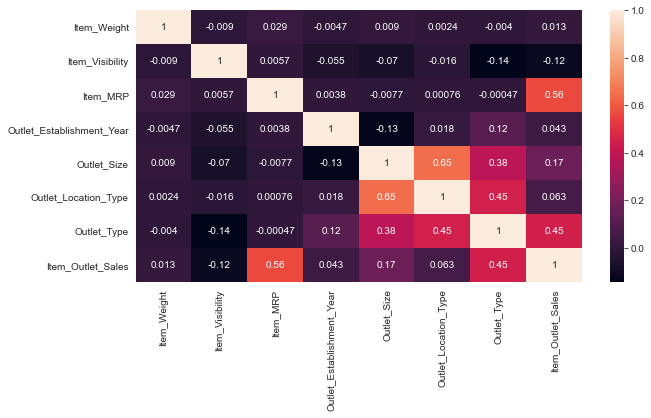

In [70]:
plt.figure(figsize=[10,5])
sns.heatmap(df_try.corr(method='spearman'),annot=True)

In [71]:
df_try.corr(method='spearman')['Outlet_Size']

Item_Weight                  0.008982
Item_Visibility             -0.069873
Item_MRP                    -0.007656
Outlet_Establishment_Year   -0.134483
Outlet_Size                  1.000000
Outlet_Location_Type         0.649613
Outlet_Type                  0.384405
Item_Outlet_Sales            0.169365
Name: Outlet_Size, dtype: float64

Dapat dilihat dari grafik heatmap maupun nilai korelasi, **2 feature yang paling berkorelasi dengan Outlet_Size adalah Outlet_Location_Type dan Outlet_Type**. Maka saya akan mengisi data Outlet_Size berdasarkan Outlet_Location_Type dan Outlet_Type.

Tier 1

In [72]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 1')& (dfBaru1_Hasil['Outlet_Size'].isna())]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Tier 2

In [73]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 2')& (dfBaru1_Hasil['Outlet_Size'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8              FDH17        16.20          Regular         0.016687   
9              FDU28        19.20          Regular         0.094450   
25             NCD06        13.00          Low Fat         0.099887   
33             FDO23        17.85          Low Fat         0.000000   
46             NCP05        19.60          Low Fat         0.000000   
...              ...          ...              ...              ...   
8501           FDW21         5.34          Regular         0.005998   
8502           NCH43         8.42          Low Fat         0.070712   
8508           FDW31        11.35          Regular         0.043246   
8514           FDA01        15.00          Regular         0.054489   
8519           FDS36         8.38          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
33                   Breads   93.1436            OUT045   
46       Health and Hygiene  153.3024            OUT045   
...                     ...       ...               ...   
8501            Snack Foods  100.4358            OUT017   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8                          2002         NaN               Tier 2   
9                          2007         NaN               Tier 2   
25                         2007         NaN               Tier 2   
33                         2002         NaN               Tier 2   
46                         2002         NaN               Tier 2   
...                         ...         ...                  ...   
8501                       2007         NaN               Tier 2   
8502                       2002         NaN               Tier 2   
8508                       2002         NaN               Tier 2   
8514                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
33    Supermarket Type1          2174.5028  
46    Supermarket Type1          2428.8384  
...                 ...                ...  
8501  Supermarket Type1          1508.0370  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[1855 rows x 12 columns]

Tier 3

In [74]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3')& (dfBaru1_Hasil['Outlet_Size'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
28             FDE51        5.925          Regular         0.161467   
30             FDV38       19.250          Low Fat         0.170349   
45             FDM39        6.420               LF         0.089499   
65             FDC46       17.700               LF         0.195068   
...              ...          ...              ...              ...   
8400           NCE07        8.180          Low Fat         0.021977   
8432           FDI16       14.000          Regular         0.227261   
8473           DRI47       14.700          Low Fat         0.035016   
8486           FDR20       20.000          Regular         0.000000   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
28                    Dairy   45.5086            OUT010   
30                    Dairy   55.7956            OUT010   
45                    Dairy  178.1002            OUT010   
65              Snack Foods  185.4266            OUT010   
...                     ...       ...               ...   
8400              Household  140.6154            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8473            Hard Drinks  144.3128            OUT010   
8486  Fruits and Vegetables   46.4744            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
28                         1998         NaN               Tier 3   
30                         1998         NaN               Tier 3   
45                         1998         NaN               Tier 3   
65                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8400                       1998         NaN               Tier 3   
8432                       1998         NaN               Tier 3   
8473                       1998         NaN               Tier 3   
8486                       1998         NaN               Tier 3   
8509                       1998         NaN               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
3     Grocery Store           732.3800  
28    Grocery Store           178.4344  
30    Grocery Store           163.7868  
45    Grocery Store           358.2004  
65    Grocery Store           184.4266  
...             ...                ...  
8400  Grocery Store           425.4462  
8432  Grocery Store           159.7920  
8473  Grocery Store           431.4384  
8486  Grocery Store            45.2744  
8509  Grocery Store           424.7804  

[555 rows x 12 columns]

----------------------------------------

Hanya Tier 2 dan Tier 3 yang memiliki missing value.

Melihat distribusi data Outlet_Size

In [75]:
df_try[df_try['Outlet_Location_Type']==1]['Outlet_Type'].unique()

array([1], dtype=int64)

In [76]:
df_try[df_try['Outlet_Location_Type']==1]['Outlet_Size'].unique()

array([nan,  0.])

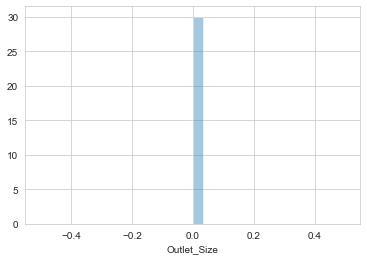

In [77]:
sns.distplot(df_try[df_try['Outlet_Location_Type']==1]['Outlet_Size'])

>Pada Tier 2, hanya ada 1 jenis Outlet_Size, yaitu 0 atau Small.

Maka, untuk missing value pada data Outlet_Size di Tier 2 akan saya isi dengan nilai **Small**.

In [78]:
indexSize_1 =dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 2')& (dfBaru1_Hasil['Outlet_Size'].isna())].index

In [79]:
dfSizeTier2 = dfBaru1_Hasil.loc[indexSize_1].fillna('Small')
dfSizeTier2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8              FDH17        16.20          Regular         0.016687   
9              FDU28        19.20          Regular         0.094450   
25             NCD06        13.00          Low Fat         0.099887   
33             FDO23        17.85          Low Fat         0.000000   
46             NCP05        19.60          Low Fat         0.000000   
...              ...          ...              ...              ...   
8501           FDW21         5.34          Regular         0.005998   
8502           NCH43         8.42          Low Fat         0.070712   
8508           FDW31        11.35          Regular         0.043246   
8514           FDA01        15.00          Regular         0.054489   
8519           FDS36         8.38          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
8              Frozen Foods   96.9726            OUT045   
9              Frozen Foods  187.8214            OUT017   
25                Household   45.9060            OUT017   
33                   Breads   93.1436            OUT045   
46       Health and Hygiene  153.3024            OUT045   
...                     ...       ...               ...   
8501            Snack Foods  100.4358            OUT017   
8502              Household  216.4192            OUT045   
8508  Fruits and Vegetables  199.4742            OUT045   
8514                 Canned   57.5904            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8                          2002       Small               Tier 2   
9                          2007       Small               Tier 2   
25                         2007       Small               Tier 2   
33                         2002       Small               Tier 2   
46                         2002       Small               Tier 2   
...                         ...         ...                  ...   
8501                       2007       Small               Tier 2   
8502                       2002       Small               Tier 2   
8508                       2002       Small               Tier 2   
8514                       2002       Small               Tier 2   
8519                       2002       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
8     Supermarket Type1          1076.5986  
9     Supermarket Type1          4710.5350  
25    Supermarket Type1           838.9080  
33    Supermarket Type1          2174.5028  
46    Supermarket Type1          2428.8384  
...                 ...                ...  
8501  Supermarket Type1          1508.0370  
8502  Supermarket Type1          3020.0688  
8508  Supermarket Type1          2587.9646  
8514  Supermarket Type1           468.7232  
8519  Supermarket Type1           549.2850  

[1855 rows x 12 columns]

------------------------------------

In [80]:
df_try[df_try['Outlet_Location_Type']==2]['Outlet_Type'].unique()

array([2, 0, 1, 3], dtype=int64)

In [81]:
df_try[df_try['Outlet_Location_Type']==2]['Outlet_Size'].unique()

array([ 1., nan,  2.])

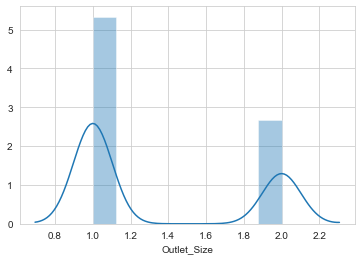

In [82]:
sns.distplot(df_try[df_try['Outlet_Location_Type']==2]['Outlet_Size'])

>Pada Tier 3, hanya ada 2 jenis Outlet_Size, yaitu 1 atau Medium dan 2 atau High.

In [83]:
df_try[df_try['Outlet_Location_Type']==2]['Outlet_Size'].median()

1.0

Kemudian, untuk menentukan jenis dari kedua size tersebut, saya akan melihat pengaruh Outlet_Type terhadap Outlet_Size.

Grocery Store

In [84]:
len(df_try[(df_try['Outlet_Location_Type']==2) & (df_try['Outlet_Type']==0)]['Outlet_Size'])

555

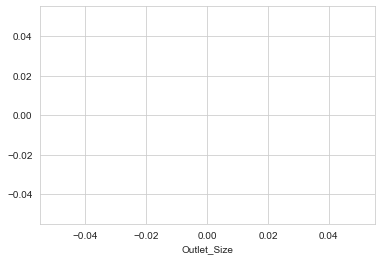

In [85]:
sns.distplot(df_try[(df_try['Outlet_Location_Type']==2) & (df_try['Outlet_Type']==0)]['Outlet_Size'])

In [86]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3')& (dfBaru1_Hasil['Outlet_Size'].isna())& (dfBaru1_Hasil['Outlet_Type']=='Grocery Store')]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
28             FDE51        5.925          Regular         0.161467   
30             FDV38       19.250          Low Fat         0.170349   
45             FDM39        6.420               LF         0.089499   
65             FDC46       17.700               LF         0.195068   
...              ...          ...              ...              ...   
8400           NCE07        8.180          Low Fat         0.021977   
8432           FDI16       14.000          Regular         0.227261   
8473           DRI47       14.700          Low Fat         0.035016   
8486           FDR20       20.000          Regular         0.000000   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
28                    Dairy   45.5086            OUT010   
30                    Dairy   55.7956            OUT010   
45                    Dairy  178.1002            OUT010   
65              Snack Foods  185.4266            OUT010   
...                     ...       ...               ...   
8400              Household  140.6154            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8473            Hard Drinks  144.3128            OUT010   
8486  Fruits and Vegetables   46.4744            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
28                         1998         NaN               Tier 3   
30                         1998         NaN               Tier 3   
45                         1998         NaN               Tier 3   
65                         1998         NaN               Tier 3   
...                         ...         ...                  ...   
8400                       1998         NaN               Tier 3   
8432                       1998         NaN               Tier 3   
8473                       1998         NaN               Tier 3   
8486                       1998         NaN               Tier 3   
8509                       1998         NaN               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
3     Grocery Store           732.3800  
28    Grocery Store           178.4344  
30    Grocery Store           163.7868  
45    Grocery Store           358.2004  
65    Grocery Store           184.4266  
...             ...                ...  
8400  Grocery Store           425.4462  
8432  Grocery Store           159.7920  
8473  Grocery Store           431.4384  
8486  Grocery Store            45.2744  
8509  Grocery Store           424.7804  

[555 rows x 12 columns]

Dapat dilihat, bahwa semua Outlet_Size pada Tier 3 dengan Type Grocery Store bernilai NaN Value. Saya memutuskan untuk mengisi dengan median data pada Tier 3, yaitu 'Medium'

In [87]:
indexSize_2 = dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3') & (dfBaru1_Hasil['Outlet_Size'].isna()) & (dfBaru1_Hasil['Outlet_Type']=='Grocery Store')].index

In [88]:
dfSizeTier3_Grocery = dfBaru1_Hasil.loc[indexSize_2].fillna('Medium')
dfSizeTier3_Grocery

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
28             FDE51        5.925          Regular         0.161467   
30             FDV38       19.250          Low Fat         0.170349   
45             FDM39        6.420               LF         0.089499   
65             FDC46       17.700               LF         0.195068   
...              ...          ...              ...              ...   
8400           NCE07        8.180          Low Fat         0.021977   
8432           FDI16       14.000          Regular         0.227261   
8473           DRI47       14.700          Low Fat         0.035016   
8486           FDR20       20.000          Regular         0.000000   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
28                    Dairy   45.5086            OUT010   
30                    Dairy   55.7956            OUT010   
45                    Dairy  178.1002            OUT010   
65              Snack Foods  185.4266            OUT010   
...                     ...       ...               ...   
8400              Household  140.6154            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8473            Hard Drinks  144.3128            OUT010   
8486  Fruits and Vegetables   46.4744            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998      Medium               Tier 3   
28                         1998      Medium               Tier 3   
30                         1998      Medium               Tier 3   
45                         1998      Medium               Tier 3   
65                         1998      Medium               Tier 3   
...                         ...         ...                  ...   
8400                       1998      Medium               Tier 3   
8432                       1998      Medium               Tier 3   
8473                       1998      Medium               Tier 3   
8486                       1998      Medium               Tier 3   
8509                       1998      Medium               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
3     Grocery Store           732.3800  
28    Grocery Store           178.4344  
30    Grocery Store           163.7868  
45    Grocery Store           358.2004  
65    Grocery Store           184.4266  
...             ...                ...  
8400  Grocery Store           425.4462  
8432  Grocery Store           159.7920  
8473  Grocery Store           431.4384  
8486  Grocery Store            45.2744  
8509  Grocery Store           424.7804  

[555 rows x 12 columns]

Supermarket Type 1

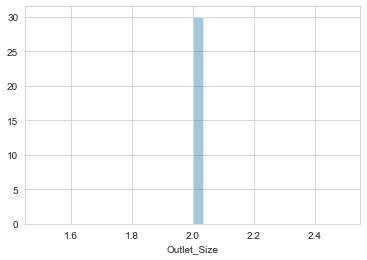

In [89]:
sns.distplot(df_try[(df_try['Outlet_Location_Type']==2) & (df_try['Outlet_Type']==1)]['Outlet_Size'])

Maka, *Outlet_Size* pada Outlet_Location_Type: 'Tier 3' dengan Outlet_Type: 'Supermarket Type 1' memiliki Outlet_Size: 2 atau **'High'**

In [90]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3')& (dfBaru1_Hasil['Outlet_Size'].isna())& (dfBaru1_Hasil['Outlet_Type']=='Supermarket Type 1')]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Supermarket Type 2

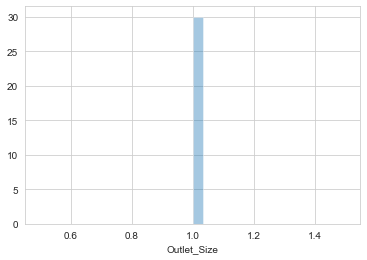

In [91]:
sns.distplot(df_try[(df_try['Outlet_Location_Type']==2) & (df_try['Outlet_Type']==2)]['Outlet_Size'])

Maka, *Outlet_Size* pada Outlet_Location_Type: 'Tier 3' dengan Outlet_Type: 'Supermarket Type 2' memiliki Outlet_Size: 1 atau **'Medium'**

In [92]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3')& (dfBaru1_Hasil['Outlet_Size'].isna())& (dfBaru1_Hasil['Outlet_Type']=='Supermarket Type 2')]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Supermarket Type 3

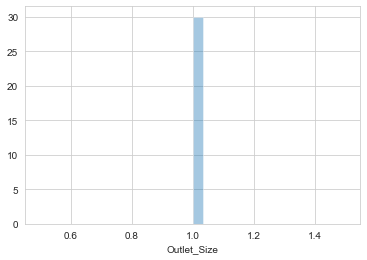

In [93]:
sns.distplot(df_try[(df_try['Outlet_Location_Type']==2) & (df_try['Outlet_Type']==3)]['Outlet_Size'])

Maka, *Outlet_Size* pada Outlet_Location_Type: 'Tier 3' dengan Outlet_Type: 'Supermarket Type 3' memiliki Outlet_Size: 1 atau **'Medium'**

In [94]:
dfBaru1_Hasil[(dfBaru1_Hasil['Outlet_Location_Type']=='Tier 3')& (dfBaru1_Hasil['Outlet_Size'].isna())& (dfBaru1_Hasil['Outlet_Type']=='Supermarket Type 3')]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []

Maka,

In [95]:
dfBaru2 = dfBaru1_Hasil.copy()

In [96]:
list_drop_nan_size = list(indexSize_1)+list(indexSize_2)
len(list_drop_nan_size)

2410

In [97]:
dfBaru2.drop(index=list_drop_nan_size, inplace=True)

In [98]:
dfBaru2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8337           NCV06       13.150          Low Fat         0.116750   
8351           NCE43       13.150               LF         0.102941   
8383           NCQ54       13.150          Low Fat         0.012482   
8454           NCH54       13.150          Low Fat         0.127234   
8504           NCN18       13.150          Low Fat         0.124111   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0            Dairy  249.8092            OUT049                       1999   
1      Soft Drinks   48.2692            OUT018                       2009   
2             Meat  141.6180            OUT049                       1999   
4        Household   53.8614            OUT013                       1987   
5     Baking Goods   51.4008            OUT018                       2009   
...            ...       ...               ...                        ...   
8337     Household  195.2478            OUT019                       1985   
8351     Household  171.2448            OUT027                       1985   
8383     Household  168.3474            OUT027                       1985   
8454     Household  158.3920            OUT019                       1985   
8504     Household  111.7544            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0         Medium               Tier 1  Supermarket Type1          3735.1380  
1         Medium               Tier 3  Supermarket Type2           443.4228  
2         Medium               Tier 1  Supermarket Type1          2097.2700  
4           High               Tier 3  Supermarket Type1           994.7052  
5         Medium               Tier 3  Supermarket Type2           556.6088  
...          ...                  ...                ...                ...  
8337       Small               Tier 1      Grocery Store           193.7478  
8351      Medium               Tier 3  Supermarket Type3          4602.0096  
8383      Medium               Tier 3  Supermarket Type3          5221.8694  
8454       Small               Tier 1      Grocery Store           159.7920  
8504      Medium               Tier 3  Supermarket Type3          4138.6128  

[6113 rows x 12 columns]

In [99]:
dfFinal = pd.concat([dfBaru2,dfSizeTier2,dfSizeTier3_Grocery])
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8400           NCE07        8.180          Low Fat         0.021977   
8432           FDI16       14.000          Regular         0.227261   
8473           DRI47       14.700          Low Fat         0.035016   
8486           FDR20       20.000          Regular         0.000000   
8509           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
4                 Household   53.8614            OUT013   
5              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8400              Household  140.6154            OUT010   
8432           Frozen Foods   54.3640            OUT010   
8473            Hard Drinks  144.3128            OUT010   
8486  Fruits and Vegetables   46.4744            OUT010   
8509  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
4                          1987        High               Tier 3   
5                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8400                       1998      Medium               Tier 3   
8432                       1998      Medium               Tier 3   
8473                       1998      Medium               Tier 3   
8486                       1998      Medium               Tier 3   
8509                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
4     Supermarket Type1           994.7052  
5     Supermarket Type2           556.6088  
...                 ...                ...  
8400      Grocery Store           425.4462  
8432      Grocery Store           159.7920  
8473      Grocery Store           431.4384  
8486      Grocery Store            45.2744  
8509      Grocery Store           424.7804  

[8523 rows x 12 columns]

In [100]:
dfFinal.reset_index(drop=True,inplace=True)

In [101]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3     Supermarket Type1           994.7052  
4     Supermarket Type2           556.6088  
...                 ...                ...  
8518      Grocery Store           425.4462  
8519      Grocery Store           159.7920  
8520      Grocery Store           431.4384  
8521      Grocery Store            45.2744  
8522      Grocery Store           424.7804  

[8523 rows x 12 columns]

In [102]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Terlihat, sudah tidak terdapat missing value dari data.

In [103]:
dfFinal.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.813413         0.066132   140.992782                1997.831867   
std       4.241379         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.850000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

----------------------------------------------------

- Resolve Outlier Data

In [104]:
dfFinal.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.813413         0.066132   140.992782                1997.831867   
std       4.241379         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.850000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

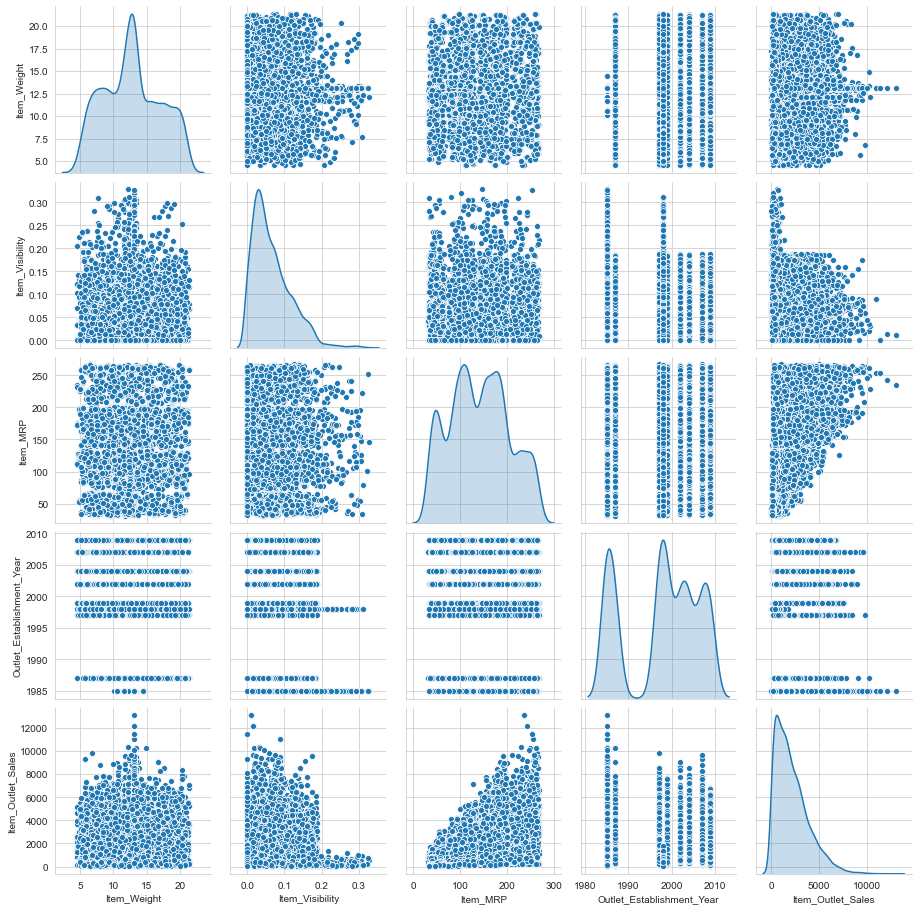

In [105]:
sns.pairplot(dfFinal, diag_kind='kde')

Melihat dari deskripsi masing-masing feature, nilai maksimum dan minimum dari data, dan grafik distribusi dari masing-masing data numerikal, **saya melihat dan menilai data tersebut tidak memiliki outlier data.**

--------------------------------------------------------------

- Resolve Inkonsistensi Data

In [106]:
dfFinal.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           NCD19        8.930          Low Fat         0.000000   
4           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
3     Household   53.8614            OUT013                       1987   
4  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  
3        High               Tier 3  Supermarket Type1           994.7052  
4      Medium               Tier 3  Supermarket Type2           556.6088

In [107]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [108]:
dfFinal['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Pada feature Item_Fat_Content, terdapat inkonsistensi data.

In [109]:
dfFinal['Item_Fat_Content'] = dfFinal['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [110]:
dfFinal['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [111]:
count=[]
unique=[]
top=[]
freq=[]
index = list(df.columns)
for item in index:
    count.append(len(dfFinal[item]))
    unique.append(len(dfFinal[item].unique()))
    top.append(dfFinal[item].max())
    freq.append(dfFinal[item].value_counts().max())

### Tabel Output
tabel_info=pd.DataFrame([count,unique,top,freq], index=['count','unique','top','freq'], columns=index).T
tabel_info

count unique                top  freq
Item_Identifier            8523   1559              NCZ54    10
Item_Weight                8523    417              21.35   412
Item_Fat_Content           8523      2            Regular  5517
Item_Visibility            8523   7880           0.328391   526
Item_Type                  8523     16      Starchy Foods  1232
Item_MRP                   8523   5938            266.888     7
Outlet_Identifier          8523     10             OUT049   935
Outlet_Establishment_Year  8523      9               2009  1463
Outlet_Size                8523      3              Small  4243
Outlet_Location_Type       8523      3             Tier 3  3350
Outlet_Type                8523      4  Supermarket Type3  5577
Item_Outlet_Sales          8523   3493              13087    17

In [112]:
kolom = dfFinal.columns
dataFeatures = []
dataType = []
null = []
nullPct = []
unique = []
uniqueSample = []
for item in kolom:
    dataFeatures.append(item)
    dataType.append(dfFinal[item].dtype)
    null.append(dfFinal[item].isna().sum())
    if  round(dfFinal[item].isna().sum()/len(dfFinal),2) == 0:
        nullPct.append('0.00')
    else:
        nullPct.append(round(dfFinal[item].isna().sum()/len(dfFinal),2))
    unique.append(len(dfFinal[item].dropna().unique()))
    uniqueSample.append(list(dfFinal[item].sample(2)))
    
pd.DataFrame([dataFeatures,dataType,null,nullPct,unique,uniqueSample],index=['dataFeatures','dataType','null','nullPct','unique','uniqueSample']).T

dataFeatures dataType null nullPct unique  \
0             Item_Identifier   object    0    0.00   1559   
1                 Item_Weight  float64    0    0.00    417   
2            Item_Fat_Content   object    0    0.00      2   
3             Item_Visibility  float64    0    0.00   7880   
4                   Item_Type   object    0    0.00     16   
5                    Item_MRP  float64    0    0.00   5938   
6           Outlet_Identifier   object    0    0.00     10   
7   Outlet_Establishment_Year    int64    0    0.00      9   
8                 Outlet_Size   object    0    0.00      3   
9        Outlet_Location_Type   object    0    0.00      3   
10                Outlet_Type   object    0    0.00      4   
11          Item_Outlet_Sales  float64    0    0.00   3493   

                              uniqueSample  
0                           [FDH19, NCX05]  
1                            [17.5, 13.15]  
2                       [Low Fat, Regular]  
3               [0.081492092, 0.052502049]  
4       [Fruits and Vegetables, Household]  
5                      [187.7556, 49.2008]  
6                         [OUT045, OUT027]  
7                             [2004, 2009]  
8                         [Medium, Medium]  
9                         [Tier 2, Tier 3]  
10  [Supermarket Type1, Supermarket Type1]  
11                  [1789.6704, 2841.6344]

-----------------------------------------------------

## Exploration Data Analyst (EDA)

In [113]:
dfFinal.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           NCD19        8.930          Low Fat         0.000000   
4           FDP36       10.395          Regular         0.000000   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy  249.8092            OUT049                       1999   
1   Soft Drinks   48.2692            OUT018                       2009   
2          Meat  141.6180            OUT049                       1999   
3     Household   53.8614            OUT013                       1987   
4  Baking Goods   51.4008            OUT018                       2009   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  
3        High               Tier 3  Supermarket Type1           994.7052  
4      Medium               Tier 3  Supermarket Type2           556.6088

In [114]:
dfFinal.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           NCE07         8.18          Low Fat         0.021977   
8519           FDI16        14.00          Regular         0.227261   
8520           DRI47        14.70          Low Fat         0.035016   
8521           FDR20        20.00          Regular         0.000000   
8522           FDG45         8.10          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

        Outlet_Type  Item_Outlet_Sales  
8518  Grocery Store           425.4462  
8519  Grocery Store           159.7920  
8520  Grocery Store           431.4384  
8521  Grocery Store            45.2744  
8522  Grocery Store           424.7804

In [115]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [116]:
dfFinal.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.813413         0.066132   140.992782                1997.831867   
std       4.241379         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.850000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [117]:
dfFinal.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [118]:
tabel_info

count unique                top  freq
Item_Identifier            8523   1559              NCZ54    10
Item_Weight                8523    417              21.35   412
Item_Fat_Content           8523      2            Regular  5517
Item_Visibility            8523   7880           0.328391   526
Item_Type                  8523     16      Starchy Foods  1232
Item_MRP                   8523   5938            266.888     7
Outlet_Identifier          8523     10             OUT049   935
Outlet_Establishment_Year  8523      9               2009  1463
Outlet_Size                8523      3              Small  4243
Outlet_Location_Type       8523      3             Tier 3  3350
Outlet_Type                8523      4  Supermarket Type3  5577
Item_Outlet_Sales          8523   3493              13087    17

####  Item_Identifier

**Meninjau produk yang paling umum ditemukan pada gerai/outlet BigMart**

In [119]:
pd.DataFrame(dfFinal['Item_Identifier'].value_counts().sort_values(ascending=False))

Item_Identifier
FDW13               10
FDG33               10
FDF56                9
FDV38                9
NCL31                9
...                ...
FDQ60                1
FDN52                1
FDT35                1
FDO33                1
FDC23                1

[1559 rows x 1 columns]

Dari 1559 produk, produk dengan kode **FDW13** dan **FDG33** adalah 2 produk yang paling umum dijual pada gerai/outlet BigMart. Dimana, ada 10 gerai yang menjual produk **FDW13** dan **FDG33**.

In [120]:
dfFinal[dfFinal['Item_Identifier']=='FDW13']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
600            FDW13         8.50          Low Fat         0.097866    Canned   
1179           FDW13         8.50          Low Fat         0.098283    Canned   
2185           FDW13         8.50          Low Fat         0.098037    Canned   
3850           FDW13         8.50          Low Fat         0.097803    Canned   
4381           FDW13         8.50          Low Fat         0.097885    Canned   
4845           FDW13        12.15          Low Fat         0.097411    Canned   
4895           FDW13        12.15          Low Fat         0.171384    Canned   
6170           FDW13         8.50          Low Fat         0.098438    Canned   
7537           FDW13         8.50          Low Fat         0.098083    Canned   
8400           FDW13         8.50          Low Fat         0.163839    Canned   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
600    51.1324            OUT035                       2004       Small   
1179   51.3324            OUT018                       2009      Medium   
2185   51.5324            OUT049                       1999      Medium   
3850   50.5324            OUT013                       1987        High   
4381   52.5324            OUT046                       1997       Small   
4845   52.7324            OUT027                       1985      Medium   
4895   50.5324            OUT019                       1985       Small   
6170   51.1324            OUT017                       2007       Small   
7537   50.3324            OUT045                       2002       Small   
8400   51.3324            OUT010                       1998      Medium   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
600                Tier 2  Supermarket Type1          1350.2424  
1179               Tier 3  Supermarket Type2           934.7832  
2185               Tier 1  Supermarket Type1           882.8508  
3850               Tier 3  Supermarket Type1           882.8508  
4381               Tier 1  Supermarket Type1          1194.4452  
4845               Tier 3  Supermarket Type3          2492.7552  
4895               Tier 1      Grocery Store           207.7296  
6170               Tier 2  Supermarket Type1           259.6620  
7537               Tier 2  Supermarket Type1           675.1212  
8400               Tier 3      Grocery Store           311.5944

In [121]:
dfFinal[dfFinal['Item_Identifier']=='FDG33']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
2599           FDG33        5.365          Regular         0.140458   Seafood   
2837           FDG33        5.365          Regular         0.140240   Seafood   
3838           FDG33        5.365          Regular         0.140812   Seafood   
3882           FDG33        5.365          Regular         0.140124   Seafood   
4222           FDG33        5.365          Regular         0.140214   Seafood   
5477           FDG33       11.650          Regular         0.139561   Seafood   
5480           FDG33       11.650          Regular         0.245543   Seafood   
6377           FDG33        5.365          Regular         0.140525   Seafood   
7451           FDG33        5.365          Regular         0.141034   Seafood   
8140           FDG33        5.365          Regular         0.234733   Seafood   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
2599  169.7764            OUT049                       1999      Medium   
2837  171.0764            OUT046                       1997       Small   
3838  173.5764            OUT018                       2009      Medium   
3882  172.0764            OUT013                       1987        High   
4222  173.7764            OUT035                       2004       Small   
5477  170.4764            OUT027                       1985      Medium   
5480  172.2764            OUT019                       1985       Small   
6377  172.7764            OUT045                       2002       Small   
7451  173.6764            OUT017                       2007       Small   
8140  173.4764            OUT010                       1998      Medium   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
2599               Tier 1  Supermarket Type1          3263.7516  
2837               Tier 1  Supermarket Type1          3263.7516  
3838               Tier 3  Supermarket Type2          2061.3168  
3882               Tier 3  Supermarket Type1          2748.4224  
4222               Tier 2  Supermarket Type1          4637.9628  
5477               Tier 3  Supermarket Type3          3435.5280  
5480               Tier 1      Grocery Store           171.7764  
6377               Tier 2  Supermarket Type1          2233.0932  
7451               Tier 2  Supermarket Type1           858.8820  
8140               Tier 3      Grocery Store           171.7764

---------------------------------------------

**Meninjau produk paling banyak terjual secara keseluruhan di gerai/outlet BigMart**

In [122]:
item = dfFinal.groupby(['Item_Identifier']).sum()
item.sort_values(by=['Item_Outlet_Sales'],ascending=False)

Item_Weight  Item_Visibility   Item_MRP  \
Item_Identifier                                            
FDY55                126.700         0.407141  2058.1904   
FDA15                 78.450         0.139094  1995.9736   
FDZ20                125.800         0.263547  2032.8848   
FDF05                135.350         0.215167  2103.1280   
FDA04                 91.950         0.534337  2072.0696   
...                      ...              ...        ...   
FDQ04                 25.650         0.375138   121.9388   
FDF38                 23.600         0.052694    80.2276   
FDY43                 14.850         0.098803   169.7474   
NCR42                 27.315         0.141670   101.0700   
FDQ60                 11.650         0.191501   121.2098   

                 Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Identifier                                                
FDY55                                15968         42661.8008  
FDA15                                15991         41584.5364  
FDZ20                                15979         40185.0248  
FDF05                                15990         36555.7490  
FDA04                                15990         35741.4756  
...                                    ...                ...  
FDQ04                                 5982           784.3124  
FDF38                                 3984           771.6622  
FDY43                                 2009           673.7896  
NCR42                                 6007           332.9000  
FDQ60                                 1985           120.5098  

[1559 rows x 5 columns]

Dari 1559 produk, 2 produk paling banyak terjual adalah **FDY55** dan **FDA15**

Kemudian, 2 produk dengan penjualan paling sedikit adalah **FDQ60** dan **NCR42**

In [123]:
dfFinal[dfFinal['Item_Identifier']=='FDY55']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
143            FDY55        16.75          Low Fat         0.081253   
664            FDY55        16.75          Low Fat         0.081651   
963            FDY55        16.75          Low Fat         0.081305   
3721           FDY55        16.75          Low Fat         0.000000   
3840           FDY55        16.75          Low Fat         0.081447   
5852           FDY55        13.10          Low Fat         0.000000   
5913           FDY55        13.10          Low Fat         0.000000   
7859           FDY55        16.75          Low Fat         0.081485   

                  Item_Type  Item_MRP Outlet_Identifier  \
143   Fruits and Vegetables  256.4988            OUT013   
664   Fruits and Vegetables  258.3988            OUT018   
963   Fruits and Vegetables  258.4988            OUT035   
3721  Fruits and Vegetables  255.3988            OUT046   
3840  Fruits and Vegetables  257.0988            OUT049   
5852  Fruits and Vegetables  255.7988            OUT027   
5913  Fruits and Vegetables  258.3988            OUT019   
7859  Fruits and Vegetables  258.0988            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
143                        1987        High               Tier 3   
664                        2009      Medium               Tier 3   
963                        2004       Small               Tier 2   
3721                       1997       Small               Tier 1   
3840                       1999      Medium               Tier 1   
5852                       1985      Medium               Tier 3   
5913                       1985       Small               Tier 1   
7859                       2002       Small               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
143   Supermarket Type1          7452.9652  
664   Supermarket Type2          1541.9928  
963   Supermarket Type1          4111.9808  
3721  Supermarket Type1          4625.9784  
3840  Supermarket Type1          6424.9700  
5852  Supermarket Type3          9251.9568  
5913      Grocery Store           256.9988  
7859  Supermarket Type1          8994.9580

Dapat dilihat, bahwa produk FDY55 dengan penjualan terbanyak tergolong dalam kategori Buah dan Sayuran (*Fruits and Vegetables*).

In [124]:
dfFinal[dfFinal['Item_Identifier']=='FDY33']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1300           FDY33        14.50          Regular         0.097201   
2947           FDY33        14.50          Regular         0.097352   
3805           FDY33        14.50          Regular         0.000000   
5576           FDY33        13.15          Regular         0.096730   
5656           FDY33        13.15          Regular         0.170187   
6881           FDY33        14.50          Regular         0.097398   
6903           FDY33        14.50          Regular         0.097751   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
1300  Snack Foods  159.4262            OUT046                       1997   
2947  Snack Foods  160.7262            OUT049                       1999   
3805  Snack Foods  159.3262            OUT035                       2004   
5576  Snack Foods  159.0262            OUT027                       1985   
5656  Snack Foods  159.0262            OUT019                       1985   
6881  Snack Foods  157.4262            OUT045                       2002   
6903  Snack Foods  159.7262            OUT017                       2007   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
1300       Small               Tier 1  Supermarket Type1          2705.1454  
2947      Medium               Tier 1  Supermarket Type1          1750.3882  
3805       Small               Tier 2  Supermarket Type1          2864.2716  
5576      Medium               Tier 3  Supermarket Type3          5887.6694  
5656       Small               Tier 1      Grocery Store           159.1262  
6881       Small               Tier 2  Supermarket Type1          3978.1550  
6903       Small               Tier 2  Supermarket Type1          5728.5432

Dapat dilihat, bahwa produk FDY33 dengan penjualan terbanyak kedua tergolong dalam kategori *Snack Foods*.

In [125]:
dfFinal[dfFinal['Item_Identifier']=='FDQ60']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4744           FDQ60        11.65          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4744  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  
4744       Small               Tier 1  Grocery Store           120.5098

Produk FDQ60 sebagai produk dengan penjualan paling sedikit tergolong dalam kategori *Baking Goods*.

In [126]:
dfFinal[dfFinal['Item_Identifier']=='NCR42']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
6857           NCR42        9.105          Low Fat         0.038700   
6912           NCR42        9.105          Low Fat         0.038560   
8425           NCR42        9.105          Low Fat         0.064411   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
6857  Household     33.79            OUT017                       2007   
6912  Household     33.89            OUT045                       2002   
8425  Household     33.39            OUT010                       1998   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
6857       Small               Tier 2  Supermarket Type1             199.74  
6912       Small               Tier 2  Supermarket Type1              99.87  
8425      Medium               Tier 3      Grocery Store              33.29

Produk NCR42 sebagai produk kedua dengan penjualan paling sedikit tergolong dalam kategori *Household*

----------------------------------------

**Meninjau penjualan individual produk per gerai/outlet BigMart**

In [127]:
item2 = dfFinal.groupby(['Item_Identifier','Outlet_Identifier']).sum()
item2.sort_values(by=['Item_Outlet_Sales'],ascending=False)

Item_Weight  Item_Visibility  Item_MRP  \
Item_Identifier Outlet_Identifier                                           
NCE42           OUT027                  13.150         0.010551  234.9958   
FDQ19           OUT027                  13.100         0.014296  242.6512   
FDZ20           OUT027                  13.100         0.000000  253.0356   
FDP33           OUT027                  13.150         0.088840  254.2672   
FDI50           OUT027                  12.150         0.030693  228.0352   
...                                        ...              ...       ...   
FDQ47           OUT010                   7.155         0.281510   33.8874   
NCL41           OUT019                  12.150         0.073077   34.3216   
FDU21           OUT019                  13.150         0.134328   35.0558   
DRK12           OUT010                   9.500         0.000000   32.8900   
NCR42           OUT010                   9.105         0.064411   33.3900   

                                   Outlet_Establishment_Year  \
Item_Identifier Outlet_Identifier                              
NCE42           OUT027                                  1985   
FDQ19           OUT027                                  1985   
FDZ20           OUT027                                  1985   
FDP33           OUT027                                  1985   
FDI50           OUT027                                  1985   
...                                                      ...   
FDQ47           OUT010                                  1998   
NCL41           OUT019                                  1985   
FDU21           OUT019                                  1985   
DRK12           OUT010                                  1998   
NCR42           OUT010                                  1998   

                                   Item_Outlet_Sales  
Item_Identifier Outlet_Identifier                     
NCE42           OUT027                    13086.9648  
FDQ19           OUT027                    12117.5600  
FDZ20           OUT027                    11445.1020  
FDP33           OUT027                    10993.6896  
FDI50           OUT027                    10306.5840  
...                                              ...  
FDQ47           OUT010                       35.2874  
NCL41           OUT019                       34.6216  
FDU21           OUT019                       33.9558  
DRK12           OUT010                       33.2900  
NCR42           OUT010                       33.2900  

[8523 rows x 5 columns]

In [128]:
dfFinal[dfFinal['Item_Identifier']=='NCE42']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
2426           NCE42        21.10          Low Fat         0.010593   
3126           NCE42        21.10          Low Fat         0.000000   
4464           NCE42        21.10          Low Fat         0.010600   
4539           NCE42        21.10          Low Fat         0.010602   
6086           NCE42        13.15          Low Fat         0.010551   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
2426  Household  234.2958            OUT013                       1987   
3126  Household  233.2958            OUT018                       2009   
4464  Household  233.9958            OUT035                       2004   
4539  Household  235.3958            OUT046                       1997   
6086  Household  234.9958            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
2426        High               Tier 3  Supermarket Type1          3739.1328  
3126      Medium               Tier 3  Supermarket Type2          2103.2622  
4464       Small               Tier 2  Supermarket Type1          1869.5664  
4539       Small               Tier 1  Supermarket Type1          3271.7412  
6086      Medium               Tier 3  Supermarket Type3         13086.9648

Produk NCE42 pada gerai OUT013 merupakan produk paling banyak terjual dibandingkan dengan produk lain pada gerai lainnya.

Apabila dilihat dari data Item_Identifier, ada hal menarik yang bisa dilihat, yaitu kode FD untuk kategori Food, kode NC untuk kategori Non-Consumable, dan kode DR untuk kategori Drink. Saya akan memisahkan dan menambahkan kategori baru berdasarkan kode tersebut.

In [129]:
dfFinal['Item_Type_Combined'] = dfFinal['Item_Identifier'].apply(lambda x: x[0:2])

In [130]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined  
0     Supermarket Type1          3735.1380                 FD  
1     Supermarket Type2           443.4228                 DR  
2     Supermarket Type1          2097.2700                 FD  
3     Supermarket Type1           994.7052                 NC  
4     Supermarket Type2           556.6088                 FD  
...                 ...                ...                ...  
8518      Grocery Store           425.4462                 NC  
8519      Grocery Store           159.7920                 FD  
8520      Grocery Store           431.4384                 DR  
8521      Grocery Store            45.2744                 FD  
8522      Grocery Store           424.7804                 FD  

[8523 rows x 13 columns]

In [131]:
dfFinal['Item_Type_Combined'] = dfFinal['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [132]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined  
0     Supermarket Type1          3735.1380               Food  
1     Supermarket Type2           443.4228             Drinks  
2     Supermarket Type1          2097.2700               Food  
3     Supermarket Type1           994.7052     Non-Consumable  
4     Supermarket Type2           556.6088               Food  
...                 ...                ...                ...  
8518      Grocery Store           425.4462     Non-Consumable  
8519      Grocery Store           159.7920               Food  
8520      Grocery Store           431.4384             Drinks  
8521      Grocery Store            45.2744               Food  
8522      Grocery Store           424.7804               Food  

[8523 rows x 13 columns]

Saya akan mencoba memisahkan Item_Identifier.

In [133]:
dfFinal['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       NCD19
4       FDP36
        ...  
8518    NCE07
8519    FDI16
8520    DRI47
8521    FDR20
8522    FDG45
Name: Item_Identifier, Length: 8523, dtype: object

In [134]:
def create_id_1(cols):
    return cols[0:2]
def create_id_2(cols):
    return cols[2]
def create_id_3(cols):
    return cols[3:5]


In [135]:
dfFinal['Id_Item_First'] = dfFinal['Item_Identifier'].apply(create_id_1)
dfFinal['Id_Item_Second'] = dfFinal['Item_Identifier'].apply(create_id_2)
dfFinal['Id_Item_Third'] = dfFinal['Item_Identifier'].apply(create_id_3)

In [136]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
0     Supermarket Type1          3735.1380               Food            FD   
1     Supermarket Type2           443.4228             Drinks            DR   
2     Supermarket Type1          2097.2700               Food            FD   
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
...                 ...                ...                ...           ...   
8518      Grocery Store           425.4462     Non-Consumable            NC   
8519      Grocery Store           159.7920               Food            FD   
8520      Grocery Store           431.4384             Drinks            DR   
8521      Grocery Store            45.2744               Food            FD   
8522      Grocery Store           424.7804               Food            FD   

     Id_Item_Second Id_Item_Third  
0                 A            15  
1                 C            01  
2                 N            15  
3                 D            19  
4                 P            36  
...             ...           ...  
8518              E            07  
8519              I            16  
8520              I            47  
8521              R            20  
8522              G            45  

[8523 rows x 16 columns]

In [137]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [138]:
dfFinal['Id_Item_First'].value_counts()

FD    6125
NC    1599
DR     799
Name: Id_Item_First, dtype: int64

In [139]:
dfFinal['Id_Item_Second'].value_counts()

X    354
K    345
H    342
O    340
R    338
L    338
S    338
I    338
Y    333
Z    331
D    330
B    328
Q    328
T    328
G    326
J    324
F    324
V    322
E    322
N    321
P    321
A    318
W    316
U    313
C    304
M    301
Name: Id_Item_Second, dtype: int64

In [140]:
dfFinal['Id_Item_Third'].value_counts()

26    157
21    156
29    153
04    153
34    152
24    151
20    150
07    150
05    149
18    148
23    148
13    147
19    147
49    147
45    147
44    147
25    147
15    147
30    147
54    146
32    145
56    145
09    145
12    145
31    145
41    144
08    143
57    143
38    142
03    142
33    141
58    141
53    141
40    141
46    141
01    140
37    140
47    140
10    140
11    139
35    139
39    139
27    139
17    139
36    139
59    138
50    138
06    138
52    138
43    137
16    135
48    135
28    134
60    133
02    132
55    131
42    130
51    128
22    127
14    122
Name: Id_Item_Third, dtype: int64

----------------------------------------------------------------------------

**Item_Fat_Content**

In [141]:
print('Item_Fat_Content')
print('----------------------------------------------')
print(dfFinal['Item_Fat_Content'].value_counts())
print('----------------------------------------------')
print(dfFinal['Item_Fat_Content'].value_counts(normalize=True))

Item_Fat_Content
----------------------------------------------
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
----------------------------------------------
Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64


Dari total keseluruhan produk yang dijual BigMart, total ada **64,7%** produk Low Fat, dan **35,3%** produk Regular

--------------------------------------

**Melihat penjualan dari produk Low Fat dan Regular**

In [142]:
item3=dfFinal.groupby(['Item_Fat_Content']).sum()
item3.sort_values(by='Item_Outlet_Sales', ascending=False)

Item_Weight  Item_Visibility     Item_MRP  \
Item_Fat_Content                                              
Low Fat             71057.800       354.909065  776319.6784   
Regular             38150.915       208.734216  425361.8024   

                  Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Fat_Content                                                
Low Fat                            11021931       1.190409e+07  
Regular                             6005590       6.687031e+06

Produk **Low Fat** lebih banyak terjual dibandingkan produk **Regular**

In [143]:
import plotly.graph_objects as go

labels = ['Low Fat','Regular']
values = [item3.loc['Low Fat']['Item_Outlet_Sales'],item3.loc['Regular']['Item_Outlet_Sales']]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.show()

**Melihat apakah *Item_Fat_Content* memiliki pengaruh signifikan terhadap *Item_Outlet_Sales***

- H0: Tidak ada pengaruh signifikan antara Item_Fat_Content dan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Item_Fat_Content dan Item_Outlet_Sales

Signifikan level: 5%

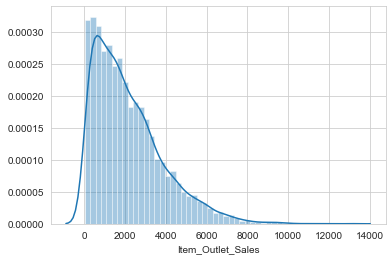

In [144]:
sns.distplot(dfFinal[dfFinal['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'])

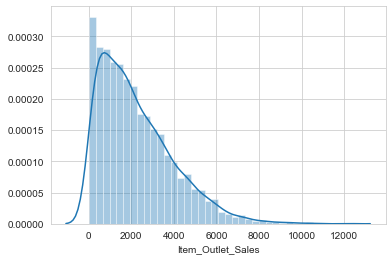

In [145]:
sns.distplot(dfFinal[dfFinal['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'])

Uji dengan grafik QQPlot

Low Fat


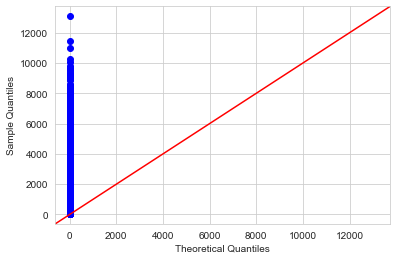

In [146]:
print('Low Fat')
sn.qqplot(dfFinal[dfFinal['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'], line = '45')
plt.show()

Regular


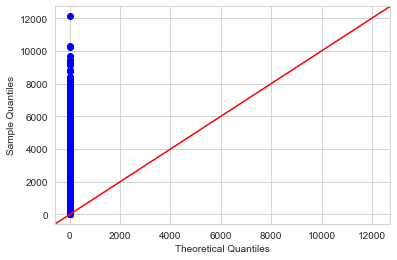

In [147]:
print('Regular')
sn.qqplot(dfFinal[dfFinal['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'], line = '45')
plt.show()

Uji Normalitas Data

>- Nilai anderson stats < critical value(p-value)(dari significance value 5%), terima H0 (tolak H1) => data terdistribusi normal
>- Nilai anderson stats > critical value(p-value)(dari significance value 5%), tolak H0 (terima H1) => data tidak terdistribusi dengan normal

>* Dimana H0 bahwa data tersebut terdistribusi normal
>* H1, dbahwa data tersebut tidak terdistribusi dengan normal.

In [148]:
from scipy.stats import anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in list(zip(anderson(data)[2],anderson(data)[1]))}}
    result['Anderson']['Statistik'] = anderson(data)[0]
    return result

Low Fat

In [149]:
try_normal(dfFinal[dfFinal['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'Statistik': 125.17322459191928}}

Dari test anderson, dapat kita lihat, nilai Anderson Stats lebih besar dibandingkan Critical Value, sehingga H1 diterima, dan H0 ditolak. Artinya, **data tidak terdistribusi dengan normal.**

Regular

In [150]:
try_normal(dfFinal[dfFinal['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'Statistik': 61.05389527118132}}

Dari test anderson, dapat kita lihat, nilai Anderson Stats lebih besar dibandingkan Critical Value, sehingga H1 diterima, dan H0 ditolak. Artinya, **data tidak terdistribusi dengan normal.**

**Menguji Hipotesis**

In [151]:
from scipy.stats import mannwhitneyu

In [152]:
resultAkhir = mannwhitneyu(dfFinal[dfFinal['Item_Fat_Content']=='Low Fat']['Item_Outlet_Sales'],dfFinal[dfFinal['Item_Fat_Content']=='Regular']['Item_Outlet_Sales'])
print('U-Statistik {}'.format(resultAkhir[0]))
print('P-Value {}'.format(resultAkhir[1]))

U-Statistik 8103818.0
P-Value 0.04143477895846782


Dapat dilihat dari nilai uji hipotesis mannwhitneyu, nilai P-Value lebih kecil dibandingkan U-Statistik, maka, menolak H0 dan menerima H1. Artinya, **Ada pengaruh signifikan Item_Fat_Content terhadap Item_Outlet_Sales**

-------------------------------------------

**Item_Type**

In [153]:
dfFinal['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Dapat dilihat bahwa **Fruits and Vegetables** dan **Snack Foods** merupakan 2 kategori produk paling banyak yang dijual di BigMart

In [154]:
item4 = dfFinal.groupby(['Item_Type']).sum()
item4.sort_values(by=['Item_Outlet_Sales'], ascending=False)

Item_Weight  Item_Visibility     Item_MRP  \
Item_Type                                                          
Fruits and Vegetables    16266.340        84.407946  178124.0810   
Snack Foods              15619.825        80.220267  175433.9204   
Household                12144.665        55.803305  135976.5254   
Frozen Foods             11011.850        56.192325  118558.8814   
Dairy                     9147.755        49.395349  101276.4596   
Canned                    7969.275        44.215926   90706.7270   
Baking Goods              7885.330        44.821706   81894.7364   
Health and Hygiene        6744.695        28.712309   68025.8388   
Meat                      5406.245        26.470620   59449.8638   
Soft Drinks               5268.750        28.467650   58514.1650   
Breads                    2812.975        16.630030   35379.1198   
Hard Drinks               2399.360        13.897707   29334.6766   
Starchy Foods             2017.035         9.999407   21880.0274   
Others                    2361.900        10.180734   22451.8916   
Breakfast                 1361.070         9.429531   15596.6966   
Seafood                    791.645         4.798469    9077.8700   

                       Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Type                                                            
Fruits and Vegetables                    2461191       2.820060e+06  
Snack Foods                              2397464       2.732786e+06  
Household                                1817984       2.055494e+06  
Frozen Foods                             1710309       1.825735e+06  
Dairy                                    1362419       1.522594e+06  
Canned                                   1296801       1.444151e+06  
Baking Goods                             1294528       1.265525e+06  
Health and Hygiene                       1038822       1.045200e+06  
Meat                                      848870       9.175656e+05  
Soft Drinks                               889154       8.928977e+05  
Breads                                    501412       5.532372e+05  
Hard Drinks                               427610       4.577934e+05  
Starchy Foods                             295790       3.514013e+05  
Others                                    337605       3.255176e+05  
Breakfast                                 219707       2.322990e+05  
Seafood                                   127855       1.488682e+05

Dapat dilihat, bahwa **Fruits and Vegetables** dan **Snack Foods** menjadi 2 produk paling banyak terjual di outlet BigMart

Kemudian, kategori **Seafood** dan **Breakfast** menjadi 2 produk paling sedikit terjual di outlet BigMart.

In [155]:
import plotly.graph_objects as go

labels = []
values = []
for item in list(dfFinal['Item_Type'].unique()):
    labels.append(item)
    values.append(item4.loc[item]['Item_Outlet_Sales'])


# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

**Melihat apakah ada pengaruh signifikan antara Item_Type dengan Item_Outlet_Sales**

- H0: Tidak ada pengaruh signifikan antara Item_Type terhadap Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Item_Type terhadap Item_Outlet_Sales

Singnifikan level 5%

Dairy


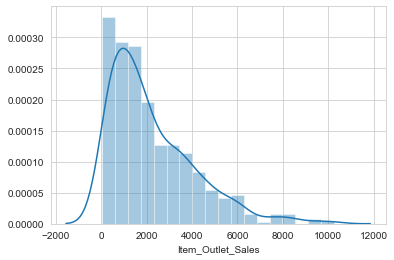

Soft Drinks


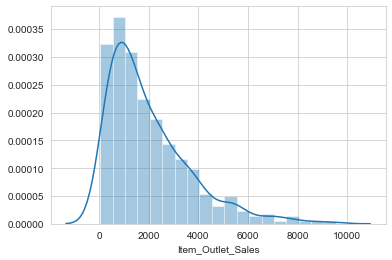

Meat


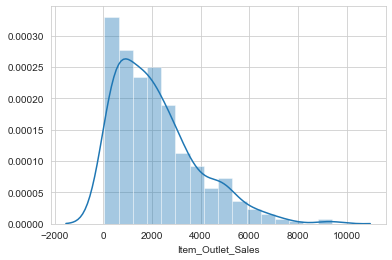

Household


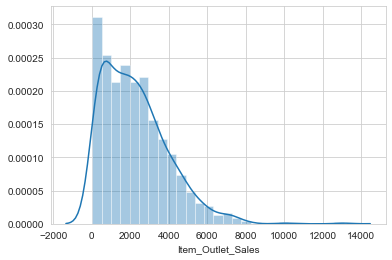

Baking Goods


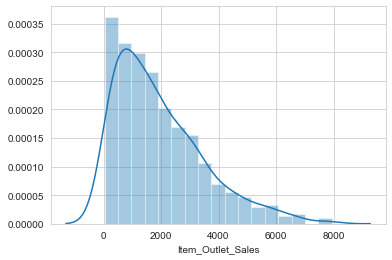

Snack Foods


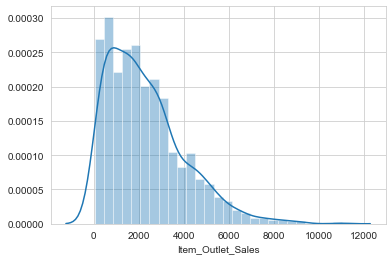

Fruits and Vegetables


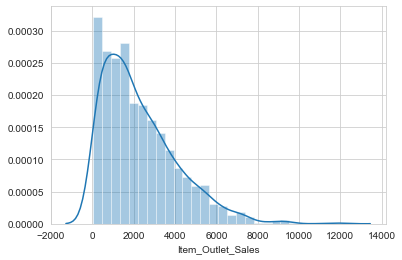

Breakfast


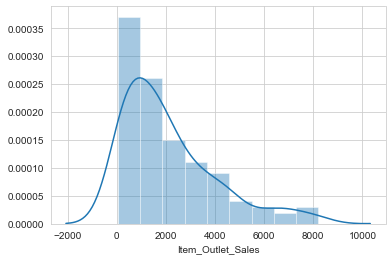

Health and Hygiene


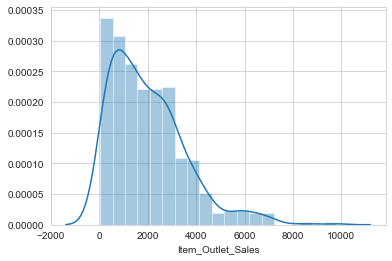

Frozen Foods


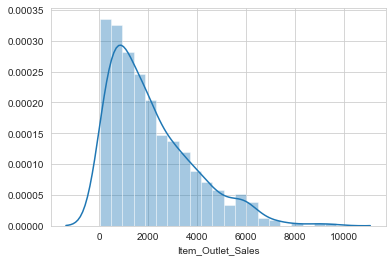

Hard Drinks


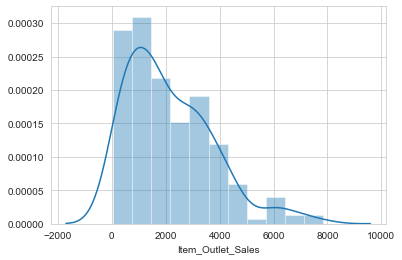

Canned


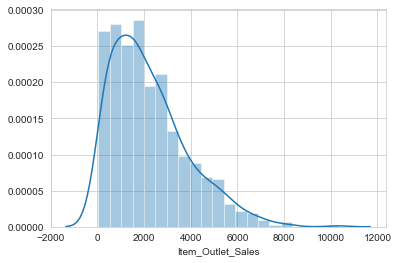

Starchy Foods


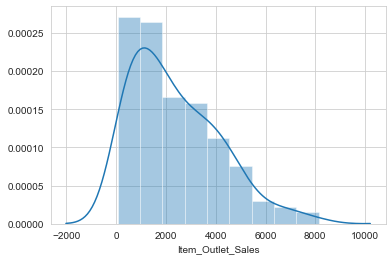

Breads


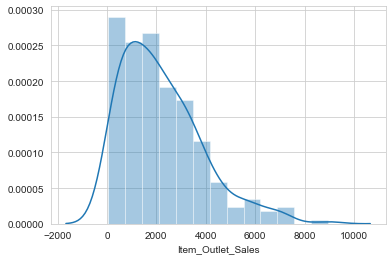

Others


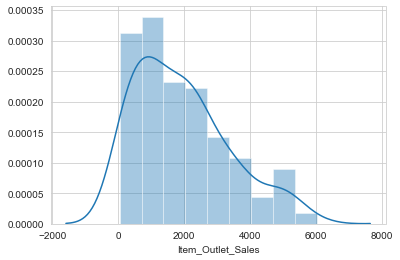

Seafood


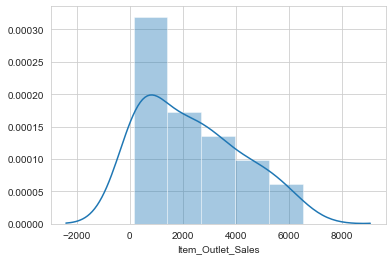

In [156]:
for item in list(dfFinal['Item_Type'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Item_Type']==item]['Item_Outlet_Sales'])
    plt.show()

Dari analisis grafik, dapat dilihat, **hampir semua data tidak terdistribusi dengan normal.** Namun untuk memastikan, saya melakukan uji dengan QQPlot dan test Anderson

QQPlot

Dairy


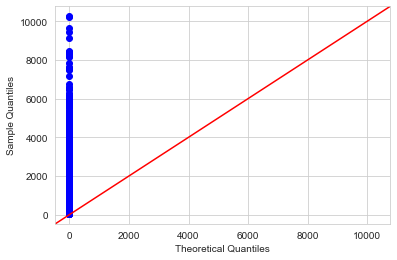

Soft Drinks


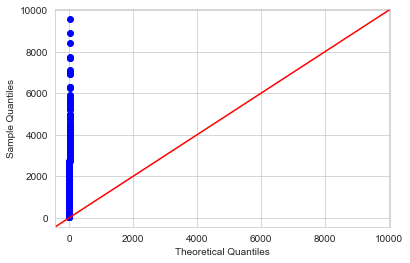

Meat


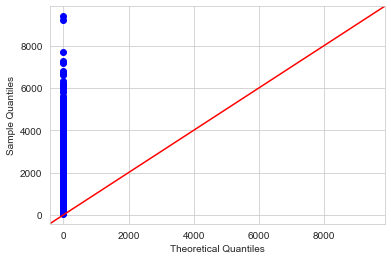

Household


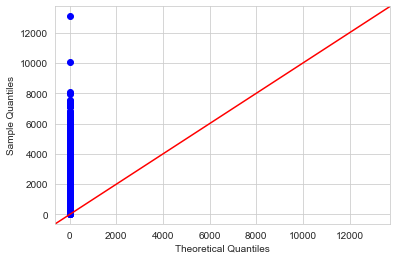

Baking Goods


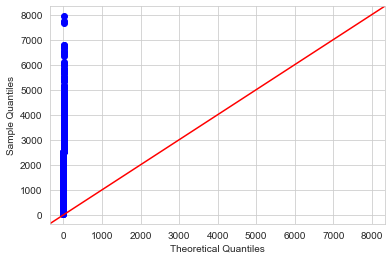

Snack Foods


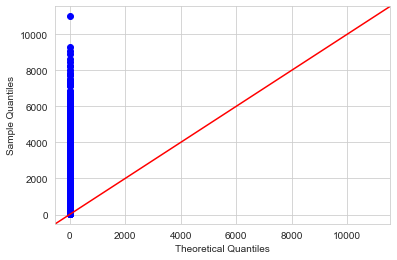

Fruits and Vegetables


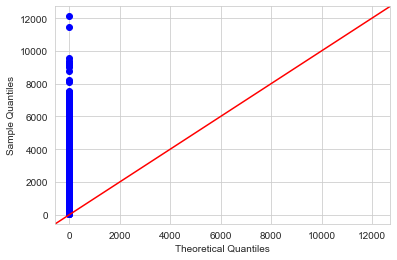

Breakfast


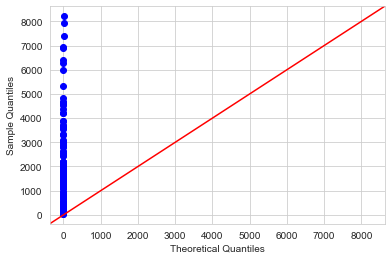

Health and Hygiene


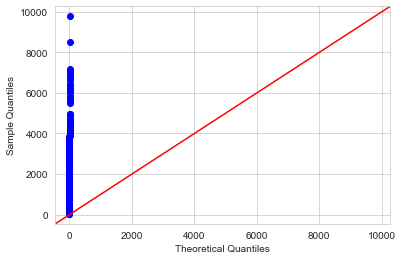

Frozen Foods


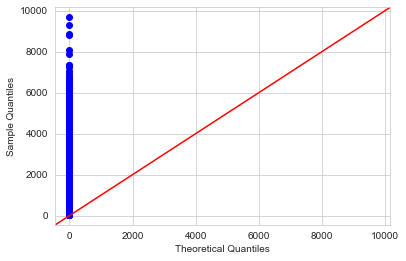

Hard Drinks


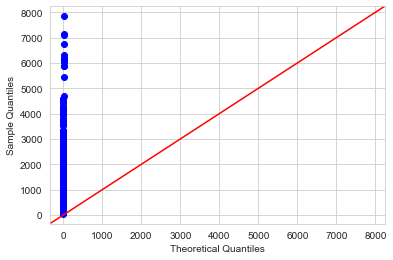

Canned


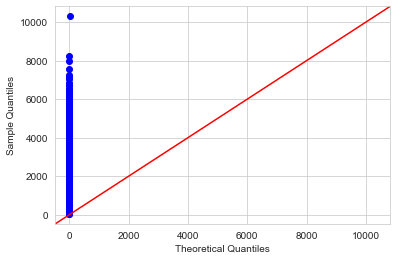

Starchy Foods


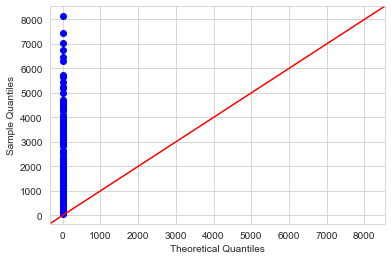

Breads


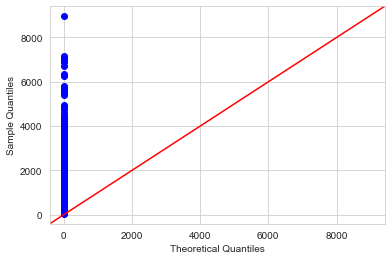

Others


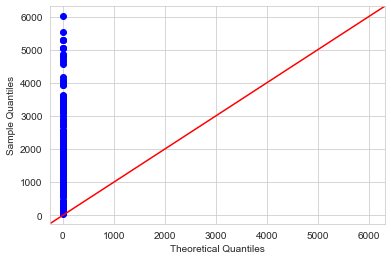

Seafood


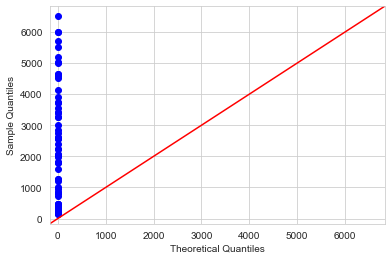

In [157]:
for item in list(dfFinal['Item_Type'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Item_Type']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot, dapat kita lihat bahwa semua data tersebut **tidak terdistribusi dengan normal.**

Uji Anderson

>- Nilai anderson stats < critical value(p-value)(dari significance value 5%), terima H0 (tolak H1) => data terdistribusi normal
>- Nilai anderson stats > critical value(p-value)(dari significance value 5%), tolak H0 (terima H1) => data tidak terdistribusi dengan normal

>* Dimana H0 bahwa data tersebut terdistribusi normal
>* H1, dbahwa data tersebut tidak terdistribusi dengan normal.

In [158]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in list(zip(anderson(data)[2],anderson(data)[1]))}}
    result['Anderson']['Statistik'] = anderson(data)[0]
    return result

In [159]:
for item in list(dfFinal['Item_Type'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Item_Type']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Dairy
{'Anderson': {15.0: 0.573, 10.0: 0.652, 5.0: 0.782, 2.5: 0.913, 1.0: 1.086, 'Statistik': 21.66318315840749}}
-----------------------------------------------------------
Soft Drinks
{'Anderson': {15.0: 0.571, 10.0: 0.65, 5.0: 0.78, 2.5: 0.91, 1.0: 1.082, 'Statistik': 15.057887174397706}}
-----------------------------------------------------------
Meat
{'Anderson': {15.0: 0.571, 10.0: 0.65, 5.0: 0.78, 2.5: 0.91, 1.0: 1.082, 'Statistik': 9.722801379624116}}
-----------------------------------------------------------
Household
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 13.553627787627079}}
-----------------------------------------------------------
Baking Goods
{'Anderson': {15.0: 0.573, 10.0: 0.652, 5.0: 0.782, 2.5: 0.912, 1.0: 1.085, 'Statistik': 15.742777172489468}}
-----------------------------------------------------------
Snack Foods
{'Anderson': {15.0: 0.574, 10.0: 0.654, 5.0: 0.784, 2.5: 0.915, 1.0: 1.088, 'Statistik': 22.04642339

Dari nilai Anderson, dapat dilihat bahwa semua nilai Anderson-Stat lebih besar dibandingkan dengan Critical Value, maka H1 diterima dan menolak H0, yang artinya, **semua data tidak terdistribusi dengan normal**.

**Uji Hipotesis**

In [160]:
from pingouin import kruskal, pairwise_ttests

In [161]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Item_Type')

Source  ddof1         H     p-unc
Kruskal  Item_Type     15  41.20046  0.000298

Dapat dilihat bahwa p-value, kurang dari signifikan level, maka H0 ditolak dan menerima H1. Karena menerima H1, maka tahapan selanjutkan yaitu post-hoc-test dilakukan.

In [162]:
dfpair = pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Item_Type', parametric=False)

In [163]:
dfpair

Contrast              A             B  Paired  Parametric     U-val  \
0    Item_Type          Dairy   Soft Drinks   False       False  160115.0   
1    Item_Type          Dairy          Meat   False       False  144574.0   
2    Item_Type          Dairy     Household   False       False  297370.0   
3    Item_Type          Dairy  Baking Goods   False       False  234744.5   
4    Item_Type          Dairy   Snack Foods   False       False  389542.5   
..         ...            ...           ...     ...         ...       ...   
115  Item_Type  Starchy Foods        Others   False       False   14126.0   
116  Item_Type  Starchy Foods       Seafood   False       False    4873.5   
117  Item_Type         Breads        Others   False       False   23101.0   
118  Item_Type         Breads       Seafood   False       False    7942.0   
119  Item_Type         Others       Seafood   False       False    4893.0   

          Tail     p-unc    hedges  
0    two-sided  0.117119  0.125184  
1    two-sided  0.945983  0.040523  
2    two-sided  0.153993 -0.014760  
3    two-sided  0.049110  0.161681  
4    two-sided  0.082811 -0.025258  
..         ...       ...       ...  
115  two-sided  0.046675  0.279344  
116  two-sided  0.738288  0.026794  
117  two-sided  0.121115  0.177613  
118  two-sided  0.890550 -0.072143  
119  two-sided  0.262581 -0.256383  

[120 rows x 9 columns]

In [164]:
dfpair[dfpair['p-unc']<0.05]

Contrast                      A                      B  Paired  \
3    Item_Type                  Dairy           Baking Goods   False   
16   Item_Type            Soft Drinks              Household   False   
18   Item_Type            Soft Drinks            Snack Foods   False   
19   Item_Type            Soft Drinks  Fruits and Vegetables   False   
24   Item_Type            Soft Drinks                 Canned   False   
25   Item_Type            Soft Drinks          Starchy Foods   False   
26   Item_Type            Soft Drinks                 Breads   False   
42   Item_Type              Household           Baking Goods   False   
46   Item_Type              Household     Health and Hygiene   False   
47   Item_Type              Household           Frozen Foods   False   
52   Item_Type              Household                 Others   False   
54   Item_Type           Baking Goods            Snack Foods   False   
55   Item_Type           Baking Goods  Fruits and Vegetables   False   
60   Item_Type           Baking Goods                 Canned   False   
61   Item_Type           Baking Goods          Starchy Foods   False   
62   Item_Type           Baking Goods                 Breads   False   
67   Item_Type            Snack Foods     Health and Hygiene   False   
68   Item_Type            Snack Foods           Frozen Foods   False   
73   Item_Type            Snack Foods                 Others   False   
76   Item_Type  Fruits and Vegetables     Health and Hygiene   False   
77   Item_Type  Fruits and Vegetables           Frozen Foods   False   
82   Item_Type  Fruits and Vegetables                 Others   False   
94   Item_Type     Health and Hygiene                 Canned   False   
95   Item_Type     Health and Hygiene          Starchy Foods   False   
115  Item_Type          Starchy Foods                 Others   False   

     Parametric     U-val       Tail     p-unc    hedges  
3         False  234744.5  two-sided  0.049110  0.161681  
16        False  181705.0  two-sided  0.002138 -0.149513  
18        False  237725.0  two-sided  0.000625 -0.159524  
19        False  247907.5  two-sided  0.002756 -0.159788  
24        False  130043.5  two-sided  0.005158 -0.131877  
25        False   28735.0  two-sided  0.020174 -0.216142  
26        False   50751.0  two-sided  0.045422 -0.118670  
42        False  326810.0  two-sided  0.000260  0.187142  
46        False  256127.5  two-sided  0.009337  0.151321  
47        False  412475.5  two-sided  0.031787  0.073686  
52        False   84909.0  two-sided  0.031243  0.200935  
54        False  344417.0  two-sided  0.000050 -0.196335  
55        False  358912.5  two-sided  0.000320 -0.195675  
60        False  188554.5  two-sided  0.001280 -0.170381  
61        False   41477.5  two-sided  0.010312 -0.264542  
62        False   73564.5  two-sided  0.026315 -0.159379  
67        False  339268.0  two-sided  0.003947  0.160888  
68        False  546913.5  two-sided  0.012056  0.084281  
73        False  112316.5  two-sided  0.023292  0.209678  
76        False  344298.0  two-sided  0.013192  0.161186  
77        False  555259.0  two-sided  0.039042  0.088221  
82        False  114194.5  two-sided  0.040778  0.206134  
94        False  156117.0  two-sided  0.027772 -0.133980  
95        False   34171.0  two-sided  0.037522 -0.226762  
115       False   14126.0  two-sided  0.046675  0.279344

Dapat dilihat dari hasil pairwise test, bahwa p-Value ada yang lebih kecil dari signifikan value. Dengan hal ini, maka, dapat kita simpulkan bahwa ada **Ada perbedaan signifikan antara *Item_Type* dan *Item_Outlet_Sales***, atau **menerima H1 menolak H0**

----------------------------------------------------

**Outlet_Identifier**

In [165]:
dfFinal['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Terdapat 10 Outlet/gerai yang dimiliki oleh BigMart. Outlet dengan kode OUT027 merupakan outlet dengan variasi produk terbanyak. 

In [166]:
item5= dfFinal.groupby(['Outlet_Identifier']).sum()
item5.sort_values(by=['Item_Outlet_Sales'],ascending=False)

Item_Weight  Item_Visibility     Item_MRP  \
Outlet_Identifier                                              
OUT027               11767.920        54.804764  130714.6746   
OUT035               11931.295        56.974873  133103.9070   
OUT049               12013.225        56.549156  130476.8598   
OUT017               11877.495        56.834646  129103.9564   
OUT013               12121.730        55.879859  131809.0156   
OUT046               11966.125        56.231875  132113.3698   
OUT045               11751.840        56.180780  130942.7782   
OUT018               11946.465        56.621454  131477.7724   
OUT010                7166.800        56.308832   78131.5646   
OUT019                6665.820        57.257041   73807.5824   

                   Outlet_Establishment_Year  Item_Outlet_Sales  
Outlet_Identifier                                                
OUT027                               1855975       3.453926e+06  
OUT035                               1863720       2.268123e+06  
OUT049                               1859070       2.183970e+06  
OUT017                               1858482       2.167465e+06  
OUT013                               1851884       2.142664e+06  
OUT046                               1857210       2.118395e+06  
OUT045                               1859858       2.036725e+06  
OUT018                               1864352       1.851823e+06  
OUT010                               1108890       1.883402e+05  
OUT019                               1048080       1.796941e+05

Dari data, terlihat bahwa outlet/gerai OUT027 merupakan outlet dengan pendapatan paling besar.

In [167]:
item6=dfFinal.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Type','Outlet_Location_Type']).sum()
item6.sort_values(by=['Outlet_Establishment_Year'],ascending=False)

Item_Weight  \
Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Type       Outlet_Location_Type                
OUT018            2009                      Medium      Supermarket Type2 Tier 3                  11946.465   
OUT017            2007                      Small       Supermarket Type1 Tier 2                  11877.495   
OUT035            2004                      Small       Supermarket Type1 Tier 2                  11931.295   
OUT045            2002                      Small       Supermarket Type1 Tier 2                  11751.840   
OUT049            1999                      Medium      Supermarket Type1 Tier 1                  12013.225   
OUT010            1998                      Medium      Grocery Store     Tier 3                   7166.800   
OUT046            1997                      Small       Supermarket Type1 Tier 1                  11966.125   
OUT013            1987                      High        Supermarket Type1 Tier 3                  12121.730   
OUT019            1985                      Small       Grocery Store     Tier 1                   6665.820   
OUT027            1985                      Medium      Supermarket Type3 Tier 3                  11767.920   

                                                                                                Item_Visibility  \
Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Type       Outlet_Location_Type                    
OUT018            2009                      Medium      Supermarket Type2 Tier 3                      56.621454   
OUT017            2007                      Small       Supermarket Type1 Tier 2                      56.834646   
OUT035            2004                      Small       Supermarket Type1 Tier 2                      56.974873   
OUT045            2002                      Small       Supermarket Type1 Tier 2                      56.180780   
OUT049            1999                      Medium      Supermarket Type1 Tier 1                      56.549156   
OUT010            1998                      Medium      Grocery Store     Tier 3                      56.308832   
OUT046            1997                      Small       Supermarket Type1 Tier 1                      56.231875   
OUT013            1987                      High        Supermarket Type1 Tier 3                      55.879859   
OUT019            1985                      Small       Grocery Store     Tier 1                      57.257041   
OUT027            1985                      Medium      Supermarket Type3 Tier 3                      54.804764   

                                                                                                   Item_MRP  \
Outlet_Identifier Outlet_Establishment_Year Outlet_Size Outlet_Type       Outlet_Location_Type                
OUT018            2009                      Medium      Supermarket Type2 Tier 3                131477.7724   
OUT017            2007                      Small       Supermarket Type1 Tier 2                129103.9564   
OUT035            2004                      Small       Supermarket Type1 Tier 2                133103.9070   
OUT045            2002                      Small       Supermarket Type1 Tier 2                130942.7782   
OUT049            1999                      Medium      Supermarket Type1 Tier 1                130476.8598   
OUT010            1998                      Medium      Grocery Store     Tier 3                 78131.5646   
OUT046            1997                      Small       Supermarket Type1 Tier 1                132113.3698   
OUT013            1987                      High        Supermarket Type1 Tier 3                131809.0156   
OUT019            1985                      Small       Grocery Store     Tier 1                 73807.5824   
OUT027            1985                      Medium      Supermarket Type3 Tier 3                130714.6746   

                                                 

Dari data tersebut, didapatkan beberapa informasi:
1. Outlet dengan Id OUT027 dan OUT019 merupakan outlet BigMart paling lama didirikan.
2. Outlet dengan Id OUT018 merupakan outlet BigMart paling muda tahun didirikannya.
3. Tier 3 merupakan lokasi paling banyak terdapat outlet/gerai BigMart.
4. Saat ini BigMart hanya memiliki 1 buah Supermarket Type 3.
5. Outlet paling besar adalah outlet OUT013

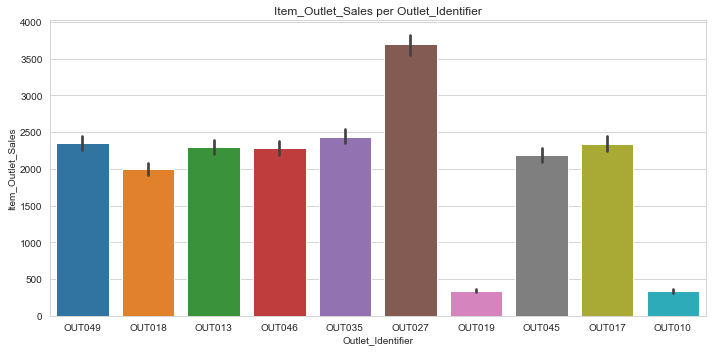

In [168]:
plt.figure(figsize=[10,5])
sns.barplot(data=dfFinal, x='Outlet_Identifier', y='Item_Outlet_Sales').set_title('Item_Outlet_Sales per Outlet_Identifier')
plt.tight_layout()

Dari grafik, dapat dilihat bahwa outlet OUT027 merupakan outlet dengan pendapatan terbanyak.

Melihat apakah ada pengaruh signifikan antara Outlet dengan Item_Outlet_Sales.

OUT049


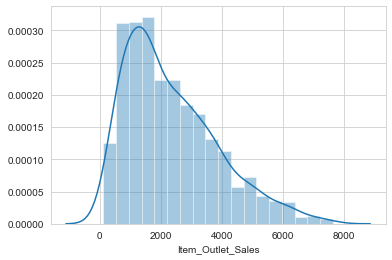

OUT018


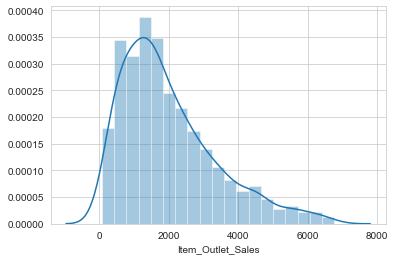

OUT013


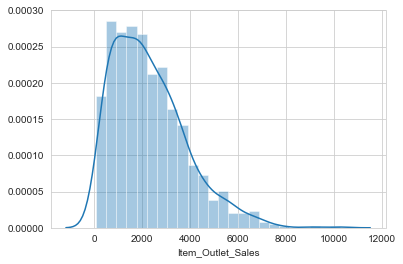

OUT046


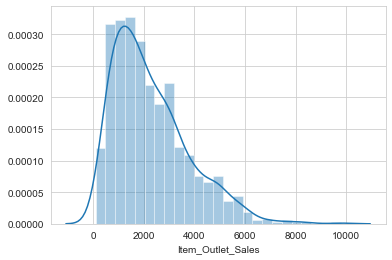

OUT035


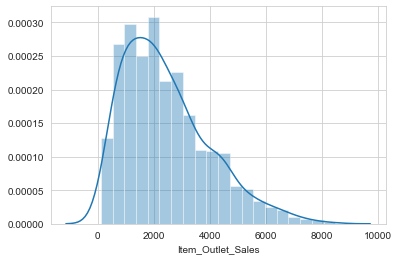

OUT027


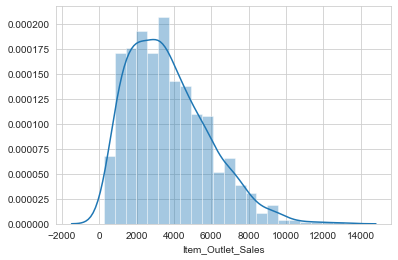

OUT019


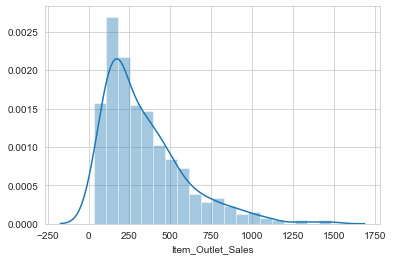

OUT045


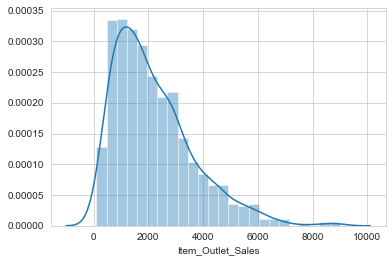

OUT017


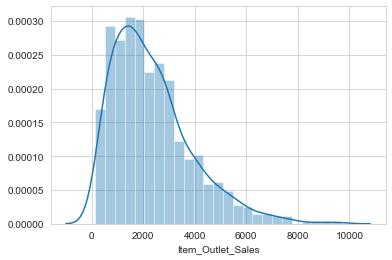

OUT010


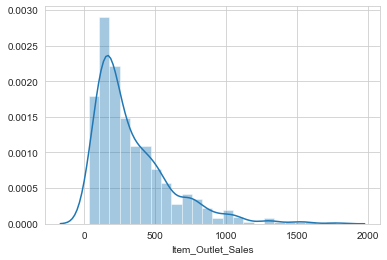

In [169]:
for item in list(dfFinal['Outlet_Identifier'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Outlet_Identifier']==item]['Item_Outlet_Sales'])
    plt.show()

Dari analisis grafik, dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal 

Uji QQPlot

OUT049


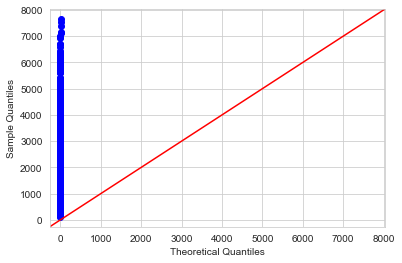

OUT018


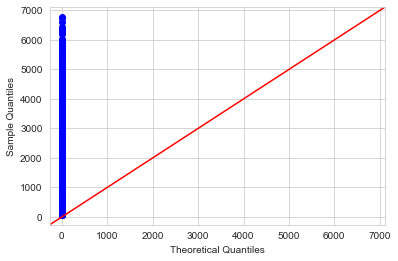

OUT013


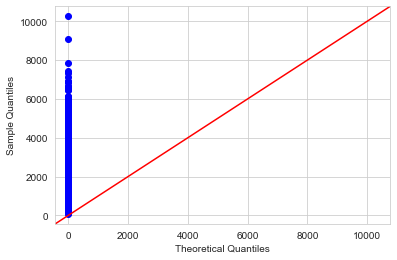

OUT046


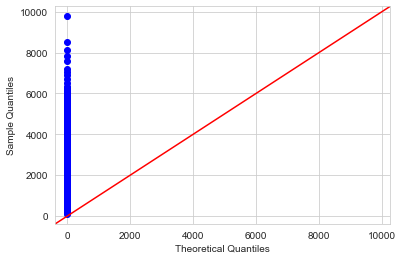

OUT035


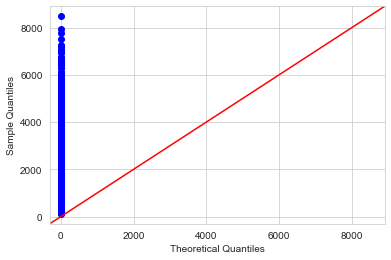

OUT027


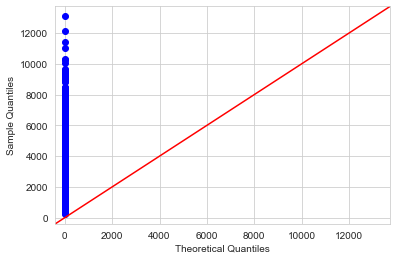

OUT019


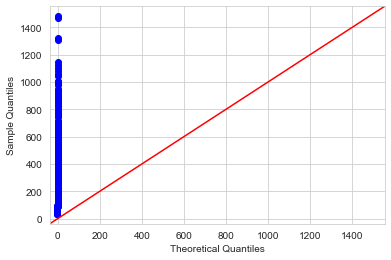

OUT045


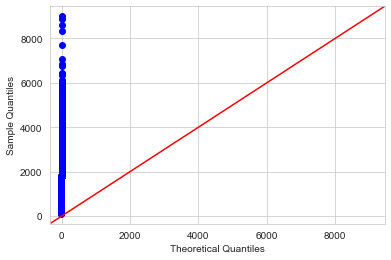

OUT017


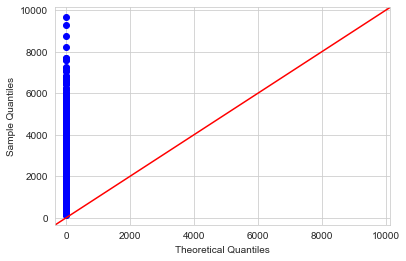

OUT010


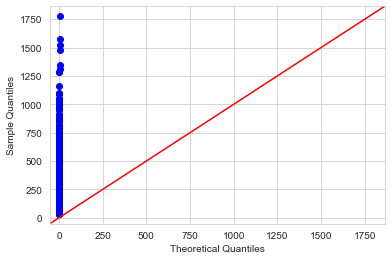

In [170]:
for item in list(dfFinal['Outlet_Identifier'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Outlet_Identifier']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot tersebut juga terlihat bahwa data tersebut tidak terdistribusi dengan normal.

Uji Anderson

>- Nilai anderson stats < critical value(p-value)(dari significance value 5%), terima H0 (tolak H1) => data terdistribusi normal
>- Nilai anderson stats > critical value(p-value)(dari significance value 5%), tolak H0 (terima H1) => data tidak terdistribusi dengan normal

>* Dimana H0 bahwa data tersebut terdistribusi normal
>* H1, dbahwa data tersebut tidak terdistribusi dengan normal.

In [171]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in list(zip(anderson(data)[2],anderson(data)[1]))}}
    result['Anderson']['Statistik'] = anderson(data)[0]
    return result

In [172]:
for item in list(dfFinal['Outlet_Identifier'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Outlet_Identifier']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

OUT049
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 17.72293680318853}}
-----------------------------------------------------------
OUT018
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 21.70906274353615}}
-----------------------------------------------------------
OUT013
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 13.30109729096148}}
-----------------------------------------------------------
OUT046
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 18.616639085517363}}
-----------------------------------------------------------
OUT035
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 14.938884053313586}}
-----------------------------------------------------------
OUT027
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 10.18998941765301}}
--

Dari uji Anderson, dilihat bahwa nilai Statistik lebih besar dibandingkan critical value, yang artinya menerima H1 dan menolak H0. Dengan begitu, dapat ditarik kesimpulan bahwa **data tersebut tidak terdistribusi dengan normal**.

Uji Hipotesis.

- H0: Tidak ada pengaruh signifikan antara Outlet_Identifier dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Outlet_Identifier dengan Item_Outlet_Sales

Signifikan level 5%

In [173]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Outlet_Identifier')

Source  ddof1            H  p-unc
Kruskal  Outlet_Identifier      9  2814.458939    0.0

Dapat dilihat, bahwa P-Value lebih kecil dari signifikan level, artinya menerima H1 menolak H0. Kemudian, dilanjutkan ke proses Post-hoc Test

In [174]:
pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Outlet_Identifier', parametric=False)

Contrast       A       B  Paired  Parametric     U-val  \
0   Outlet_Identifier  OUT049  OUT018   False       False  491321.0   
1   Outlet_Identifier  OUT049  OUT013   False       False  441993.0   
2   Outlet_Identifier  OUT049  OUT046   False       False  443422.5   
3   Outlet_Identifier  OUT049  OUT035   False       False  416181.5   
4   Outlet_Identifier  OUT049  OUT027   False       False  265459.5   
5   Outlet_Identifier  OUT049  OUT019   False       False  475064.5   
6   Outlet_Identifier  OUT049  OUT045   False       False  457671.0   
7   Outlet_Identifier  OUT049  OUT017   False       False  432808.5   
8   Outlet_Identifier  OUT049  OUT010   False       False  498615.5   
9   Outlet_Identifier  OUT018  OUT013   False       False  381436.0   
10  Outlet_Identifier  OUT018  OUT046   False       False  381947.0   
11  Outlet_Identifier  OUT018  OUT035   False       False  355114.5   
12  Outlet_Identifier  OUT018  OUT027   False       False  215572.5   
13  Outlet_Identifier  OUT018  OUT019   False       False  461395.0   
14  Outlet_Identifier  OUT018  OUT045   False       False  395957.0   
15  Outlet_Identifier  OUT018  OUT017   False       False  371311.5   
16  Outlet_Identifier  OUT018  OUT010   False       False  484644.0   
17  Outlet_Identifier  OUT013  OUT046   False       False  435680.5   
18  Outlet_Identifier  OUT013  OUT035   False       False  409150.5   
19  Outlet_Identifier  OUT013  OUT027   False       False  259987.5   
20  Outlet_Identifier  OUT013  OUT019   False       False  467718.5   
21  Outlet_Identifier  OUT013  OUT045   False       False  449994.5   
22  Outlet_Identifier  OUT013  OUT017   False       False  425697.0   
23  Outlet_Identifier  OUT013  OUT010   False       False  491482.5   
24  Outlet_Identifier  OUT046  OUT035   False       False  404968.5   
25  Outlet_Identifier  OUT046  OUT027   False       False  254729.0   
26  Outlet_Identifier  OUT046  OUT019   False       False  474119.0   
27  Outlet_Identifier  OUT046  OUT045   False       False  446955.5   
28  Outlet_Identifier  OUT046  OUT017   False       False  421646.0   
29  Outlet_Identifier  OUT046  OUT010   False       False  497636.0   
30  Outlet_Identifier  OUT035  OUT027   False       False  278429.5   
31  Outlet_Identifier  OUT035  OUT019   False       False  475442.5   
32  Outlet_Identifier  OUT035  OUT045   False       False  474433.5   
33  Outlet_Identifier  OUT035  OUT017   False       False  449035.0   
34  Outlet_Identifier  OUT035  OUT010   False       False  499237.5   
35  Outlet_Identifier  OUT027  OUT019   False       False  489951.0   
36  Outlet_Identifier  OUT027  OUT045   False       False  626803.0   
37  Outlet_Identifier  OUT027  OUT017   False       False  603993.0   
38  Outlet_Identifier  OUT027  OUT010   False       False  514493.5   
39  Outlet_Identifier  OUT019  OUT045   False       False   18401.5   
40  Outlet_Identifier  OUT019  OUT017   False       False   18502.0   
41  Outlet_Identifier  OUT019  OUT010   False       False  150486.0   
42  Outlet_Identifier  OUT045  OUT017   False       False  406424.5   
43  Outlet_Identifier  OUT045  OUT010   False       False  495543.0   
44  Outlet_Identifier  OUT017  OUT010   False       False  494057.5   

         Tail          p-unc    hedges  
0   two-sided   2.318680e-07  0.243870  
1   two-sided   4.578179e-01  0.032387  
2   two-sided   3.434493e-01  0.046960  
3   two-sided   1.601247e-01 -0.059275  
4   two-sided   4.992288e-48 -0.728253  
5   two-sided  6.086014e-194  1.647633  
6   two-sided   2.644651e-02  0.104771  
7   two-sided   8.476389e-01  0.005010  
8   two-sided  7.139868e-199  1.660686  
9   two-sided   1.059926e-05 -0.208213  
10  two-sided   1.809174e-05 -0.196906  
11  two-sided   3.900522e-11 -0.303625  
12  two-sided   7.439913e-79 -0.946879  
13  two-sided  3.334170e-173  1.491854  
14  two-sided   2.382262e-03 -0.138611  
15  two-sided   4.130328e-07 -0.235380  
16  two-sided  3.799871e-178  1.503287  
17  two-

Dari data dapat dilihat bahwa P-Value lebih kecil dari signifikan level, yang artinya menerima H1 menolak H0, yang berarti **ada pengaruh signifikan antara Outlet_Identifier dengan Item_Outlet_Sales**

--------------------------------------------------------

**Outlet_Size**

In [175]:
dfFinal['Outlet_Size'].value_counts()

Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64

Dari data sebelumnya, dapat kita lihat bahwa gerai/outlet dari BigMart lebih banyak outlet dengan ukuran small.

**Melihat pengaruh ukuran outlet terhadap pendapatan.**

Medium


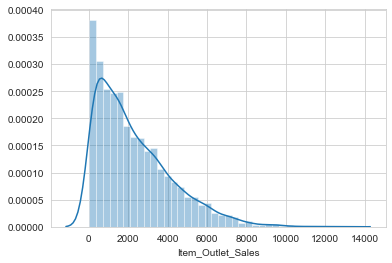

High


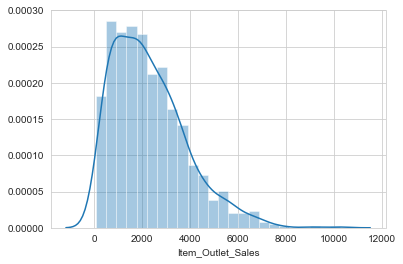

Small


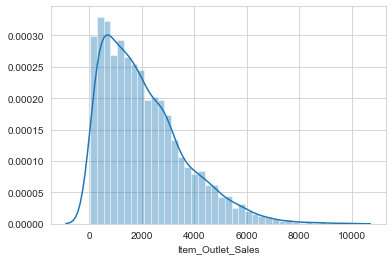

In [176]:
for item in list(dfFinal['Outlet_Size'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Outlet_Size']==item]['Item_Outlet_Sales'])
    plt.show()

Dari analisis grafik, dapat dilihat bahwa data tersebut **tidak terdistribusi dengan normal.**

QQPlot

Medium


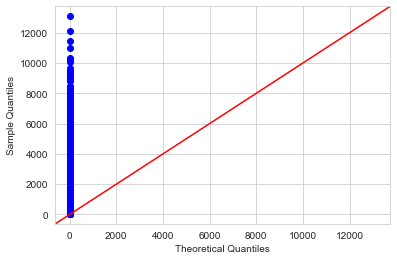

High


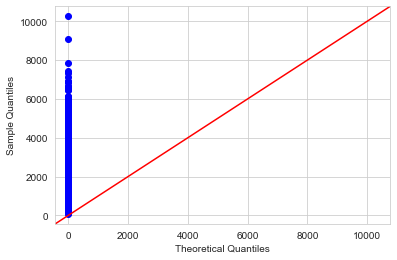

Small


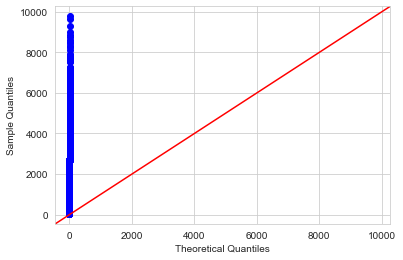

In [177]:
for item in list(dfFinal['Outlet_Size'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Outlet_Size']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari hasil QQPlot juga dapat dilihat bahwa data tersebut **tidak terdistribusi dengan normal.**

Uji Anderson

>- Nilai anderson stats < critical value(p-value)(dari significance value 5%), terima H0 (tolak H1) => data terdistribusi normal
>- Nilai anderson stats > critical value(p-value)(dari significance value 5%), tolak H0 (terima H1) => data tidak terdistribusi dengan normal

>* Dimana H0 bahwa data tersebut terdistribusi normal
>* H1, dbahwa data tersebut tidak terdistribusi dengan normal.

In [178]:
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in list(zip(anderson(data)[2],anderson(data)[1]))}}
    result['Anderson']['Statistik'] = anderson(data)[0]
    return result

In [179]:
for item in list(dfFinal['Outlet_Size'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Outlet_Size']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Medium
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 86.44863749823435}}
-----------------------------------------------------------
High
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 13.30109729096148}}
-----------------------------------------------------------
Small
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 83.93801265772709}}
-----------------------------------------------------------


Dari hasil test anderson, didapatkan kesimpulan bahwa data tersebut **tidak terdistribusi dengan normal**

**UJI HIPOTESIS**

- H0: Tidak ada pengaruh signifikan antara Outlet_Size dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Outlet_Size dengan Item_Outlet_Sales

Signifikan level 5%

In [180]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Outlet_Size')

Source  ddof1         H     p-unc
Kruskal  Outlet_Size      2  25.62824  0.000003

Dapat dilihat, bahwa P-Value lebih kecil dari signifikan level, artinya menerima H1 menolak H0. Kemudian, dilanjutkan ke proses Post-hoc Test

In [181]:
dfpair2 = pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Outlet_Size', parametric=False)

In [182]:
dfpair2

Contrast       A      B  Paired  Parametric      U-val       Tail  \
0  Outlet_Size  Medium   High   False       False  1460639.0  two-sided   
1  Outlet_Size  Medium  Small   False       False  7335466.5  two-sided   
2  Outlet_Size    High  Small   False       False  2188241.0  two-sided   

          p-unc    hedges  
0  2.853636e-03 -0.003091  
1  1.411099e-02  0.131362  
2  3.238520e-07  0.149104

Dari data dapat dilihat bahwa P-Value lebih kecil dari signifikan level, yang artinya menerima H1 menolak H0, yang berarti **ada pengaruh signifikan antara Outlet_Size dengan Item_Outlet_Sales**

--------------------------------------------------------------------------

**Outlet_Location_Type**

In [183]:
dfFinal['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Melihat pengaruh *Outlet_Location_Type*  *Item_Outlet_Sales* 

Tier 1


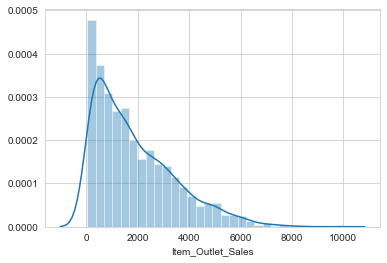

Tier 3


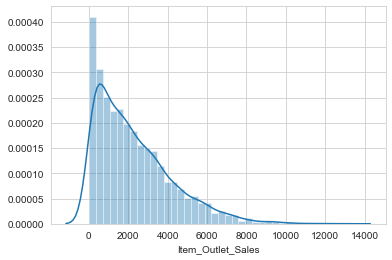

Tier 2


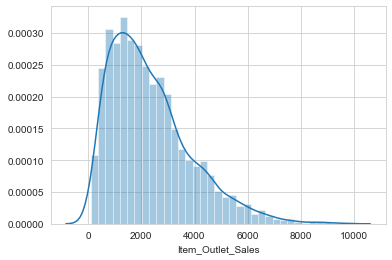

In [184]:
for item in list(dfFinal['Outlet_Location_Type'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Outlet_Location_Type']==item]['Item_Outlet_Sales'])
    plt.show()

Dari grafik dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal. Namun untuk lebih meyakinkan, saya melakukan test dengan QQPlot dan Test Anderson.

QQPlot

Tier 1


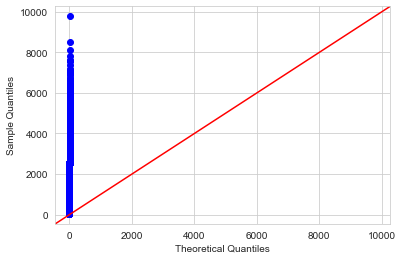

Tier 3


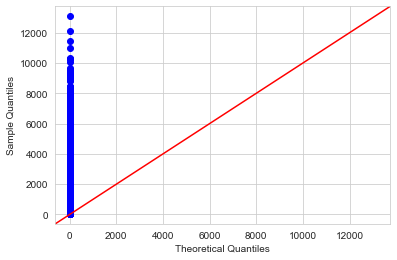

Tier 2


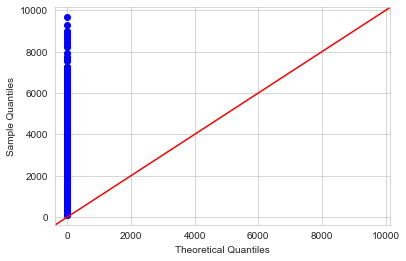

In [185]:
for item in list(dfFinal['Outlet_Location_Type'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Outlet_Location_Type']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot, dapat dilihat, bahwa data tersebut tidak terdistribusi dengan normal.

Test Anderson

In [186]:
for item in list(dfFinal['Outlet_Location_Type'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Outlet_Location_Type']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Tier 1
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.916, 1.0: 1.09, 'Statistik': 64.31882524977436}}
-----------------------------------------------------------
Tier 3
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 85.62418816625086}}
-----------------------------------------------------------
Tier 2
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.09, 'Statistik': 51.718985549631725}}
-----------------------------------------------------------


Dari data tersebut terlihat bahwa nilai Statistik Anderson lebih besar dari signifikan level (5%) yang berarti, menerima H1 dan menolak H0, yang berarti data tersebut **tidak terdistribusi dengan normal.**

**UJI HIPOTESIS**

- H0: Tidak ada pengaruh signifikan antara Outlet_Location_Type dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Outlet_Location_Type dengan Item_Outlet_Sales

Signifikan level 5%

In [187]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Outlet_Location_Type')

Source  ddof1           H         p-unc
Kruskal  Outlet_Location_Type      2  155.505681  1.707538e-34

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [188]:
dfpair3 = pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Outlet_Location_Type', parametric=False)

In [189]:
dfpair3

Contrast       A       B  Paired  Parametric      U-val  \
0  Outlet_Location_Type  Tier 1  Tier 3   False       False  3569108.0   
1  Outlet_Location_Type  Tier 1  Tier 2   False       False  2632732.0   
2  Outlet_Location_Type  Tier 3  Tier 2   False       False  4285978.5   

        Tail         p-unc    hedges  
0  two-sided  3.291892e-12 -0.226865  
1  two-sided  2.926643e-38 -0.290336  
2  two-sided  4.118062e-08 -0.025413

Dari data dapat dilihat, P-Value lebih kecil dari Signifikan Level, yang artinya menerima H1 dan menolak H0, artinya **ada pengaruh signifikan antara Item_Outlet_Sales dan Outlet_Location_Type.**

----------------------------------------------------------------

**Outlet_Type**

In [190]:
dfFinal['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Meninjau apakah ada pengaruh signifikan antara Outlet_Type dan Item_Outlet_Sales

Supermarket Type1


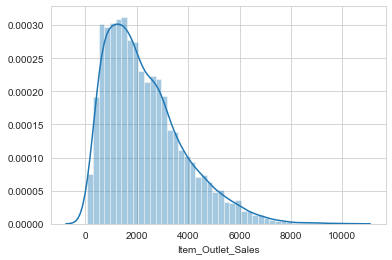

Supermarket Type2


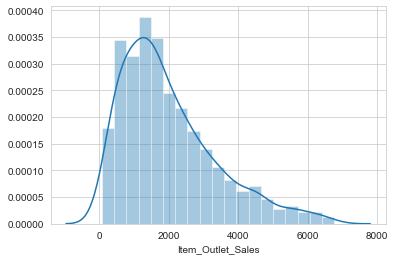

Supermarket Type3


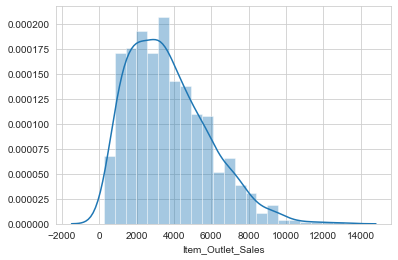

Grocery Store


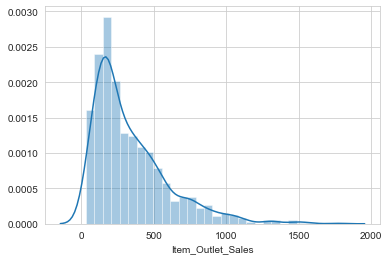

In [191]:
for item in list(dfFinal['Outlet_Type'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Outlet_Type']==item]['Item_Outlet_Sales'])
    plt.show()

Dari grafik dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal. Untuk lebih meyakinkan, saya melakukan uji QQPlot dan Uji Anderson

QQPlot

Supermarket Type1


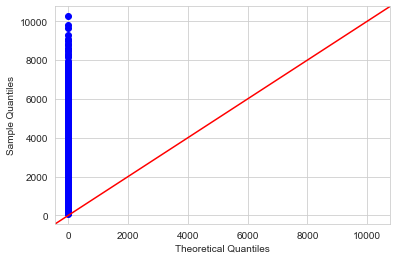

Supermarket Type2


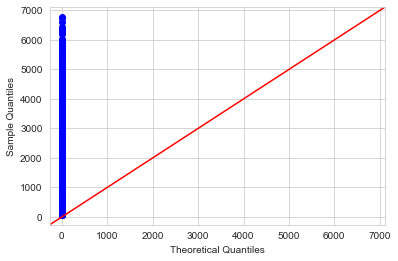

Supermarket Type3


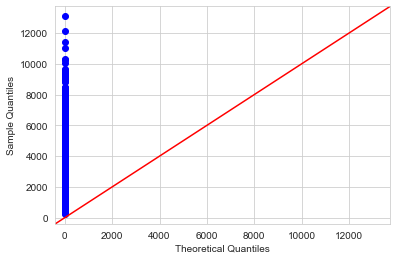

Grocery Store


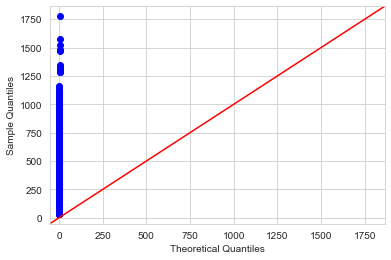

In [192]:
for item in list(dfFinal['Outlet_Type'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Outlet_Type']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot, dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal.

Uji Anderson

In [193]:
for item in list(dfFinal['Outlet_Type'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Outlet_Type']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Supermarket Type1
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 99.59276063209472}}
-----------------------------------------------------------
Supermarket Type2
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 21.70906274353615}}
-----------------------------------------------------------
Supermarket Type3
{'Anderson': {15.0: 0.574, 10.0: 0.653, 5.0: 0.784, 2.5: 0.914, 1.0: 1.087, 'Statistik': 10.18998941765301}}
-----------------------------------------------------------
Grocery Store
{'Anderson': {15.0: 0.574, 10.0: 0.654, 5.0: 0.784, 2.5: 0.915, 1.0: 1.088, 'Statistik': 39.72348264171819}}
-----------------------------------------------------------


Dari uji Anderson, dapat dilihat bahwa nilai Statistik lebih besar dari Critica Value pada signifikan level 5%. Dengan begitu, menerima H1 dan menolak H0. Artinya, bahwa **data tersebut tidak terdistribusi dengan normal.**

Uji Hipotesis

- H0: Tidak ada pengaruh signifikan antara Outlet_Type dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Outlet_Type dengan Item_Outlet_Sales

Signifikan level 5%

In [194]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Outlet_Type')

Source  ddof1            H  p-unc
Kruskal  Outlet_Type      3  2803.360888    0.0

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [195]:
dfpair3 = pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Outlet_Type', parametric=False)

In [196]:
dfpair3

Contrast                  A                  B  Paired  Parametric  \
0  Outlet_Type  Supermarket Type1  Supermarket Type2   False       False   
1  Outlet_Type  Supermarket Type1  Supermarket Type3   False       False   
2  Outlet_Type  Supermarket Type1      Grocery Store   False       False   
3  Outlet_Type  Supermarket Type2  Supermarket Type3   False       False   
4  Outlet_Type  Supermarket Type2      Grocery Store   False       False   
5  Outlet_Type  Supermarket Type3      Grocery Store   False       False   

       U-val       Tail          p-unc    hedges  
0  2917971.0  two-sided   4.536092e-10  0.214220  
1  1562234.5  two-sided   6.590529e-86 -0.851473  
2  5811453.0  two-sided   0.000000e+00  1.420341  
3   215572.5  two-sided   7.439913e-79 -0.946879  
4   946039.0  two-sided  7.447958e-256  1.734766  
5  1004444.5  two-sided   0.000000e+00  2.295248

Dari data dapat dilihat, P-Value lebih kecil dari Signifikan Level, yang artinya menerima H1 dan menolak H0, artinya **ada pengaruh signifikan antara Item_Outlet_Sales dan Outlet_Type.**

-------------------------------------------------------

**Outlet_Establishment_Year**

In [197]:
dfFinal['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Saya akan mengelompokan tahun dari Outlet menjadi 3 kelas, yaitu:
1. Outlet yang sudah beridri sejak tahun 1980-1990. (Kelas A)
2. Outlet yang sudah berdiri sejak tahun 1990-2000. (Kelas B)
3. Outlet yang telah berdiri sejak tahun 2000. (Kelas C)

In [198]:
def create_class(cols):
    if cols <= 1990:
        return 'Class A'
    if (cols <= 2000) & (cols >1990):
        return 'Class B'
    if cols > 2000:
        return 'Class C'

In [199]:
dfFinal['Class_Outlet_Per_Year']= dfFinal['Outlet_Establishment_Year'].apply(create_class)

In [200]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
0     Supermarket Type1          3735.1380               Food            FD   
1     Supermarket Type2           443.4228             Drinks            DR   
2     Supermarket Type1          2097.2700               Food            FD   
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
...                 ...                ...                ...           ...   
8518      Grocery Store           425.4462     Non-Consumable            NC   
8519      Grocery Store           159.7920               Food            FD   
8520      Grocery Store           431.4384             Drinks            DR   
8521      Grocery Store            45.2744               Food            FD   
8522      Grocery Store           424.7804               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year  
0                 A            15               Class B  
1                 C            01               Class C  
2                 N            15               Class B  
3                 D            19               Class A  
4                 P            36               Class C  
...             ...           ...                   ...  
8518              E            07               Class B  
8519              I            16               Class B  
8520              I            47               Class B  
8521              R            20               Class B  
8522              G            45      

In [201]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [202]:
dfFinal['Class_Outlet_Per_Year'].value_counts()

Class C    3713
Class B    2415
Class A    2395
Name: Class_Outlet_Per_Year, dtype: int64

Meninjau apakah Class_Outlet_Per_Year memiliki pengaruh signifikan terhadap Item_Outlet_Sales

Class B


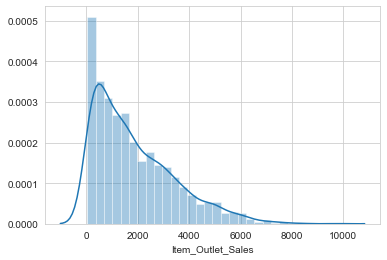

Class C


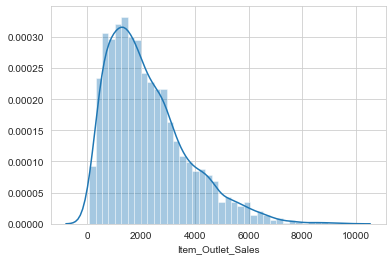

Class A


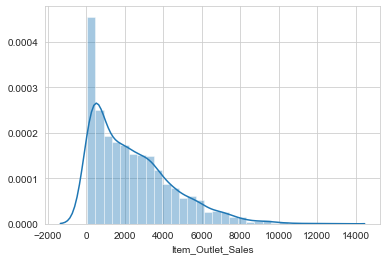

In [203]:
for item in list(dfFinal['Class_Outlet_Per_Year'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Class_Outlet_Per_Year']==item]['Item_Outlet_Sales'])
    plt.show()

Dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal. Untuk lebih meyakinkan, saya melakukan uji dengan QQPlot dan Uji Anderson.

QQPlot

Class B


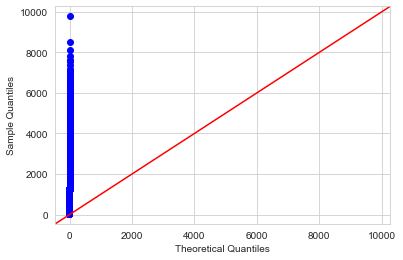

Class C


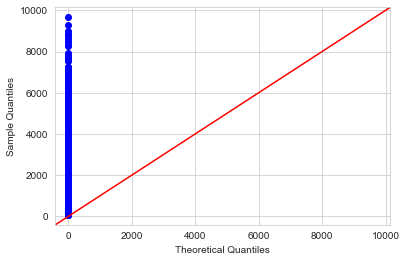

Class A


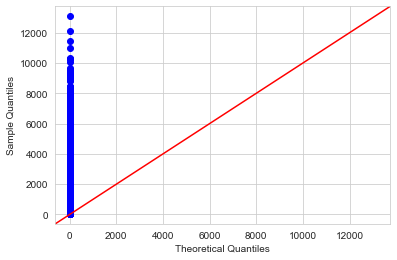

In [204]:
for item in list(dfFinal['Class_Outlet_Per_Year'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Class_Outlet_Per_Year']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Uji Anderson

In [205]:
for item in list(dfFinal['Class_Outlet_Per_Year'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Class_Outlet_Per_Year']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Class B
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.916, 1.0: 1.09, 'Statistik': 65.86563481513667}}
-----------------------------------------------------------
Class C
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 73.18843213120908}}
-----------------------------------------------------------
Class A
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.916, 1.0: 1.09, 'Statistik': 60.5415211979207}}
-----------------------------------------------------------


Dapat dilihat, bahwa nilai statistik lebih besar dibandingkan dengan critical value pada signifikan level 5%, maka dapat ditarik kesimpulan bahwa **data tersebut tidak terdistribusi dengan normal**.

Uji Hipotesis

- H0: Tidak ada pengaruh signifikan antara Class_Outlet_Per_Year dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Class_Outlet_Per_Year dengan Item_Outlet_Sales

Signifikan level 5%

In [206]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Class_Outlet_Per_Year')

Source  ddof1           H         p-unc
Kruskal  Class_Outlet_Per_Year      2  147.851134  7.843939e-33

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [207]:
pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Class_Outlet_Per_Year', parametric=False)

Contrast        A        B  Paired  Parametric      U-val  \
0  Class_Outlet_Per_Year  Class B  Class C   False       False  3639878.0   
1  Class_Outlet_Per_Year  Class B  Class A   False       False  2515207.5   
2  Class_Outlet_Per_Year  Class C  Class A   False       False  4569219.0   

        Tail         p-unc    hedges  
0  two-sided  1.157388e-35 -0.251475  
1  two-sided  5.123453e-15 -0.301217  
2  two-sided  6.775843e-02 -0.097522

Dari data dapat dilihat, P-Value lebih kecil dari Signifikan Level, yang artinya menerima H1 dan menolak H0, artinya **ada pengaruh signifikan antara Item_Outlet_Sales dan Class_Outlet_Per_Year.**

---------------------------------

**Item_Weight**

In [208]:
dfFinal.sort_values(by=['Item_Weight'])

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1909           FDP40        4.555          Regular         0.034351   
2411           FDP40        4.555          Regular         0.034411   
4263           FDP40        4.555          Regular         0.034329   
2427           FDP40        4.555          Regular         0.034357   
1680           DRE12        4.590          Low Fat         0.070767   
...              ...          ...              ...              ...   
1275           FDC02       21.350          Low Fat         0.068809   
1530           FDC02       21.350          Low Fat         0.068765   
3496           FDR07       21.350          Low Fat         0.078061   
28             FDC02       21.350          Low Fat         0.069103   
2451           FDC02       21.350          Low Fat         0.068822   

                  Item_Type  Item_MRP Outlet_Identifier  \
1909           Frozen Foods  112.7544            OUT035   
2411           Frozen Foods  111.3544            OUT049   
4263           Frozen Foods  110.1544            OUT013   
2427           Frozen Foods  112.6544            OUT046   
1680            Soft Drinks  111.9860            OUT035   
...                     ...       ...               ...   
1275                 Canned  258.5278            OUT035   
1530                 Canned  260.4278            OUT013   
3496  Fruits and Vegetables   96.0094            OUT018   
28                   Canned  259.9278            OUT018   
2451                 Canned  258.3278            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1909                       2004       Small               Tier 2   
2411                       1999      Medium               Tier 1   
4263                       1987        High               Tier 3   
2427                       1997       Small               Tier 1   
1680                       2004       Small               Tier 2   
...                         ...         ...                  ...   
1275                       2004       Small               Tier 2   
1530                       1987        High               Tier 3   
3496                       2009      Medium               Tier 3   
28                         2009      Medium               Tier 3   
2451                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
1909  Supermarket Type1          1789.6704               Food            FD   
2411  Supermarket Type1          1342.2528               Food            FD   
4263  Supermarket Type1          1230.3984               Food            FD   
2427  Supermarket Type1          2684.5056               Food            FD   
1680  Supermarket Type1           792.3020             Drinks            DR   
...                 ...                ...                ...           ...   
1275  Supermarket Type1          5206.5560               Food            FD   
1530  Supermarket Type1          3644.5892               Food            FD   
3496  Supermarket Type2           380.8376               Food            FD   
28    Supermarket Type2          6768.5228               Food            FD   
2451  Supermarket Type1          7028.8506               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year  
1909              P            40               Class C  
2411              P            40               Class B  
4263              P            40               Class A  
2427              P            40               Class B  
1680              E            12               Class C  
...             ...           ...                   ...  
1275              C            02               Class C  
1530              C            02               Class A  
3496              R            07               Class C  
28                C            02               Class C  
2451              C            02      

Saya akan mengelompokan Item_Weight menjadi 4 kelas, yaitu:
1. Produk yang memiliki berat lebih dari 20 satuan. (Extra Heavy)
2. Produk yang memiliki berat antara 10-20 satuan. (Heavy)
3. Produk yang memiliki berat antara 5-10 satuan. (Medium)
4. Produk yang memiliki berat dibawah 5 satuan. (Light)

In [209]:
def create_class_weight(cols):
    if cols <= 5:
        return 'Light'
    if (cols <= 10) & (cols >5):
        return 'Medium'
    if (cols <= 20) & (cols >10):
        return 'Heavy'
    if cols > 20:
        return 'Extra Heavy'

In [210]:
dfFinal['Class_Item_Weight']= dfFinal['Item_Weight'].apply(create_class_weight)

In [211]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.000000   
4              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.000000   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
0     Supermarket Type1          3735.1380               Food            FD   
1     Supermarket Type2           443.4228             Drinks            DR   
2     Supermarket Type1          2097.2700               Food            FD   
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
...                 ...                ...                ...           ...   
8518      Grocery Store           425.4462     Non-Consumable            NC   
8519      Grocery Store           159.7920               Food            FD   
8520      Grocery Store           431.4384             Drinks            DR   
8521      Grocery Store            45.2744               Food            FD   
8522      Grocery Store           424.7804               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  
0                 A            15               Class B            Medium  
1                 C            01               Class C            Medium  
2                 N            15               Class B             Heavy  
3                 D            19               Class A            Medium  
4                 P            36               Class C             Heavy  
...             ...           ...                   ...               ...  
8518              E            07               Class B            Medium  
8519              I            16               Class B             H

In [212]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [213]:
dfFinal['Class_Item_Weight'].value_counts()

Heavy          5644
Medium         2371
Extra Heavy     459
Light            49
Name: Class_Item_Weight, dtype: int64

Medium


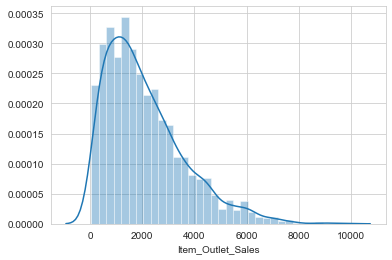

Heavy


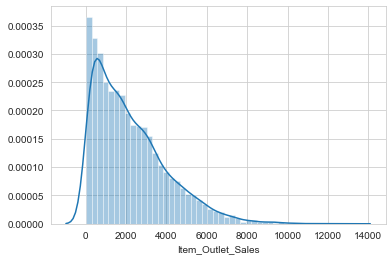

Extra Heavy


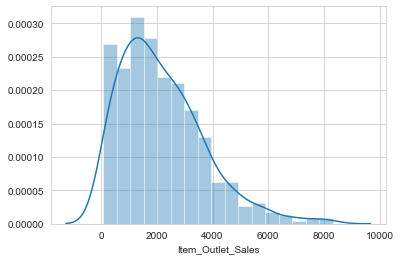

Light


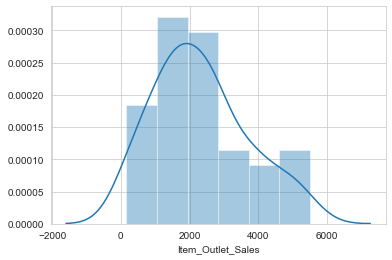

In [214]:
for item in list(dfFinal['Class_Item_Weight'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Class_Item_Weight']==item]['Item_Outlet_Sales'])
    plt.show()

Apabila dilihat dari analisis grafik, hanya light yang tergolong distribusi normal, namun data lainnya tidak terdistribusi dengan normal. Untuk lebih meyakinkan, saya melakukan uji dengan QQPlot dan Uji Anderson.

QQPlot

Medium


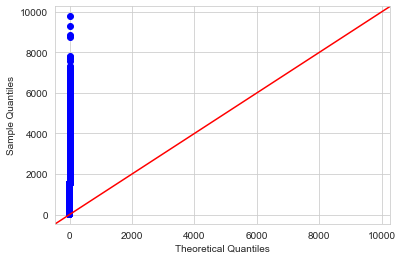

Heavy


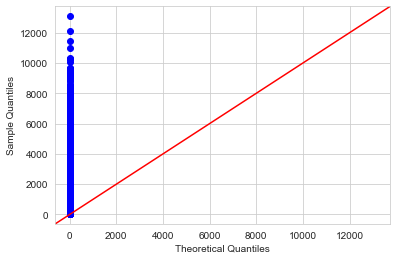

Extra Heavy


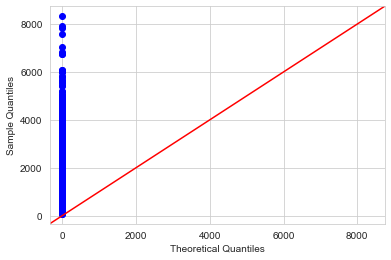

Light


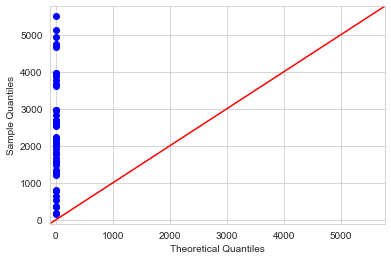

In [215]:
for item in list(dfFinal['Class_Item_Weight'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Class_Item_Weight']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal.

Uji Anderson

In [216]:
for item in list(dfFinal['Class_Item_Weight'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Class_Item_Weight']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Medium
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.916, 1.0: 1.09, 'Statistik': 49.43484958441377}}
-----------------------------------------------------------
Heavy
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 129.63527775864713}}
-----------------------------------------------------------
Extra Heavy
{'Anderson': {15.0: 0.571, 10.0: 0.65, 5.0: 0.78, 2.5: 0.91, 1.0: 1.083, 'Statistik': 6.565992522832516}}
-----------------------------------------------------------
Light
{'Anderson': {15.0: 0.538, 10.0: 0.612, 5.0: 0.735, 2.5: 0.857, 1.0: 1.019, 'Statistik': 0.5316951065884723}}
-----------------------------------------------------------


Dapat dilihat, 3 data memiliki nilai statistik lebih besar dibandingkan dengan critical value pada signifikan level 5%, maka dapat ditarik kesimpulan bahwa **data tersebut tidak terdistribusi dengan normal**, sedangkan data Class_Item_Weight kelas Light terdistribusi dengan normal. Karena terdapat 3 data yang tidak terdistribusi dengan normal, maka saya menggunakan test hipotesis non parametric.

Uji Hipotesis

- H0: Tidak ada pengaruh signifikan antara Class_Outlet_Per_Year dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Class_Outlet_Per_Year dengan Item_Outlet_Sales

Signifikan level 5%

In [217]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Class_Item_Weight')

Source  ddof1         H     p-unc
Kruskal  Class_Item_Weight      3  4.161522  0.244543

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [218]:
pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Class_Item_Weight', parametric=False)

Contrast            A            B  Paired  Parametric      U-val  \
0  Class_Item_Weight       Medium        Heavy   False       False  6606031.0   
1  Class_Item_Weight       Medium  Extra Heavy   False       False   517880.0   
2  Class_Item_Weight       Medium        Light   False       False    50136.0   
3  Class_Item_Weight        Heavy  Extra Heavy   False       False  1259570.5   
4  Class_Item_Weight        Heavy        Light   False       False   124126.0   
5  Class_Item_Weight  Extra Heavy        Light   False       False    10261.0   

        Tail     p-unc    hedges  
0  two-sided  0.369031 -0.083203  
1  two-sided  0.101189 -0.067749  
2  two-sided  0.100443 -0.157039  
3  two-sided  0.325021  0.022438  
4  two-sided  0.216697 -0.053236  
5  two-sided  0.313719 -0.089230

Dari data tersebut, dapat kita ambil kesimpulan bahwa nilai P-Value lebih besar dibandingkan Signifikan level, maka menerima H0 dan menolak H1, artinya **tidak ada pengaruh signifikan antara Class_Item_Weight dengan Item_Outlet_Sales.**

-------------------------------

**Item_Visibility**

In [219]:
dfFinal['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072411      2
0.107224      2
0.056191      2
           ... 
0.052853      1
0.042113      1
0.029565      1
0.066447      1
0.071301      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [220]:
dfFinal[dfFinal['Item_Visibility']<=0]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              NCD19        8.930          Low Fat              0.0   
4              FDP36       10.395          Regular              0.0   
6              FDY07       11.800          Low Fat              0.0   
21             FDP33       18.700          Low Fat              0.0   
37             FDM20       10.000          Low Fat              0.0   
...              ...          ...              ...              ...   
8438           FDZ08       12.500          Regular              0.0   
8463           FDK56        9.695          Low Fat              0.0   
8465           DRK37        5.000          Low Fat              0.0   
8484           FDT13       14.850          Low Fat              0.0   
8521           FDR20       20.000          Regular              0.0   

                  Item_Type  Item_MRP Outlet_Identifier  \
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
6     Fruits and Vegetables   45.5402            OUT049   
21              Snack Foods  256.6672            OUT018   
37    Fruits and Vegetables  246.9144            OUT018   
...                     ...       ...               ...   
8438  Fruits and Vegetables   80.8592            OUT010   
8463  Fruits and Vegetables  186.7898            OUT010   
8465            Soft Drinks  190.4530            OUT010   
8484                 Canned  187.7214            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
6                          1999      Medium               Tier 1   
21                         2009      Medium               Tier 3   
37                         2009      Medium               Tier 3   
...                         ...         ...                  ...   
8438                       1998      Medium               Tier 3   
8463                       1998      Medium               Tier 3   
8465                       1998      Medium               Tier 3   
8484                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
6     Supermarket Type1          1516.0266               Food            FD   
21    Supermarket Type2          3068.0064               Food            FD   
37    Supermarket Type2          3185.1872               Food            FD   
...                 ...                ...                ...           ...   
8438      Grocery Store            82.5592               Food            FD   
8463      Grocery Store           561.2694               Food            FD   
8465      Grocery Store           379.5060             Drinks            DR   
8484      Grocery Store           188.4214               Food            FD   
8521      Grocery Store            45.2744               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  
3                 D            19               Class A            Medium  
4                 P            36               Class C             Heavy  
6                 Y            07               Class B             Heavy  
21                P            33               Class C             Heavy  
37                M            20               Class C            Medium  
...             ...           ...                   ...               ...  
8438              Z            08               Class B             Heavy  
8463              K            56               Class B            Me

Ada sekitar 526 data dari 8523 data (6%) yang memiliki nilai item visibility 0. 

In [221]:
dfVisbilityNull = (dfFinal['Item_Visibility'] == 0)
dfVisbilityNull

0       False
1       False
2       False
3        True
4        True
        ...  
8518    False
8519    False
8520    False
8521     True
8522    False
Name: Item_Visibility, Length: 8523, dtype: bool

In [222]:
visibility_avg = dfFinal.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg

Item_Visibility
Item_Identifier                 
DRA12                   0.031956
DRA24                   0.048062
DRA59                   0.134718
DRB01                   0.082126
DRB13                   0.008002
...                          ...
NCZ30                   0.024956
NCZ41                   0.051623
NCZ42                   0.009044
NCZ53                   0.027775
NCZ54                   0.080426

[1559 rows x 1 columns]

In [223]:
dfFinal.loc[dfVisbilityNull,'Item_Identifier']

3       NCD19
4       FDP36
6       FDY07
21      FDP33
37      FDM20
        ...  
8438    FDZ08
8463    FDK56
8465    DRK37
8484    FDT13
8521    FDR20
Name: Item_Identifier, Length: 526, dtype: object

In [224]:
dfFinal.loc[dfVisbilityNull,'Item_Visibility'] = dfFinal.loc[dfVisbilityNull,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [225]:
dfFinal[['Item_Visibility']].sort_values(by=['Item_Visibility'])

Item_Visibility
4679         0.003575
2114         0.003589
4078         0.003598
7110         0.003599
1279         0.003607
...               ...
8148         0.309390
8443         0.311090
5796         0.321115
6014         0.325781
4808         0.328391

[8523 rows x 1 columns]

Saya akan membagi item visibility menjadi 3 kelompok, yaitu:
1. Item_Visibility antara 0-0.15 (Low)
2. Item_Visibility antara 0.15-0.25 (Intermediate)
3. Item_Visibility diatas 0.25 (High)

In [226]:
def create_class_visibility(cols):
    if cols <= 0.15:
        return 'Low'
    if (cols <= 0.25) & (cols > 0.15):
        return 'Intermediate'
    if cols > 0.25:
        return 'High'

In [227]:
dfFinal['Class_Item_Visibility']= dfFinal['Item_Visibility'].apply(create_class_visibility)

In [228]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
0     Supermarket Type1          3735.1380               Food            FD   
1     Supermarket Type2           443.4228             Drinks            DR   
2     Supermarket Type1          2097.2700               Food            FD   
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
...                 ...                ...                ...           ...   
8518      Grocery Store           425.4462     Non-Consumable            NC   
8519      Grocery Store           159.7920               Food            FD   
8520      Grocery Store           431.4384             Drinks            DR   
8521      Grocery Store            45.2744               Food            FD   
8522      Grocery Store           424.7804               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0                 A            15               Class B            Medium   
1                 C            01               Class C            Medium   
2                 N            15               Class B             Heavy   
3                 D            19               Class A            Medium   
4                 P            36               Class C             Heavy   
...             ...           ...                   ...               ...   
8518              E            07               Class B            Medium   
8519              I            16               Class B      

In [229]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [230]:
dfFinal['Class_Item_Visibility'].value_counts()

Low             7862
Intermediate     606
High              55
Name: Class_Item_Visibility, dtype: int64

Meninjau apakah terdapat hubungan signifikan antara Class_Item_Visibility dengan Item_Outlet_Sales

Low


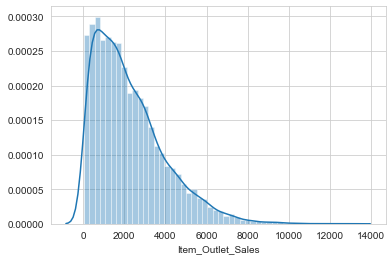

Intermediate


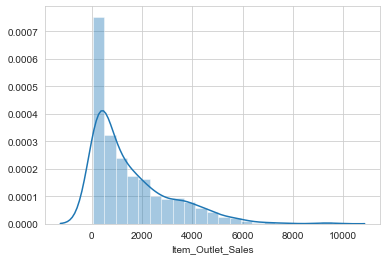

High


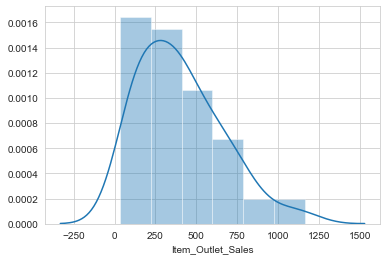

In [231]:
for item in list(dfFinal['Class_Item_Visibility'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Class_Item_Visibility']==item]['Item_Outlet_Sales'])
    plt.show()

Dari analisis grafik, dapat disimpulkan bahwa data tersebut tidak terdistribusi dengan normal. Untuk lebih meyakinkan, saya akan melakukan uji dengan QQPlot dan Uji Anderson. 

QQPlot

Low


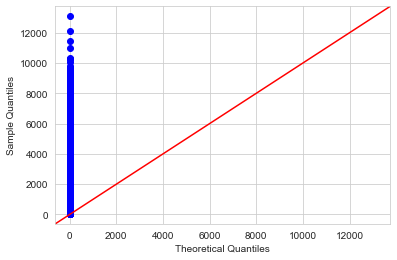

Intermediate


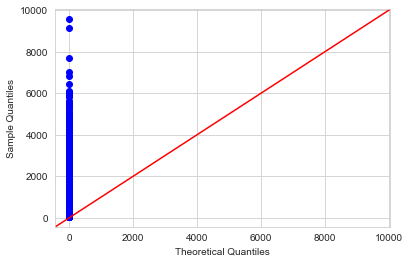

High


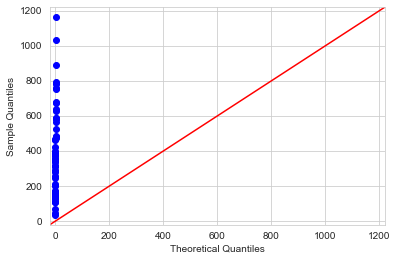

In [232]:
for item in list(dfFinal['Class_Item_Visibility'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Class_Item_Visibility']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot, dapat dilihat data tidak terdistribusi dengan normal.

Uji Anderson

In [233]:
for item in list(dfFinal['Class_Item_Visibility'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Class_Item_Visibility']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Low
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.091, 'Statistik': 163.17535770591985}}
-----------------------------------------------------------
Intermediate
{'Anderson': {15.0: 0.572, 10.0: 0.652, 5.0: 0.782, 2.5: 0.912, 1.0: 1.085, 'Statistik': 30.25497570167795}}
-----------------------------------------------------------
High
{'Anderson': {15.0: 0.541, 10.0: 0.616, 5.0: 0.739, 2.5: 0.862, 1.0: 1.026, 'Statistik': 0.847908217241141}}
-----------------------------------------------------------


Dari data dapat dilihat bahwa nilai statistik lebih besar dibndingkan Critical Value, maka menerima H1 dan menolak H0, yang artinya **data tersebbut tidak terdistribusi dengan normal.**

Uji Hipotesis

- H0: Tidak ada pengaruh signifikan antara Class_Item_Visibility dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Class_Item_Visibility dengan Item_Outlet_Sales

Signifikan level 5%

In [234]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Class_Item_Visibility')

Source  ddof1           H         p-unc
Kruskal  Class_Item_Visibility      2  237.608877  2.534475e-52

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [235]:
pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Class_Item_Visibility', parametric=False)

Contrast             A             B  Paired  Parametric  \
0  Class_Item_Visibility           Low  Intermediate   False       False   
1  Class_Item_Visibility           Low          High   False       False   
2  Class_Item_Visibility  Intermediate          High   False       False   

       U-val       Tail         p-unc    hedges  
0  3065785.0  two-sided  4.453752e-32  0.403518  
1   388586.0  two-sided  1.878564e-24  1.082803  
2    24792.0  two-sided  2.059365e-09  0.766444

Dari data tersebut, dapat kita ambil kesimpulan bahwa nilai P-Value lebih kecil dibandingkan Signifikan level, maka menerima H1 dan menolak H0, artinya **ada pengaruh signifikan antara Class_Item_Visibility dengan Item_Outlet_Sales.**

-------------------

**Item_MRP**

In [236]:
dfFinal.sort_values(by=['Item_MRP'], ascending= False)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7185           FDS13        6.465          Low Fat         0.125210   
3213           FDR25       17.000          Regular         0.139522   
2887           NCS29        9.000          Low Fat         0.069488   
8236           FDK51       19.850          Low Fat         0.008763   
4853           FDS13       12.150          Low Fat         0.217994   
...              ...          ...              ...              ...   
5053           FDG40       12.850          Low Fat         0.039631   
1080           FDX59       10.195          Low Fat         0.051618   
1149           DRK12        9.500          Low Fat         0.042057   
3813           DRK12        9.500          Low Fat         0.041851   
5179           DRK12       11.800          Low Fat         0.041683   

               Item_Type  Item_MRP Outlet_Identifier  \
7185              Canned  266.8884            OUT017   
3213              Canned  266.8884            OUT046   
2887  Health and Hygiene  266.6884            OUT013   
8236               Dairy  266.6884            OUT010   
4853              Canned  266.5884            OUT019   
...                  ...       ...               ...   
5053        Frozen Foods   31.9558            OUT027   
1080              Breads   31.9558            OUT013   
1149         Soft Drinks   31.8900            OUT018   
3813         Soft Drinks   31.4900            OUT013   
5179         Soft Drinks   31.2900            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7185                       2007       Small               Tier 2   
3213                       1997       Small               Tier 1   
2887                       1987        High               Tier 3   
8236                       1998      Medium               Tier 3   
4853                       1985       Small               Tier 1   
...                         ...         ...                  ...   
5053                       1985      Medium               Tier 3   
1080                       1987        High               Tier 3   
1149                       2009      Medium               Tier 3   
3813                       1987        High               Tier 3   
5179                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
7185  Supermarket Type1          1059.9536               Food            FD   
3213  Supermarket Type1          5034.7796               Food            FD   
2887  Supermarket Type1          3974.8260     Non-Consumable            NC   
8236      Grocery Store           264.9884               Food            FD   
4853      Grocery Store          1324.9420               Food            FD   
...                 ...                ...                ...           ...   
5053  Supermarket Type3           984.7182               Food            FD   
1080  Supermarket Type1           373.5138               Food            FD   
1149  Supermarket Type2           366.1900             Drinks            DR   
3813  Supermarket Type1           466.0600             Drinks            DR   
5179  Supermarket Type3           898.8300             Drinks            DR   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
7185              S            13               Class C            Medium   
3213              R            25               Class B             Heavy   
2887              S            29               Class A            Medium   
8236              K            51               Class B             Heavy   
4853              S            13               Class A             Heavy   
...             ...           ...                   ...               ...   
5053              G            40               Class A             Heavy   
1080              X            59               Class A             Heavy   
1149              K 

In [237]:
dfFinal[dfFinal['Item_Identifier']=='FDS13']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
1079           FDS13        6.465          Low Fat         0.132181    Canned   
2035           FDS13        6.465          Low Fat         0.124403    Canned   
2882           FDS13        6.465          Low Fat         0.124506    Canned   
4853           FDS13       12.150          Low Fat         0.217994    Canned   
7185           FDS13        6.465          Low Fat         0.125210    Canned   
7312           FDS13        6.465          Low Fat         0.124759    Canned   
8409           FDS13        6.465          Low Fat         0.208398    Canned   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
1079  263.1884            OUT018                       2009      Medium   
2035  266.1884            OUT013                       1987        High   
2882  264.7884            OUT046                       1997       Small   
4853  266.5884            OUT019                       1985       Small   
7185  266.8884            OUT017                       2007       Small   
7312  264.1884            OUT045                       2002       Small   
8409  265.2884            OUT010                       1998      Medium   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
1079               Tier 3  Supermarket Type2          2914.8724   
2035               Tier 3  Supermarket Type1          5299.7680   
2882               Tier 1  Supermarket Type1          3709.8376   
4853               Tier 1      Grocery Store          1324.9420   
7185               Tier 2  Supermarket Type1          1059.9536   
7312               Tier 2  Supermarket Type1          3444.8492   
8409               Tier 3      Grocery Store           264.9884   

     Item_Type_Combined Id_Item_First Id_Item_Second Id_Item_Third  \
1079               Food            FD              S            13   
2035               Food            FD              S            13   
2882               Food            FD              S            13   
4853               Food            FD              S            13   
7185               Food            FD              S            13   
7312               Food            FD              S            13   
8409               Food            FD              S            13   

     Class_Outlet_Per_Year Class_Item_Weight Class_Item_Visibility  
1079               Class C            Medium                   Low  
2035               Class A            Medium                   Low  
2882               Class B            Medium                   Low  
4853               Class A             Heavy          Intermediate  
7185               Class C            Medium                   Low  
7312               Class C            Medium                   Low  
8409               Class B            Medium          Intermediate

In [238]:
dfFinal[dfFinal['Item_MRP'] > dfFinal['Item_Outlet_Sales']]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4658           DRP35       10.100          Low Fat         0.159097   
4678           DRO59       10.100          Low Fat         0.094817   
4689           FDW24       11.650          Low Fat         0.065652   
4698           FDZ12       11.650          Low Fat         0.097462   
4712           FDQ36       11.650          Regular         0.115694   
...              ...          ...              ...              ...   
8502           FDX23        6.445          Low Fat         0.049698   
8503           FDL33        7.235          Low Fat         0.167317   
8507           DRH59       10.800          Low Fat         0.097806   
8515           FDA19        7.520          Low Fat         0.092272   
8521           FDR20       20.000          Regular         0.023498   

                  Item_Type  Item_MRP Outlet_Identifier  \
4658            Hard Drinks  129.3336            OUT019   
4678            Hard Drinks   77.9012            OUT019   
4689           Baking Goods   48.9034            OUT019   
4698           Baking Goods  144.8470            OUT019   
4712           Baking Goods   38.1848            OUT019   
...                     ...       ...               ...   
8502           Baking Goods   95.0436            OUT010   
8503            Snack Foods  197.5452            OUT010   
8507            Hard Drinks   73.9380            OUT010   
8515  Fruits and Vegetables  128.7994            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
4658                       1985       Small               Tier 1   
4678                       1985       Small               Tier 1   
4689                       1985       Small               Tier 1   
4698                       1985       Small               Tier 1   
4712                       1985       Small               Tier 1   
...                         ...         ...                  ...   
8502                       1998      Medium               Tier 3   
8503                       1998      Medium               Tier 3   
8507                       1998      Medium               Tier 3   
8515                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   

        Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
4658  Grocery Store           127.8336             Drinks            DR   
4678  Grocery Store            75.9012             Drinks            DR   
4689  Grocery Store            48.6034               Food            FD   
4698  Grocery Store           143.1470               Food            FD   
4712  Grocery Store            37.2848               Food            FD   
...             ...                ...                ...           ...   
8502  Grocery Store            94.5436               Food            FD   
8503  Grocery Store           195.7452               Food            FD   
8507  Grocery Store            73.2380             Drinks            DR   
8515  Grocery Store           128.4994               Food            FD   
8521  Grocery Store            45.2744               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
4658              P            35               Class A             Heavy   
4678              O            59               Class A             Heavy   
4689              W            24               Class A             Heavy   
4698              Z            12               Class A             Heavy   
4712              Q            36               Class A             Heavy   
...             ...           ...                   ...               ...   
8502              X            23               Class B            Medium   
8503              L            33               Class B            Medium   
8507              H            5

Dapat dilihat, bahwa Item_MRP bukan lah harga pasti dari produk tersebut. Saya akan mencoba menghitung jumlah item yang terjual dari masing-masing item, dengan berasumsi bahwa harga yang dijual tidak akan memiliki rentang yang jauh dari feature Item_MRP

In [239]:
dfFinal['Item_Sales'] = round(dfFinal['Item_Outlet_Sales']/dfFinal['Item_MRP'])

In [240]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1987        High               Tier 3   
4                          2009      Medium               Tier 3   
...                         ...         ...                  ...   
8518                       1998      Medium               Tier 3   
8519                       1998      Medium               Tier 3   
8520                       1998      Medium               Tier 3   
8521                       1998      Medium               Tier 3   
8522                       1998      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales Item_Type_Combined Id_Item_First  \
0     Supermarket Type1          3735.1380               Food            FD   
1     Supermarket Type2           443.4228             Drinks            DR   
2     Supermarket Type1          2097.2700               Food            FD   
3     Supermarket Type1           994.7052     Non-Consumable            NC   
4     Supermarket Type2           556.6088               Food            FD   
...                 ...                ...                ...           ...   
8518      Grocery Store           425.4462     Non-Consumable            NC   
8519      Grocery Store           159.7920               Food            FD   
8520      Grocery Store           431.4384             Drinks            DR   
8521      Grocery Store            45.2744               Food            FD   
8522      Grocery Store           424.7804               Food            FD   

     Id_Item_Second Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0                 A            15               Class B            Medium   
1                 C            01               Class C            Medium   
2                 N            15               Class B             Heavy   
3                 D            19               Class A            Medium   
4                 P            36               Class C             Heavy   
...             ...           ...                   ...               ...   
8518              E            07               Class B            Medium   
8519              I            16               Class B      

In [241]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [242]:
dfFinal['Item_Sales'].value_counts()

15.0    409
2.0     403
14.0    384
12.0    384
16.0    375
17.0    373
13.0    363
19.0    349
11.0    338
1.0     324
18.0    318
10.0    303
3.0     303
21.0    278
20.0    278
9.0     275
22.0    245
23.0    239
8.0     238
7.0     213
6.0     211
24.0    202
4.0     201
25.0    182
26.0    180
5.0     162
28.0    146
27.0    146
29.0    109
30.0     95
31.0     72
32.0     62
33.0     57
34.0     45
35.0     43
36.0     35
38.0     31
37.0     24
39.0     22
40.0     17
41.0     14
45.0     13
43.0     12
42.0     12
44.0     11
46.0      7
50.0      6
47.0      3
48.0      3
49.0      2
57.0      2
51.0      2
56.0      1
55.0      1
Name: Item_Sales, dtype: int64

In [243]:
item7= dfFinal.groupby(['Item_Identifier']).sum()
item7.sort_values(by=['Item_Sales'],ascending=False)

Item_Weight  Item_Visibility   Item_MRP  \
Item_Identifier                                            
NCL31                 80.730         1.173740  1288.2230   
FDO19                154.700         0.159984   436.2306   
FDL34                125.150         0.327872  1131.9968   
FDW13                 92.300         1.119029   513.1240   
FDJ21                113.350         0.269992  1019.1714   
...                      ...              ...        ...   
FDT35                 19.850         0.081916   167.6816   
NCR42                 27.315         0.141670   101.0700   
DRF48                  5.730         0.051907   188.1898   
FDY43                 14.850         0.098803   169.7474   
FDQ60                 11.650         0.191501   121.2098   

                 Outlet_Establishment_Year  Item_Outlet_Sales  Item_Sales  
Item_Identifier                                                            
NCL31                                17975         26339.0480       183.0  
FDO19                                17988          8845.8188       183.0  
FDL34                                15990         25124.6288       178.0  
FDW13                                19973          9192.0348       176.0  
FDJ21                                13986         25225.1646       173.0  
...                                    ...                ...         ...  
FDT35                                 2007          1845.5976        11.0  
NCR42                                 6007           332.9000        10.0  
DRF48                                 2002          1496.7184         8.0  
FDY43                                 2009           673.7896         4.0  
FDQ60                                 1985           120.5098         1.0  

[1559 rows x 6 columns]

Dapat dilihat, bahwa produk paling banyak terjual adalah *NCL31* dan *FDO19*.

In [244]:
item7= dfFinal.groupby(['Item_Identifier']).mean()
item7.sort_values(by=['Item_MRP'],ascending=False)

Item_Weight  Item_Visibility    Item_MRP  \
Item_Identifier                                             
FDR25              16.030000         0.139715  265.468400   
NCS29              10.050000         0.078264  265.455067   
FDK51              18.921429         0.005740  265.416971   
FDS13               7.277143         0.151064  265.302686   
FDL58               5.780000         0.080085  263.956800   
...                      ...              ...         ...   
FDV28              15.635714         0.173993   33.998657   
NCR42               9.105000         0.047223   33.690000   
FDX59              10.276000         0.051666   33.655800   
FDG40              13.450000         0.046541   32.980800   
DRK12               9.787500         0.041276   32.315000   

                 Outlet_Establishment_Year  Item_Outlet_Sales  Item_Sales  
Item_Identifier                                                            
FDR25                          2000.000000        3868.830640   14.600000  
NCS29                          1994.500000        3533.178667   13.333333  
FDK51                          1996.714286        3709.837600   14.000000  
FDS13                          1997.857143        2574.173029    9.714286  
FDL58                          2000.375000        3823.023600   14.500000  
...                                    ...                ...         ...  
FDV28                          1998.142857         480.232029   14.285714  
NCR42                          2002.333333         110.966667    3.333333  
FDX59                          1996.000000         577.248600   17.400000  
FDG40                          1996.750000         577.248600   17.750000  
DRK12                          1998.875000         491.027500   15.250000  

[1559 rows x 6 columns]

In [245]:
item7=dfFinal.pivot_table(values='Item_MRP', index='Item_Identifier',aggfunc='mean')
item7.sort_values(by='Item_MRP',ascending=False)

Item_MRP
Item_Identifier            
FDR25            265.468400
NCS29            265.455067
FDK51            265.416971
FDS13            265.302686
FDL58            263.956800
...                     ...
FDV28             33.998657
NCR42             33.690000
FDX59             33.655800
FDG40             32.980800
DRK12             32.315000

[1559 rows x 1 columns]

In [246]:
dfFinal['Item_MRP_AVG'] = 1

In [247]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Item_Outlet_Sales  Item_Type_Combined Id_Item_First Id_Item_Second  \
0            3735.1380                Food            FD              A   
1             443.4228              Drinks            DR              C   
2            2097.2700                Food            FD              N   
3             994.7052      Non-Consumable            NC              D   
4             556.6088                Food            FD              P   
...                ...                 ...           ...            ...   
8518          425.4462      Non-Consumable            NC              E   
8519          159.7920                Food            FD              I   
8520          431.4384              Drinks            DR              I   
8521           45.2744                Food            FD              R   
8522          424.7804                Food            FD              G   

     Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0               15               Class B            Medium   
1               01               Class C            Medium   
2               15               Class B             Heavy   
3               19               Class A            Medium   
4               36               Class C             Heavy   
...            ...                   ...               ...   
8518            07               Class B            Medium   
8519            16               Class B             Heavy   
8520            47               Class B             Heavy   
8521            20               Class B     

In [248]:
coba = dfFinal['Item_MRP_AVG']==1
coba

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Name: Item_MRP_AVG, Length: 8523, dtype: bool

In [249]:
dfFinal.loc[coba,'Item_MRP_AVG'] = dfFinal.loc[coba,'Item_Identifier'].apply(lambda x: item7.at[x, 'Item_MRP'])

In [250]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Item_Outlet_Sales  Item_Type_Combined Id_Item_First Id_Item_Second  \
0            3735.1380                Food            FD              A   
1             443.4228              Drinks            DR              C   
2            2097.2700                Food            FD              N   
3             994.7052      Non-Consumable            NC              D   
4             556.6088                Food            FD              P   
...                ...                 ...           ...            ...   
8518          425.4462      Non-Consumable            NC              E   
8519          159.7920                Food            FD              I   
8520          431.4384              Drinks            DR              I   
8521           45.2744                Food            FD              R   
8522          424.7804                Food            FD              G   

     Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0               15               Class B            Medium   
1               01               Class C            Medium   
2               15               Class B             Heavy   
3               19               Class A            Medium   
4               36               Class C             Heavy   
...            ...                   ...               ...   
8518            07               Class B            Medium   
8519            16               Class B             Heavy   
8520            47               Class B             Heavy   
8521            20               Class B     

Dari data, saya juga akan menambahkan fitur Item_Sales_AVG

In [251]:
item8=dfFinal.pivot_table(values='Item_Sales', index='Item_Identifier',aggfunc='mean')
item8.sort_values(by='Item_Sales',ascending=False)

Item_Sales
Item_Identifier            
FDE52             39.000000
FDU09             39.000000
FDK57             37.000000
NCV18             34.000000
FDZ50             30.000000
...                     ...
NCD43              4.750000
FDY43              4.000000
FDY09              4.000000
NCR42              3.333333
FDQ60              1.000000

[1559 rows x 1 columns]

In [252]:
dfFinal['Item_Sales_AVG'] = 1

In [253]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Item_Type_Combined  Id_Item_First Id_Item_Second Id_Item_Third  \
0                  Food             FD              A            15   
1                Drinks             DR              C            01   
2                  Food             FD              N            15   
3        Non-Consumable             NC              D            19   
4                  Food             FD              P            36   
...                 ...            ...            ...           ...   
8518     Non-Consumable             NC              E            07   
8519               Food             FD              I            16   
8520             Drinks             DR              I            47   
8521               Food             FD              R            20   
8522               Food             FD              G            45   

     Class_Outlet_Per_Year Class_Item_Weight Class_Item_Visibility Item_Sales  \
0                  Class B            Medium                   Low       15.0   
1                  Class C            Medium                   Low        9.0   
2                  Class B             Heavy                   Low       15.0   
3                  Class A            Medium                   Low       18.0   
4                  Class C             Heavy                   Low       11.0   
...                    ...               ...                   ...        ...   
8518               Class B            Medium                   Low        3.0   
8519               Class B             Heavy          Intermediat

In [254]:
coba2 = dfFinal['Item_Sales_AVG']==1
coba2

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Name: Item_Sales_AVG, Length: 8523, dtype: bool

In [255]:
dfFinal.loc[coba2,'Item_Sales_AVG'] = dfFinal.loc[coba2,'Item_Identifier'].apply(lambda x: item8.at[x, 'Item_Sales'])

In [256]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Item_Type_Combined  Id_Item_First Id_Item_Second Id_Item_Third  \
0                  Food             FD              A            15   
1                Drinks             DR              C            01   
2                  Food             FD              N            15   
3        Non-Consumable             NC              D            19   
4                  Food             FD              P            36   
...                 ...            ...            ...           ...   
8518     Non-Consumable             NC              E            07   
8519               Food             FD              I            16   
8520             Drinks             DR              I            47   
8521               Food             FD              R            20   
8522               Food             FD              G            45   

     Class_Outlet_Per_Year Class_Item_Weight Class_Item_Visibility Item_Sales  \
0                  Class B            Medium                   Low       15.0   
1                  Class C            Medium                   Low        9.0   
2                  Class B             Heavy                   Low       15.0   
3                  Class A            Medium                   Low       18.0   
4                  Class C             Heavy                   Low       11.0   
...                    ...               ...                   ...        ...   
8518               Class B            Medium                   Low        3.0   
8519               Class B             Heavy          Intermediat

In [257]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

In [258]:
item7=dfFinal.pivot_table(values='Item_MRP', index='Item_Identifier',aggfunc='mean')
item7.sort_values(by='Item_MRP',ascending=False)

Item_MRP
Item_Identifier            
FDR25            265.468400
NCS29            265.455067
FDK51            265.416971
FDS13            265.302686
FDL58            263.956800
...                     ...
FDV28             33.998657
NCR42             33.690000
FDX59             33.655800
FDG40             32.980800
DRK12             32.315000

[1559 rows x 1 columns]

Dari rentang Item_MRP tersebut, saya akan meng-klasifikasikan menjadi beberapa kelas, yaitu:
1. Item_MRP antara 0-100 (Cheap)
2. Item_MRP antara 100-200 (Medium)
3. Item_MRP diatas 200 (Expensive)

In [259]:
def create_class_MRP(cols):
    if cols <= 100:
        return 'Cheap'
    if (cols <= 200) & (cols >100):
        return 'Medium'
    if cols > 200:
        return 'Expensive'

In [260]:
dfFinal['Class_Item_MRP']=dfFinal['Item_MRP_AVG'].apply(create_class_MRP)

In [261]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Id_Item_First  Id_Item_Second Id_Item_Third Class_Outlet_Per_Year  \
0               FD               A            15               Class B   
1               DR               C            01               Class C   
2               FD               N            15               Class B   
3               NC               D            19               Class A   
4               FD               P            36               Class C   
...            ...             ...           ...                   ...   
8518            NC               E            07               Class B   
8519            FD               I            16               Class B   
8520            DR               I            47               Class B   
8521            FD               R            20               Class B   
8522            FD               G            45               Class B   

     Class_Item_Weight Class_Item_Visibility Item_Sales Item_MRP_AVG  \
0               Medium                   Low       15.0   249.496700   
1               Medium                   Low        9.0    48.969200   
2                Heavy                   Low       15.0   140.432286   
3               Medium                   Low       18.0    55.044733   
4                Heavy                   Low       11.0    50.900800   
...                ...                   ...        ...          ...   
8518            Medium                   Low        3.0   141.943971   
8519             Heavy          Intermediate        3.0    53.580667   
8520             Heavy       

In [262]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

Meninjau apakah ada pengaruh signifikan antara Class_Item_MRP dengan Item_Outlet_Sales

Expensive


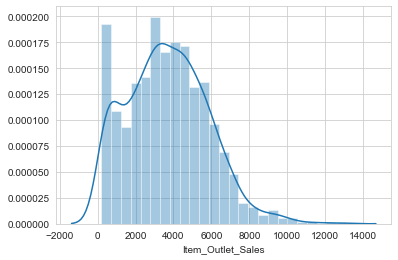

Cheap


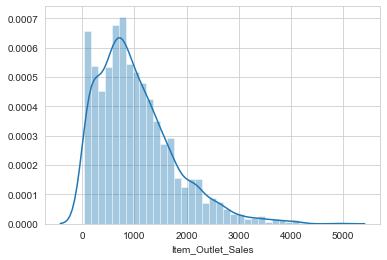

Medium


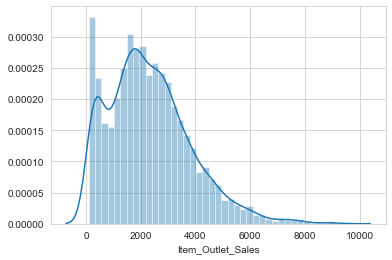

In [263]:
for item in list(dfFinal['Class_Item_MRP'].unique()):
    print(item)
    sns.distplot(dfFinal[dfFinal['Class_Item_MRP']==item]['Item_Outlet_Sales'])
    plt.show()

Dari data tersebut, dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal. Namun untuk lebih meyakinkan, saya melakukan uji QQPlot dan Uji Anderson.

QQPlot

Expensive


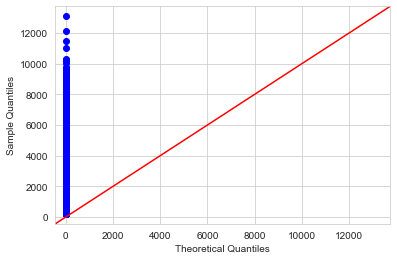

Cheap


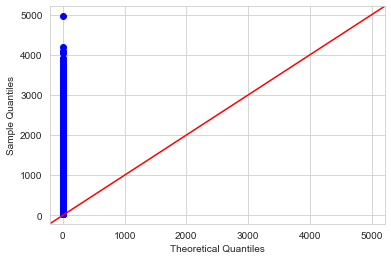

Medium


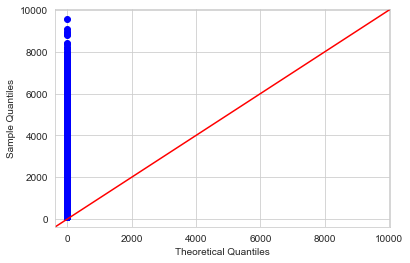

In [264]:
for item in list(dfFinal['Class_Item_MRP'].unique()):
    print(item)
    sn.qqplot(dfFinal[dfFinal['Class_Item_MRP']==item]['Item_Outlet_Sales'], line = '45')
    plt.show()

Dari grafik QQPlot, dapat dilihat bahwa data tersebut tidak terdistribusi dengan normal. Selanjutnya saya melakukan uji Anderson.

Uji Anderson

In [265]:
for item in list(dfFinal['Class_Item_MRP'].unique()):
    print(item)
    print(try_normal(dfFinal[dfFinal['Class_Item_MRP']==item]['Item_Outlet_Sales']))
    print('-----------------------------------------------------------')

Expensive
{'Anderson': {15.0: 0.574, 10.0: 0.654, 5.0: 0.785, 2.5: 0.915, 1.0: 1.089, 'Statistik': 4.318265930233565}}
-----------------------------------------------------------
Cheap
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.09, 'Statistik': 41.70839177255948}}
-----------------------------------------------------------
Medium
{'Anderson': {15.0: 0.576, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Statistik': 35.08446286232993}}
-----------------------------------------------------------


Dari data dapat dilihat bahwa nilai statistik lebih besar dibndingkan Critical Value, maka menerima H1 dan menolak H0, yang artinya **data tersebbut tidak terdistribusi dengan normal.**

Uji Hipotesis

- H0: Tidak ada pengaruh signifikan antara Class_Item_MRP dengan Item_Outlet_Sales
- H1: Ada pengaruh signifikan antara Class_Item_MRP dengan Item_Outlet_Sales

Signifikan level 5%

In [266]:
kruskal(data= dfFinal, dv='Item_Outlet_Sales', between='Class_Item_MRP')

Source  ddof1            H  p-unc
Kruskal  Class_Item_MRP      2  2260.528478    0.0

Dari data tersebut dapat dilihat P-Value lebih kecil dari Signifikan level, yang artinya menerima H1 dan menolak H0. Karena menerima H1, dilanjutkan dengan Post-hoc Test.

In [267]:
pairwise_ttests(data=dfFinal, dv='Item_Outlet_Sales', between='Class_Item_MRP', parametric=False)

Contrast          A       B  Paired  Parametric      U-val  \
0  Class_Item_MRP  Expensive   Cheap   False       False  3054181.5   
1  Class_Item_MRP  Expensive  Medium   False       False  4613332.0   
2  Class_Item_MRP      Cheap  Medium   False       False  2512372.5   

        Tail          p-unc    hedges  
0  two-sided   0.000000e+00  1.876676  
1  two-sided  3.894851e-110  0.809985  
2  two-sided   0.000000e+00 -1.013298

Dari data tersebut, dapat kita ambil kesimpulan bahwa nilai P-Value lebih kecil dibandingkan Signifikan level, maka menerima H1 dan menolak H0, artinya **ada pengaruh signifikan antara Class_Item_MRP dengan Item_Outlet_Sales.**

In [268]:
item7= dfFinal.groupby(['Outlet_Identifier']).mean()
item7.sort_values(by=['Item_Sales'],ascending=False)

Item_Weight  Item_Visibility    Item_MRP  \
Outlet_Identifier                                             
OUT027               12.586011         0.062159  139.801791   
OUT035               12.829349         0.064469  143.122481   
OUT017               12.826668         0.064694  139.421119   
OUT049               12.917446         0.064917  140.297699   
OUT046               12.866801         0.064655  142.057387   
OUT013               13.006148         0.063611  141.425982   
OUT045               12.649989         0.063943  140.950246   
OUT018               12.873346         0.065146  141.678634   
OUT019               12.624659         0.110878  139.787088   
OUT010               12.913153         0.103832  140.777594   

                   Outlet_Establishment_Year  Item_Outlet_Sales  Item_Sales  \
Outlet_Identifier                                                             
OUT027                                  1985        3694.038558   26.612834   
OUT035                                  2004        2438.841866   16.966667   
OUT017                                  2007        2340.675263   16.659827   
OUT049                                  1999        2348.354635   16.636559   
OUT046                                  1997        2277.844267   16.187097   
OUT013                                  1987        2298.995256   15.997854   
OUT045                                  2002        2192.384798   15.572659   
OUT018                                  2009        1995.498739   13.856681   
OUT019                                  1985         340.329723    2.446970   
OUT010                                  1998         339.351662    2.383784   

                   Item_MRP_AVG  Item_Sales_AVG  
Outlet_Identifier                                
OUT027               139.826576       16.417049  
OUT035               143.124451       15.516770  
OUT017               139.389349       15.552098  
OUT049               140.289162       15.654995  
OUT046               142.023466       15.608839  
OUT013               141.453679       15.524604  
OUT045               140.973750       15.502570  
OUT018               141.649181       15.381259  
OUT019               139.786722       13.812432  
OUT010               140.820434       14.002276

Saya akan menambahkan feature Outlet_Item_Sales_AVG

In [269]:
item9=dfFinal.pivot_table(values='Item_Sales', index='Outlet_Identifier',aggfunc='mean')
item9.sort_values(by='Item_Sales',ascending=False)

Item_Sales
Outlet_Identifier            
OUT027              26.612834
OUT035              16.966667
OUT017              16.659827
OUT049              16.636559
OUT046              16.187097
OUT013              15.997854
OUT045              15.572659
OUT018              13.856681
OUT019               2.446970
OUT010               2.383784

In [270]:
dfFinal['Outlet_Item_Sales_AVG'] = 1

In [271]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Id_Item_Second  Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0                 A             15               Class B            Medium   
1                 C             01               Class C            Medium   
2                 N             15               Class B             Heavy   
3                 D             19               Class A            Medium   
4                 P             36               Class C             Heavy   
...             ...            ...                   ...               ...   
8518              E             07               Class B            Medium   
8519              I             16               Class B             Heavy   
8520              I             47               Class B             Heavy   
8521              R             20               Class B             Heavy   
8522              G             45               Class B            Medium   

     Class_Item_Visibility Item_Sales Item_MRP_AVG Item_Sales_AVG  \
0                      Low       15.0   249.496700      20.875000   
1                      Low        9.0    48.969200      17.500000   
2                      Low       15.0   140.432286      10.571429   
3                      Low       18.0    55.044733      11.833333   
4                      Low       11.0    50.900800      24.000000   
...                    ...        ...          ...            ...   
8518                   Low        3.0   141.943971      11.571429   
8519          Intermediate        3.0    53.580667      19.166667   
8520    

In [272]:
coba3 = dfFinal['Outlet_Item_Sales_AVG']==1
coba3

0       True
1       True
2       True
3       True
4       True
        ... 
8518    True
8519    True
8520    True
8521    True
8522    True
Name: Outlet_Item_Sales_AVG, Length: 8523, dtype: bool

In [273]:
dfFinal.loc[coba3,'Outlet_Item_Sales_AVG'] = dfFinal.loc[coba,'Outlet_Identifier'].apply(lambda x: item9.at[x, 'Item_Sales'])

In [274]:
dfFinal

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              NCD19        8.930          Low Fat         0.008082   
4              FDP36       10.395          Regular         0.060928   
...              ...          ...              ...              ...   
8518           NCE07        8.180          Low Fat         0.021977   
8519           FDI16       14.000          Regular         0.227261   
8520           DRI47       14.700          Low Fat         0.035016   
8521           FDR20       20.000          Regular         0.023498   
8522           FDG45        8.100          Low Fat         0.214306   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3                 Household   53.8614            OUT013   
4              Baking Goods   51.4008            OUT018   
...                     ...       ...               ...   
8518              Household  140.6154            OUT010   
8519           Frozen Foods   54.3640            OUT010   
8520            Hard Drinks  144.3128            OUT010   
8521  Fruits and Vegetables   46.4744            OUT010   
8522  Fruits and Vegetables  213.9902            OUT010   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  ...  \
0                          1999      Medium               Tier 1  ...   
1                          2009      Medium               Tier 3  ...   
2                          1999      Medium               Tier 1  ...   
3                          1987        High               Tier 3  ...   
4                          2009      Medium               Tier 3  ...   
...                         ...         ...                  ...  ...   
8518                       1998      Medium               Tier 3  ...   
8519                       1998      Medium               Tier 3  ...   
8520                       1998      Medium               Tier 3  ...   
8521                       1998      Medium               Tier 3  ...   
8522                       1998      Medium               Tier 3  ...   

     Id_Item_Second  Id_Item_Third Class_Outlet_Per_Year Class_Item_Weight  \
0                 A             15               Class B            Medium   
1                 C             01               Class C            Medium   
2                 N             15               Class B             Heavy   
3                 D             19               Class A            Medium   
4                 P             36               Class C             Heavy   
...             ...            ...                   ...               ...   
8518              E             07               Class B            Medium   
8519              I             16               Class B             Heavy   
8520              I             47               Class B             Heavy   
8521              R             20               Class B             Heavy   
8522              G             45               Class B            Medium   

     Class_Item_Visibility Item_Sales Item_MRP_AVG Item_Sales_AVG  \
0                      Low       15.0   249.496700      20.875000   
1                      Low        9.0    48.969200      17.500000   
2                      Low       15.0   140.432286      10.571429   
3                      Low       18.0    55.044733      11.833333   
4                      Low       11.0    50.900800      24.000000   
...                    ...        ...          ...            ...   
8518                   Low        3.0   141.943971      11.571429   
8519          Intermediate        3.0    53.580667      19.166667   
8520    

In [275]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Id_Item_First              8523 non-null   objec

--------------------------------------------

Dari hasil Exploration Data Analyst (EDA) didapatkan bahwa :
    1. Item_Identifier
    2. Item_Fat_Content
    3. Item_Visibility (Class_Item_Visibility)
    4. Item_Type
    5. Outlet_Identifier
    6. Oulet_Establish_Year (Class_Outlet_Per_Year)
    7. Outlet_Size
    8. Outlet_Location_Type
    9. Outlet_Type
    10. Class_Item_MRP
Memiliki **pengaruh signifikan terhadap Item_Outlet_Sales.**

> **Karena data-data tersebut memiliki pengaruh signifikan terhadap Item_Outlet_Sales, maka saya juga menarik kesimpulan data-data tersebut memiliki pengaruh signifikan pula terhadap Item_Sales (dimana feature ini diolah dengan menggunakan Item_Outlet_Sales dan Item_MRP)**

-------------------

## Machine Learning and Evaluation

## 3.1 Gradient Boosting Regressor Modeling

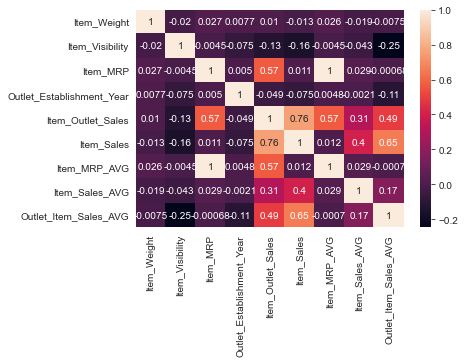

In [276]:
sns.heatmap(dfFinal.corr(),annot=True)

In [277]:
from sklearn.model_selection import train_test_split

In [278]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [279]:
x = dfFinal[['Item_Fat_Content','Id_Item_First','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [280]:
x = pd.get_dummies(x,drop_first=True)

In [281]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Id_Item_First_FD  Id_Item_First_NC  \
0                            0                 1                 0   
1                            1                 0                 0   
2                            0                 1                 0   
3                            0                 0                 1   
4                            1                 1                 0   
...                        ...               ...               ...   
8518                         0                 0                 1   
8519                         1                 1                 0   
8520                         0                 0                 0   
8521                         1                 1                 0   
8522                         0                 1                 0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            1                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
0                            0                         0   
1                            1                         0   
2                            0                         0   
3                            0                         0   
4                            1                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT046  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                

In [282]:
x = pd.get_dummies(x,drop_first=True)

In [283]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [284]:
gbr = GradientBoostingRegressor()

In [285]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [286]:
prediction = gbr.predict(X_test)
prediction 

array([  44.0881572 ,  142.67030818, 3596.5987565 , ..., 1686.96973309,
       2919.687384  , 3975.13716861])

In [287]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, gbr.predict(X_train))))

RMSE : 937


In [288]:
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

RMSE : 1013


In [289]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [290]:
df_prediction.sort_values(by='Persentase',ascending=False)

y_true       y_pred      Selisih  Persentase
702    288.9572  2922.956292  2633.999092  911.553369
3843   286.2940  2587.444773  2301.150773  803.771917
2432   230.3668  2027.467524  1797.100724  780.104044
479    527.3136  4222.044306  3694.730706  700.670475
3679   396.8168  3166.369330  2769.552530  697.942358
...         ...          ...          ...         ...
2276  1817.6340  1822.382602     4.748602    0.261252
59    3185.8530  3193.157797     7.304797    0.229289
7751  3175.8660  3176.966413     1.100413    0.034649
3473   629.1810   629.363904     0.182904    0.029070
5963  4363.6532  4363.775225     0.122025    0.002796

[1705 rows x 4 columns]

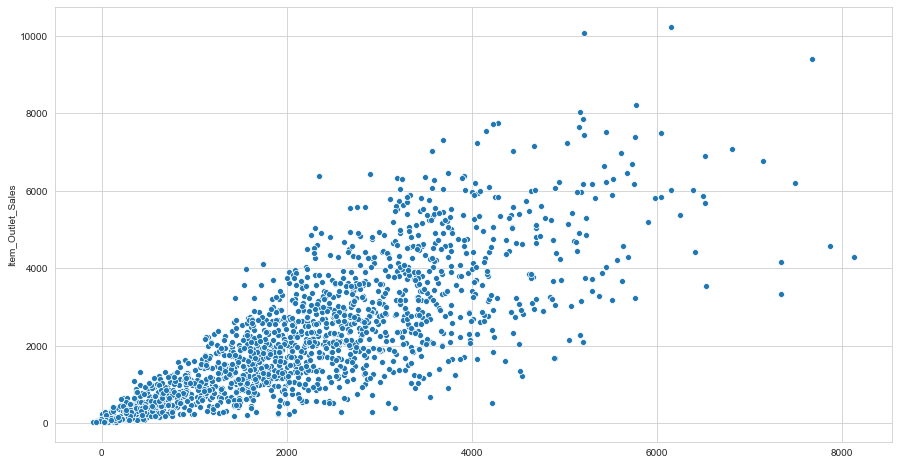

In [291]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=prediction,y=y_test)

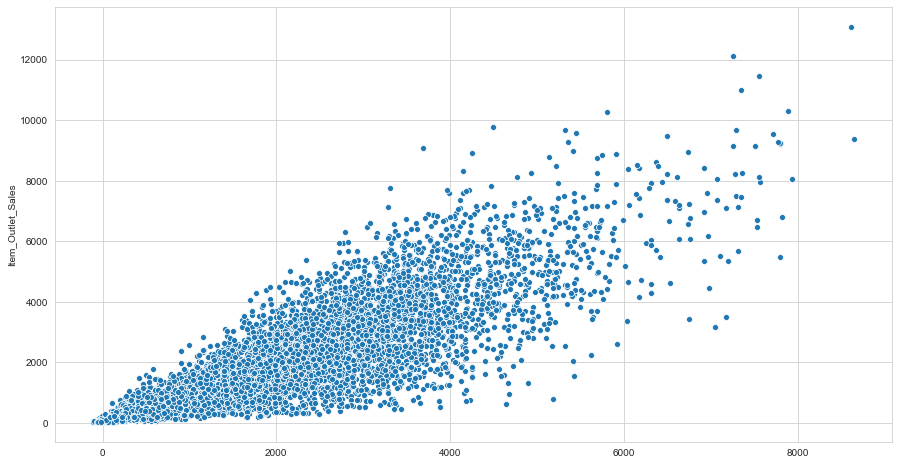

In [292]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=gbr.predict(X_train),y=y_train)

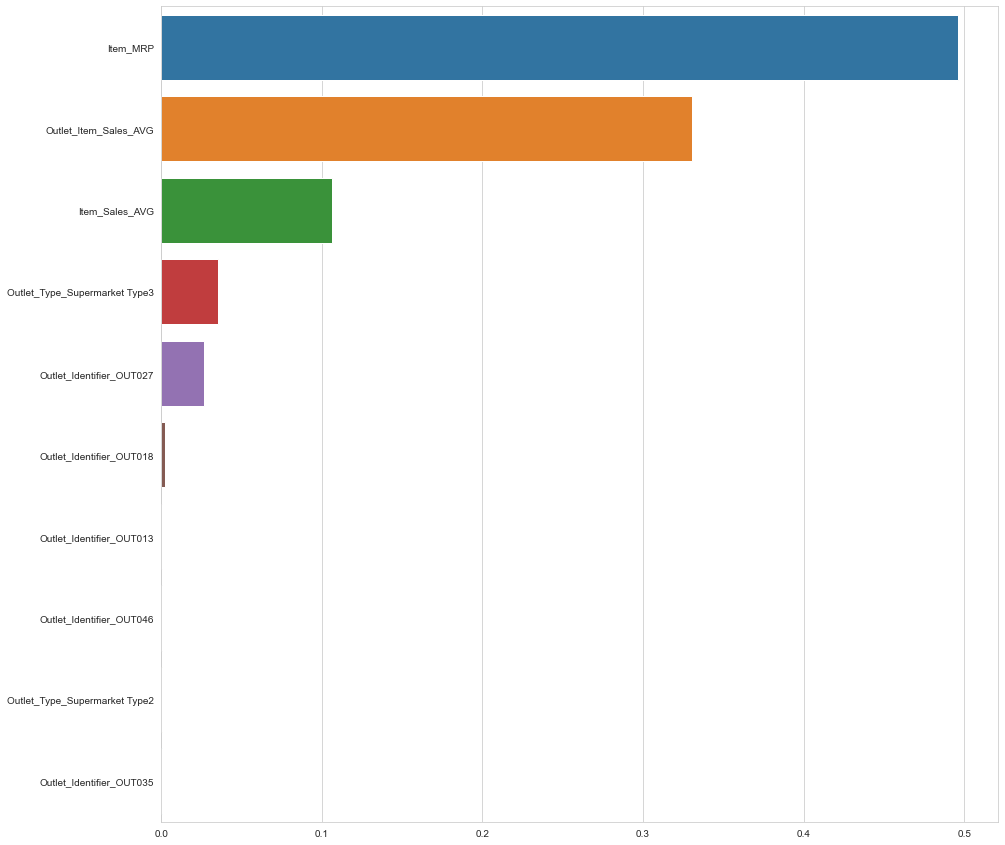

In [293]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(gbr.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

## 3.2 Random Forest Regressor Modeling

Dilihat dari modeling sebelumnya, saya akan melakukan modeling dengan membatasi nilai data Item_Outlet_Sales  yang akan masuk kedalam model.

In [294]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [295]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [296]:
x = pd.get_dummies(x,drop_first=True)

In [297]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [298]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [299]:
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [300]:
y_pred = regressor.predict(X_test)
y_pred

array([ 107.1555334 ,  110.84109657, 3937.78023856, ..., 1821.833144  ,
       3084.43202504, 3985.68196204])

In [301]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, regressor.predict(X_train))))

RMSE : 984.9


In [302]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, regressor.predict(X_test))))

RMSE : 1031


In [303]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : y_pred})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [304]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true       y_pred      Selisih  Persentase
6087  10072.8882  5035.673753  5037.214447   50.007648
4917  10236.6750  5631.343166  4605.331834   44.988552
1377   6381.6930  2210.504292  4171.188708   65.361789
1683   7534.1928  3480.467508  4053.725292   53.804374
4129   7322.4684  3428.034376  3894.434024   53.184716
...          ...          ...          ...         ...
3853   1436.7964  1435.575450     1.220950    0.084977
341    1990.7420  1990.051280     0.690720    0.034697
5369    105.8622   106.518418     0.656218    0.619879
7278   2884.2456  2884.558573     0.312973    0.010851
1240   2025.3636  2025.661798     0.298198    0.014723

[1705 rows x 4 columns]

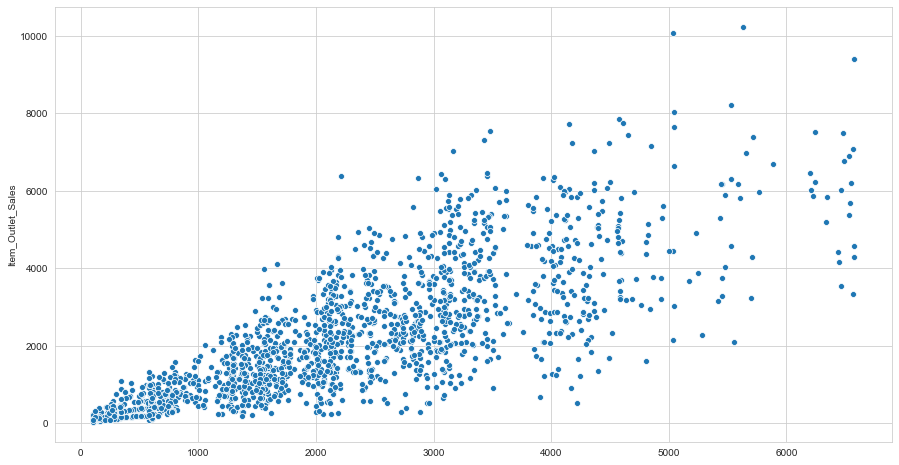

In [305]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_pred,y=Y_test)

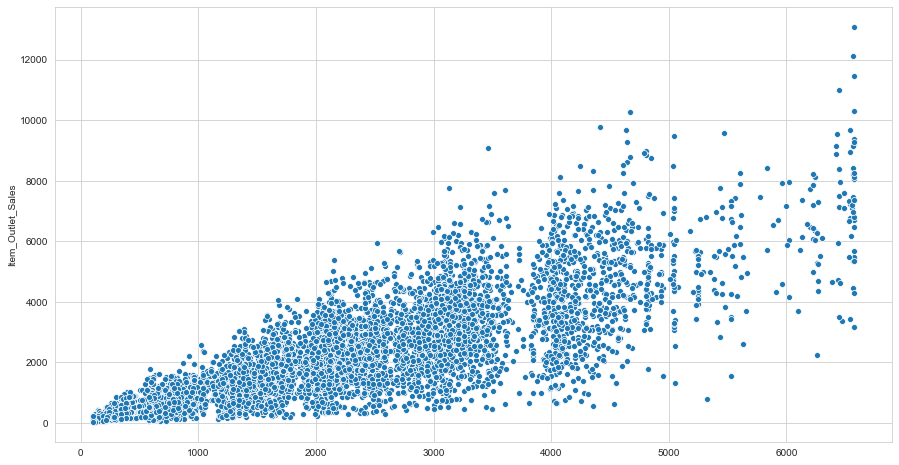

In [306]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=regressor.predict(X_train),y=Y_train)

------------------------------------------------------------------------------

## 3.3 Decission Tree Regressor

In [307]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [308]:
x = pd.get_dummies(x,drop_first=True)

In [309]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [311]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [312]:
y_pred = dtree.predict(X_test)
y_pred

array([ 194.4136,   97.2068, 3344.9792, ..., 1701.7848, 3877.6192,
       3542.7218])

In [313]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, dtree.predict(X_train))))

RMSE : 0


In [314]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, dtree.predict(X_test))))

RMSE : 1478


In [315]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : y_pred})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [316]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true      y_pred    Selisih   Persentase
6087  10072.8882   2543.3560  7529.5322    74.750479
4665   4301.0680  11445.1020  7144.0340   166.099071
4952   3285.7230   9562.2196  6276.4966   191.023303
4129   7322.4684   1314.2892  6008.1792    82.051282
479     527.3136   6199.9296  5672.6160  1075.757576
...          ...         ...        ...          ...
5050    179.7660    179.7660     0.0000     0.000000
6879   2302.3364   2302.3364     0.0000     0.000000
7394   1662.5026   1662.5026     0.0000     0.000000
2440   3705.1770   3705.1770     0.0000     0.000000
6239    231.6984    231.6984     0.0000     0.000000

[1705 rows x 4 columns]

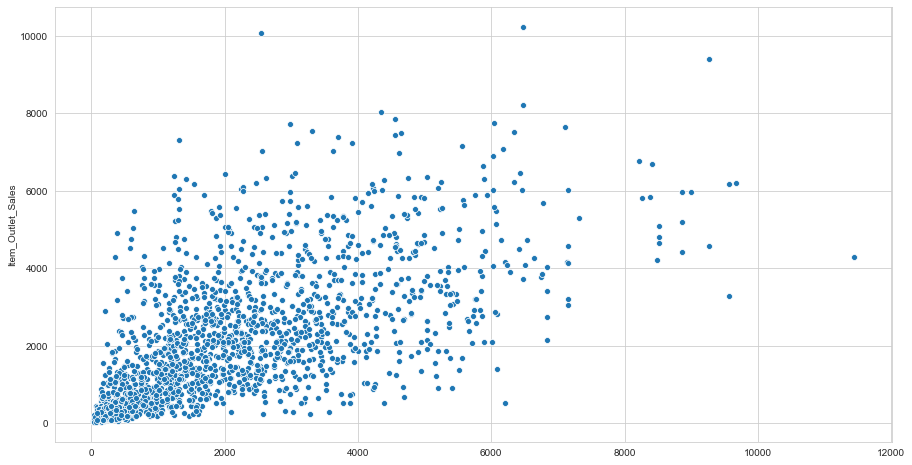

In [317]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y_pred,y=Y_test)

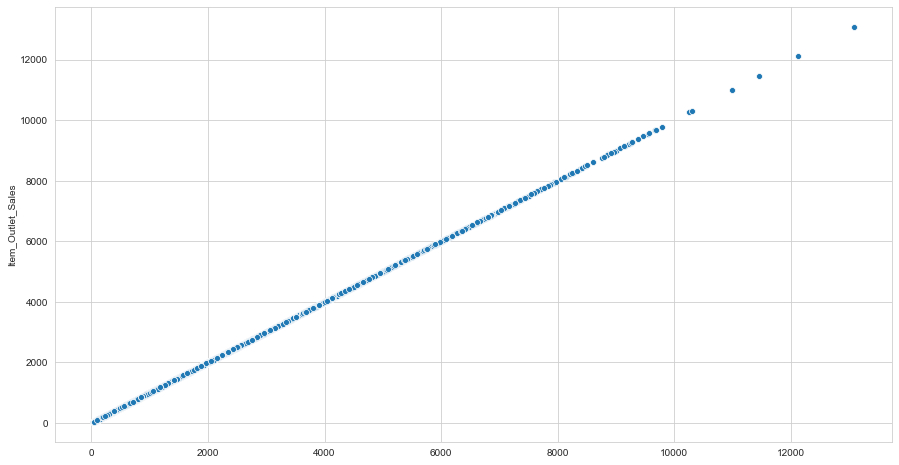

In [318]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=dtree.predict(X_train),y=Y_train)

## 3.4 Linear Regression

In [319]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [320]:
x = pd.get_dummies(x,drop_first=True)

In [321]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2)

In [323]:
Lr = LinearRegression()
Lr.fit(X_train, Y_train)

LinearRegression()

In [324]:
y2_pred = Lr.predict(X_test)
y2_pred

array([2521.26865019, 2195.67215918,  789.0279169 , ...,  389.35442218,
       2750.87122225,  872.92154637])

In [325]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, Lr.predict(X_train))))

RMSE : 1066


In [326]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, Lr.predict(X_test))))

RMSE : 1062


In [327]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : y2_pred})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [328]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true       y_pred      Selisih  Persentase
5639  10993.6896  5515.393766  5478.295834   49.831276
5614   8912.3988  3861.445292  5050.953508   56.673334
6087  10072.8882  5035.078317  5037.809883   50.013559
6333   9275.9256  4459.767456  4816.158144   51.921052
5123   8789.8916  4135.100487  4654.791113   52.956183
...          ...          ...          ...         ...
6571    181.0976   185.950849     4.853249    2.679908
8514    164.4526   166.926595     2.473995    1.504382
5186   2942.8360  2945.033108     2.197108    0.074660
1917    948.7650   947.506415     1.258585    0.132655
3483   1651.1840  1650.097023     1.086977    0.065830

[1705 rows x 4 columns]

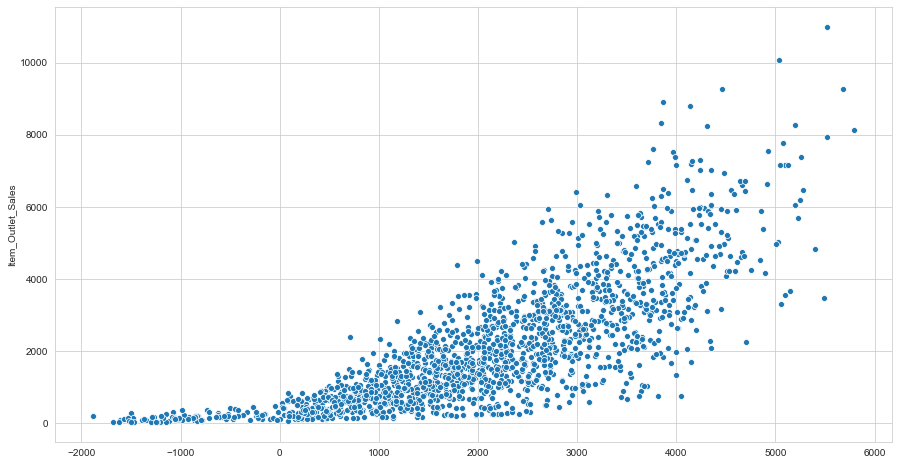

In [329]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y2_pred,y=Y_test)

----------------------------------------------------------------------------------------

## 3.5 Lasso Regression

In [330]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [331]:
x = pd.get_dummies(x,drop_first=True)

In [332]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [333]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [334]:
Ls = Lasso(alpha=0.05)
Ls.fit(X_train, Y_train)

Lasso(alpha=0.05)

In [335]:
y3_pred = Ls.predict(X_test)
y3_pred

array([-1581.09184641, -1143.40501459,  3352.05280141, ...,
        1804.49872078,  2913.16640242,  3503.32696724])

In [336]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, Ls.predict(X_train))))

RMSE : 1063


In [337]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, Ls.predict(X_test))))

RMSE : 1075


In [338]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : y3_pred})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [339]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true       y_pred      Selisih  Persentase
6087  10072.8882  5065.417153  5007.471047   49.712366
4917  10236.6750  5399.824757  4836.850243   47.250208
1377   6381.6930  2511.158185  3870.534815   60.650596
4129   7322.4684  3532.558198  3789.910202   51.757276
5334   9390.4432  5611.105274  3779.337926   40.246641
...          ...          ...          ...         ...
3092   1278.3360  1280.478489     2.142489    0.167600
6758   1847.5950  1845.776486     1.818514    0.098426
2439   2947.4966  2945.940645     1.555955    0.052789
4749   1992.7394  1993.959359     1.219959    0.061220
3899   1454.7730  1455.382631     0.609631    0.041906

[1705 rows x 4 columns]

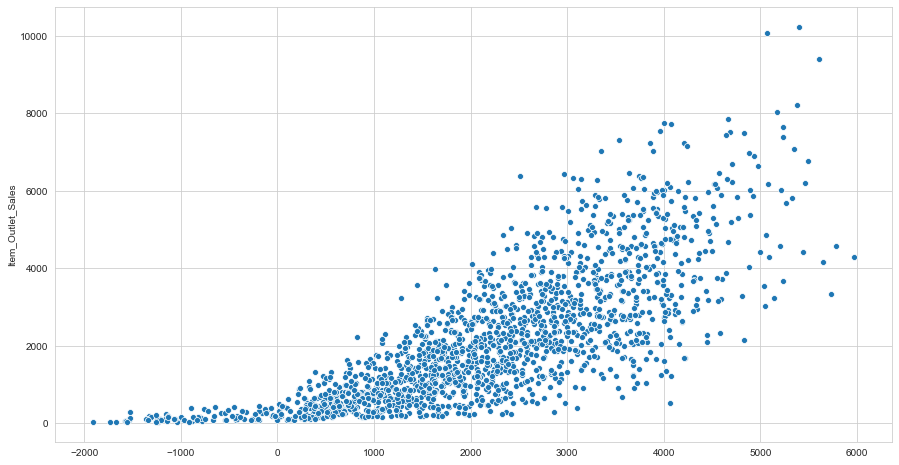

In [340]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y3_pred,y=Y_test)

------------------------------------------------

## 3.5 Ridge Regression

In [341]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [342]:
x = pd.get_dummies(x,drop_first=True)

In [343]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [344]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [345]:
rg = Ridge(alpha=1)
rg.fit(X_train, Y_train)

Ridge(alpha=1)

In [346]:
y3_pred = rg.predict(X_test)
y3_pred

array([-1581.18629236, -1143.89520368,  3352.00447688, ...,
        1803.59798911,  2913.32707847,  3502.97162687])

In [347]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, rg.predict(X_train))))

RMSE : 1063


In [348]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, rg.predict(X_test))))

RMSE : 1075


In [349]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : y3_pred})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [350]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true       y_pred      Selisih  Persentase
6087  10072.8882  5064.939582  5007.948618   49.717107
4917  10236.6750  5400.262936  4836.412064   47.245928
1377   6381.6930  2511.133873  3870.559127   60.650977
4129   7322.4684  3533.375167  3789.093233   51.746119
5334   9390.4432  5611.996310  3778.446890   40.237152
...          ...          ...          ...         ...
6758   1847.5950  1845.098203     2.496797    0.135138
4749   1992.7394  1991.088033     1.651367    0.082869
2439   2947.4966  2946.265236     1.231364    0.041777
3092   1278.3360  1277.133742     1.202258    0.094049
3899   1454.7730  1455.193126     0.420126    0.028879

[1705 rows x 4 columns]

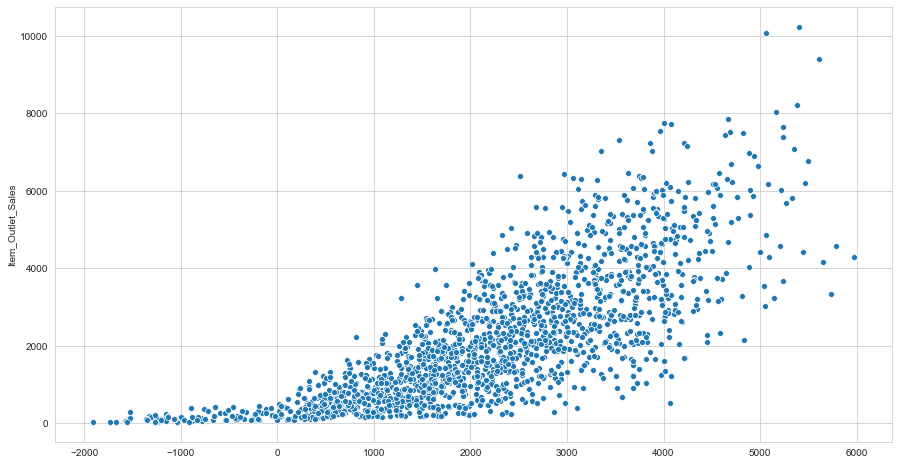

In [351]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=y3_pred,y=Y_test)

------------------------------------------

Dari pemodelan data, saya memutuskan untuk melakukan proses Hyper Parameter Tunning pada model Gradient Boosting Regresssor, Random Forest Regressor, dan Decision Tree Regressor.

## 3.1b Gradient Boosting Hyperparameter tunning

In [352]:
from sklearn.model_selection import GridSearchCV

In [353]:
parameter = {
    'n_estimators' : [50,100,110,120,150,175,200],
    'min_samples_split' : np.arange(2,10),
    'max_depth' : [3,4,5],
    'learning_rate' : [0.1,0.2]
}

In [354]:
model_grid = GridSearchCV(gbr,parameter, cv=5)

In [355]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [356]:
x = pd.get_dummies(x,drop_first=True)

In [357]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [358]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [359]:
model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 4, 5],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 100, 110, 120, 150, 175, 200]})

In [360]:
model_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 4,
 'n_estimators': 50}

In [361]:
modelfinal= GradientBoostingRegressor(n_estimators=50, min_samples_split=2, max_depth=3, learning_rate=0.1)

In [362]:
modelfinal.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=50)

In [363]:
predictionGBR = modelfinal.predict(X_test)
predictionGBR 

array([  79.47998215,  188.27066942, 3528.08132057, ..., 1711.07535194,
       2834.78903151, 3939.08848923])

In [364]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, modelfinal.predict(X_train))))

RMSE : 957.5


In [365]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, modelfinal.predict(X_test))))

RMSE : 1013


In [366]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [367]:
df_prediction.sort_values(by='Persentase',ascending=False)

y_true       y_pred      Selisih  Persentase
702    288.9572  2922.956292  2633.999092  911.553369
3843   286.2940  2587.444773  2301.150773  803.771917
2432   230.3668  2027.467524  1797.100724  780.104044
479    527.3136  4222.044306  3694.730706  700.670475
3679   396.8168  3166.369330  2769.552530  697.942358
...         ...          ...          ...         ...
2276  1817.6340  1822.382602     4.748602    0.261252
59    3185.8530  3193.157797     7.304797    0.229289
7751  3175.8660  3176.966413     1.100413    0.034649
3473   629.1810   629.363904     0.182904    0.029070
5963  4363.6532  4363.775225     0.122025    0.002796

[1705 rows x 4 columns]

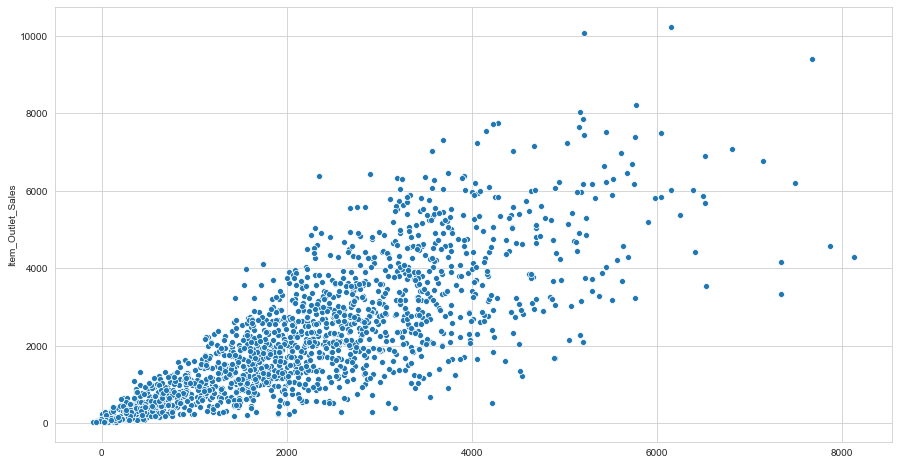

In [368]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=prediction,y=Y_test)

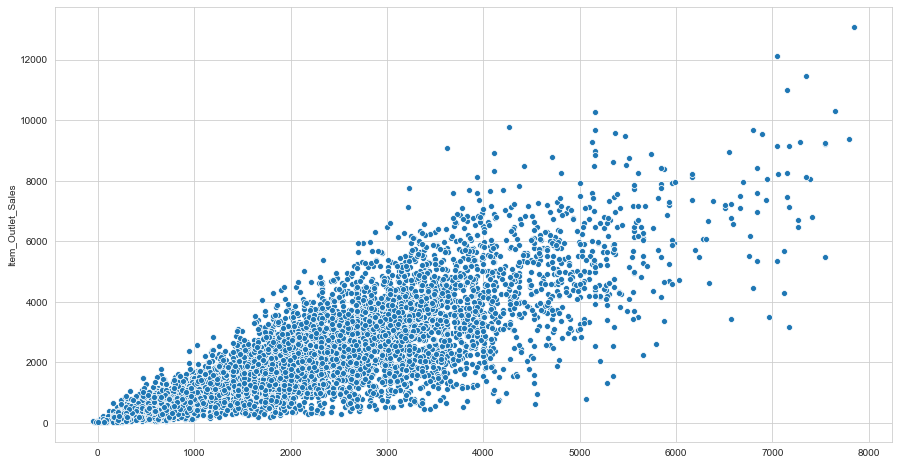

In [369]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=modelfinal.predict(X_train),y=Y_train)

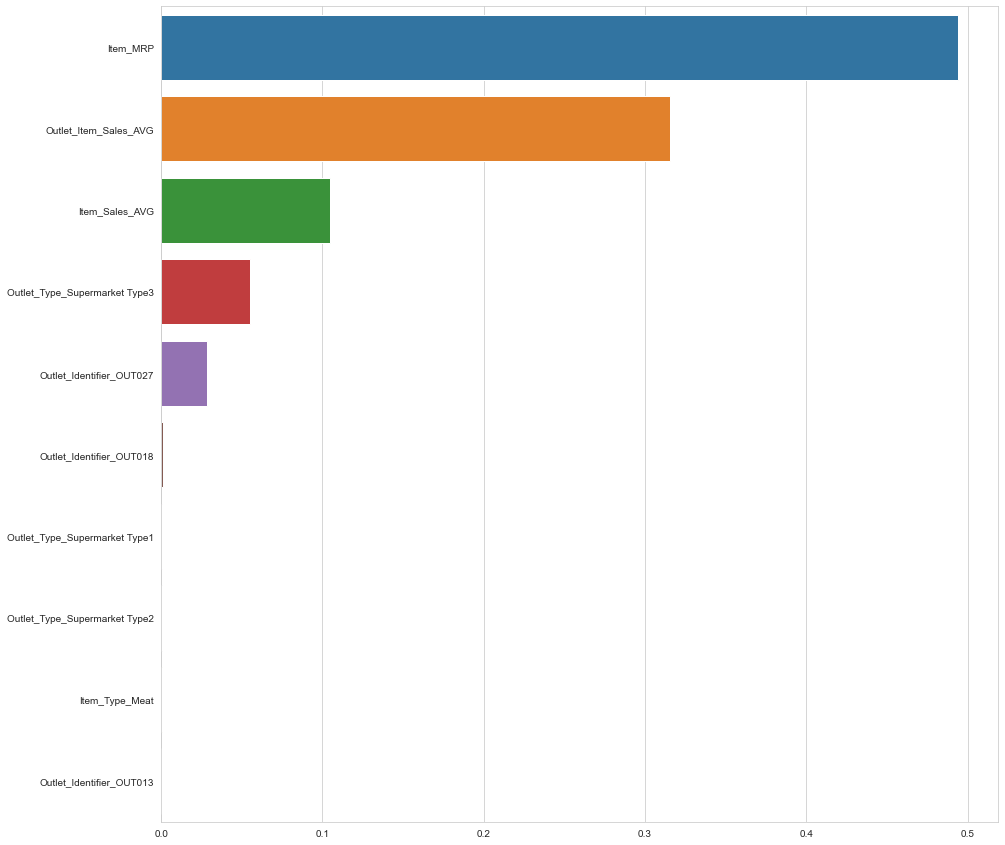

In [370]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(modelfinal.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

-----------------------------

## 3.2b Random Forest Regressor Hyper Parameter Tunning

In [371]:
parameter2 = {
    'n_estimators' : [50,100,110,120,150,175,200],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : np.arange(2,10)
}

In [372]:
model_grid2 = GridSearchCV(regressor,parameter2, cv=5)

In [373]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [374]:
x = pd.get_dummies(x,drop_first=True)

In [375]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [376]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [377]:
model_grid2.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=6, min_samples_leaf=50,
                                             n_jobs=4),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [50, 100, 110, 120, 150, 175, 200]})

In [378]:
model_grid2.best_params_

{'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 50}

In [379]:
modelfinal2= RandomForestRegressor(n_estimators=50, min_samples_split=5, max_depth=10, n_jobs=4)

In [380]:
modelfinal2.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                      n_jobs=4)

In [381]:
prediction = modelfinal2.predict(X_test)
prediction 

array([ 115.09270033,  139.65342255, 3654.70883212, ..., 1746.78442217,
       3067.30502251, 3850.14547556])

In [382]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, modelfinal2.predict(X_train))))

RMSE : 830


In [383]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, modelfinal2.predict(X_test))))

RMSE : 1032


In [384]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [385]:
df_prediction.sort_values(by='Persentase',ascending=False)

y_true       y_pred      Selisih  Persentase
702    288.9572  2951.111271  2662.154071  921.297019
3843   286.2940  2725.480243  2439.186243  851.986504
479    527.3136  4660.469349  4133.155749  783.813607
2432   230.3668  1932.762270  1702.395470  738.993410
2102   249.0092  1989.208190  1740.198990  698.849275
...         ...          ...          ...         ...
171    703.0848   699.815480     3.269320    0.464997
4118  5097.3648  5119.042196    21.677396    0.425267
7278  2884.2456  2872.130722    12.114878    0.420036
7168   756.3488   756.788435     0.439635    0.058126
330   2207.1270  2206.634285     0.492715    0.022324

[1705 rows x 4 columns]

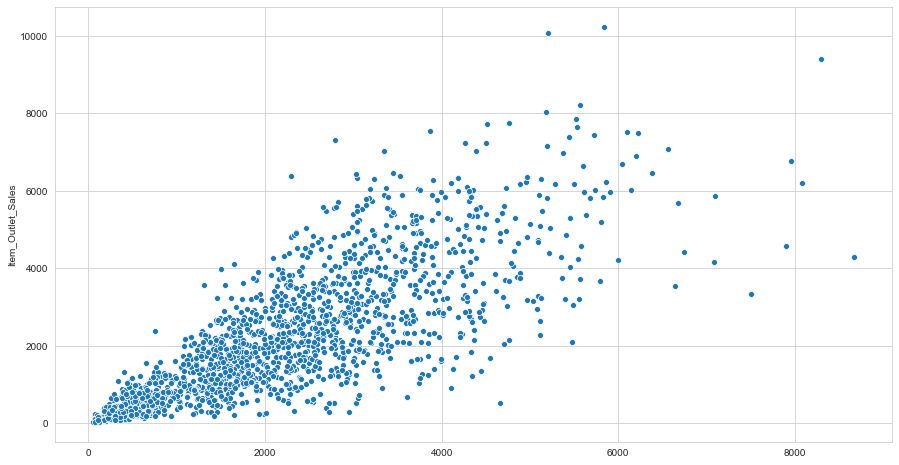

In [386]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=prediction,y=Y_test)

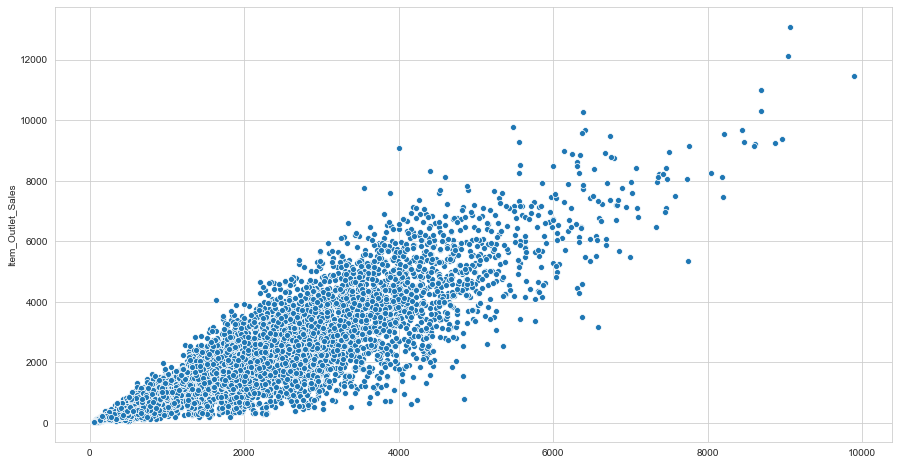

In [387]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=modelfinal2.predict(X_train),y=Y_train)

## 3.3b Decision Tree Regressor Hyper Parameter Tunning

In [388]:
parameter = {
    'min_samples_split' : np.arange(2,10)
}

In [389]:
model_grid3 = GridSearchCV(DecisionTreeRegressor(),parameter, cv=5)

In [390]:
x = dfFinal[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_MRP','Item_Sales_AVG','Outlet_Item_Sales_AVG']]
y = dfFinal['Item_Outlet_Sales']

In [391]:
x = pd.get_dummies(x,drop_first=True)

In [392]:
x

Item_MRP  Item_Sales_AVG  Outlet_Item_Sales_AVG  \
0     249.8092       20.875000              16.636559   
1      48.2692       17.500000              13.856681   
2     141.6180       10.571429              16.636559   
3      53.8614       11.833333              15.997854   
4      51.4008       24.000000              13.856681   
...        ...             ...                    ...   
8518  140.6154       11.571429               2.383784   
8519   54.3640       19.166667               2.383784   
8520  144.3128       15.833333               2.383784   
8521   46.4744       13.833333               2.383784   
8522  213.9902       20.000000               2.383784   

      Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  \
0                            0                 0                    0   
1                            1                 0                    0   
2                            0                 0                    0   
3                            0                 0                    0   
4                            1                 0                    0   
...                        ...               ...                  ...   
8518                         0                 0                    0   
8519                         1                 0                    0   
8520                         0                 0                    0   
8521                         1                 0                    0   
8522                         0                 0                    0   

      Item_Type_Canned  Item_Type_Dairy  Item_Type_Frozen Foods  \
0                    0                1                       0   
1                    0                0                       0   
2                    0                0                       0   
3                    0                0                       0   
4                    0                0                       0   
...                ...              ...                     ...   
8518                 0                0                       0   
8519                 0                0                       1   
8520                 0                0                       0   
8521                 0                0                       0   
8522                 0                0                       0   

      Item_Type_Fruits and Vegetables  ...  Outlet_Identifier_OUT027  \
0                                   0  ...                         0   
1                                   0  ...                         0   
2                                   0  ...                         0   
3                                   0  ...                         0   
4                                   0  ...                         0   
...                               ...  ...                       ...   
8518                                0  ...                         0   
8519                                0  ...                         0   
8520                                0  ...                         0   
8521                                1  ...                         0   
8522                                1  ...                         0   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT

In [393]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [394]:
model_grid3.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [395]:
model_grid3.best_params_

{'min_samples_split': 9}

In [396]:
modelfinal3= DecisionTreeRegressor(min_samples_split=9)

In [397]:
modelfinal3.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=9)

In [398]:
prediction = modelfinal3.predict(X_test)
prediction 

array([ 145.8102    ,  126.502     , 2588.51943333, ..., 2115.2466    ,
       3144.28805714, 3385.81493333])

In [399]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_train, modelfinal3.predict(X_train))))

RMSE : 579.7


In [400]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Y_test, modelfinal3.predict(X_test))))

RMSE : 1359


In [401]:
df_prediction = pd.DataFrame({'y_true' : Y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction['Persentase'] = (df_prediction['Selisih']/df_prediction['y_true'])*100

In [402]:
df_prediction.sort_values(by='Persentase',ascending=False)

y_true       y_pred      Selisih   Persentase
479    527.3136  5893.661600  5366.348000  1017.676768
702    288.9572  3205.410875  2916.453675  1009.302995
2432   230.3668  2462.211625  2231.844825   968.822254
3843   286.2940  3034.716400  2748.422400   960.000000
6517   323.5788  3100.963500  2777.384700   858.333333
...         ...          ...          ...          ...
160   3848.3240  3853.117760     4.793760     0.124567
7150  1797.6600  1799.181829     1.521829     0.084656
678   3014.7424  3015.503314     0.760914     0.025240
5469   815.6050   815.605000     0.000000     0.000000
8171   199.7400   199.740000     0.000000     0.000000

[1705 rows x 4 columns]

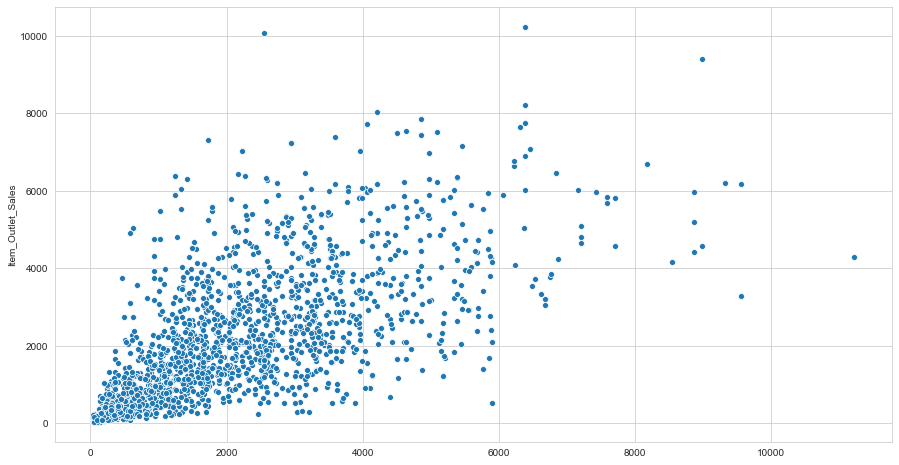

In [403]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=prediction,y=Y_test)

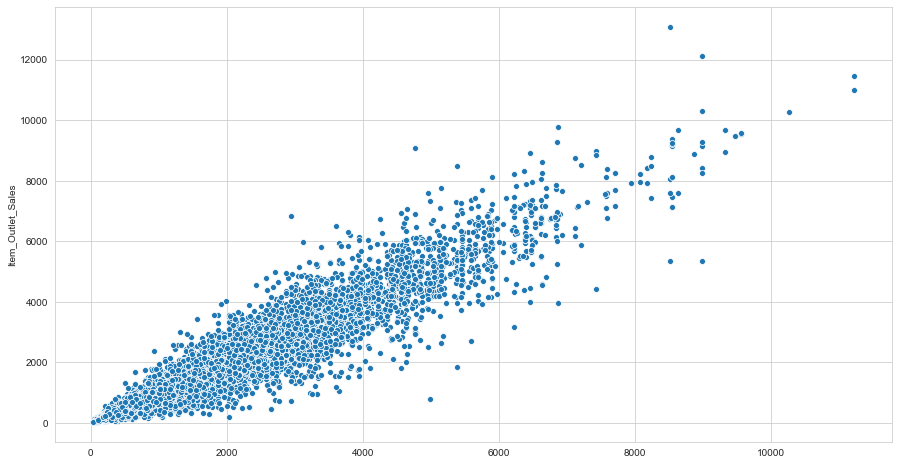

In [404]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=modelfinal3.predict(X_train),y=Y_train)

--------------------------------

> **Setelah melakukan proses evalusi model machine learning, berdasarkan nilai RMSE pada uji data train dan data test, serta persentase nilai error masing-masing model machine learning yang telah dilakukan, saya memutuskan Model Gradient Boosting Regressor yang sudah melalui proses Hyper Parameter Tunning yang akan dideploy dan digunakan untuk memprediksi data.**

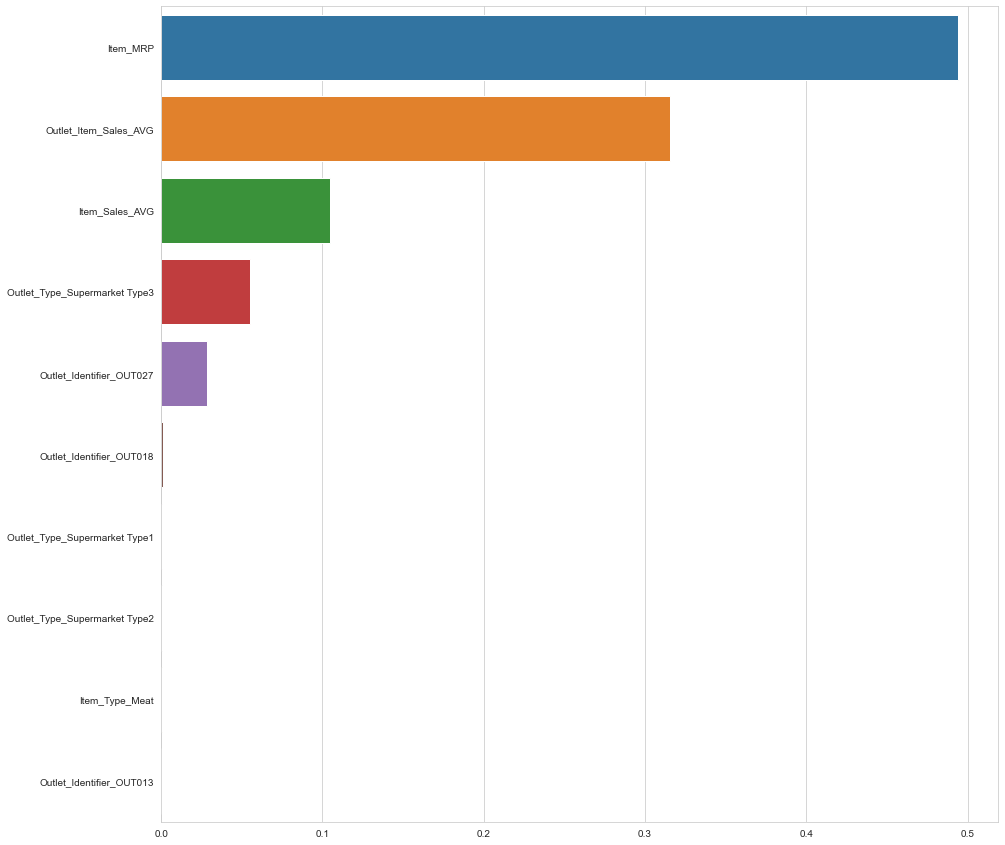

In [405]:
plt.figure(figsize=(15,15))
feature_importance = pd.Series(modelfinal.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)

Dapat dilihat, 3 feature terpenting untuk melakukan prediksi Item_Outlet_Sales adalah:
    1. Item_MRP
    2. Outlet_Item_Sales_AVG
    3. Item_Sales_AVG

---------------------

## Deploy Machine Learning

In [406]:
import pickle

In [407]:
filename = 'finalized_model_bigmart.sav'
pickle.dump(modelfinal, open(filename, 'wb'))

In [408]:
filename = 'x_dummies_colomn_bigmart.sav'
pickle.dump(x.columns, open(filename , 'wb'))

In [409]:
len(x.columns)

33

----------------------------

Mencoba machine learning yang sudah dideploy.

In [413]:
model_coba = pickle.load(open('finalized_model_bigmart.sav','rb'))
# real_columns = pickle.load(open('real_colomn.sav','rb'))
one_hot_columns = pickle.load(open('x_dummies_colomn_bigmart.sav','rb'))

def prediction_model(data):
    df_model = pd.DataFrame(data,index=[0])
    df_model = pd.get_dummies(df_model)
    df_model = df_model.reindex(columns=one_hot_columns, fill_value=0 )
    hasil = model_coba.predict(df_model)
    return round(hasil[0])

In [414]:
inputan = {'Item_Fat_Content': 'Regular', 'Item_Type': 'Meat', 'Outlet_Identifier': 'OUT010', 
           'Outlet_Location_Type': 'Tier 1', 'Outlet_Type': 'Supermarket 1', 'Item_MRP': 230,'Item_Sales_AVG':14.7,'Outlet_Item_Sales_AVG':10}

In [415]:
prediction_model(inputan)

3204.0

------------------------

Export Data to CSV

In [416]:
dfFinal.to_csv(r'data_bigmart_final.csv')

In [ ]:
-1,-1,2,10

--------------------